<a href="https://colab.research.google.com/github/Rjlee22/REU/blob/main/Crowdstrike_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd

, 'SBUX', 'DAL', 'AAL', 'UAL', 'HD', 'M', 'PARA', 'TD', 'AMZN', 'MSFT', 'JPM', 'BAC'

# Define the tickers for Amazon and Apple
ticker_1 = ['CRWD']
ticker_2 = ['SBUX']
ticker_3 = ['DAL']
ticker_4 = ['AAL']
ticker_5 = ['UAL']
ticker_6 = ['HD']
ticker_7 = ['M']
ticker_8 = ['PARA']
ticker_9 = ['TD']
ticker_10 = ['AMZN']
ticker_11 = ['MSFT']
ticker_12 = ['JPM']
ticker_13 = ['BAC']

# Download the stock data
stock_data_1 = yf.download(ticker_1, period='1mo')
stock_data_2 = yf.download(ticker_2, period='1mo')
stock_data_3 = yf.download(ticker_3, period='1mo')
stock_data_4 = yf.download(ticker_4, period='1mo')
stock_data_5 = yf.download(ticker_5, period='1mo')
stock_data_6 = yf.download(ticker_6, period='1mo')
stock_data_7 = yf.download(ticker_7, period='1mo')
stock_data_8 = yf.download(ticker_8, period='1mo')
stock_data_9 = yf.download(ticker_9, period='1mo')
stock_data_10 = yf.download(ticker_10, period='1mo')
stock_data_11 = yf.download(ticker_11, period='1mo')
stock_data_12 = yf.download(ticker_12, period='1mo')
stock_data_13 = yf.download(ticker_13, period='1mo')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
!pip install praw
!pip install yfinance
!pip install pandas

In [ ]:
import praw
from datetime import datetime
from transformers import pipeline, AutoTokenizer

#Reddit Credentials
client_id = 'moVvnPOfEdXY1IHubkiylA'
client_secret = 'qt1AdZidOl1NH7OmX3N2kr2U_w7vfA'
user_agent = 'AirportImportant3832'

#Set up Reddit Client
reddit = praw.Reddit(
    client_id = client_id,
    client_secret = client_secret,
    user_agent = user_agent
)

#Define the search queries and subreddits
queries = [
    ("crowdstrike", "starbucks"),
    ("starbucks", "stockmarket"),
    ("starbucks", "stocks"),
    ("starbucks", "wallstreetbets"),
]

# Define the date range for September 2023
start_date = datetime(2024, 7, 7)
end_date = datetime(2024, 7, 29, 23, 59, 59)

# List to store post details
posts_data_starbucks = []
posts_date_starbucks = []

# Fetch and store Reddit posts
for query, subreddit_name in queries:
    print(f"Searching for: {query} in {subreddit_name}\n")
    subreddit = reddit.subreddit(subreddit_name)
    posts = subreddit.search(query, time_filter='year', limit=100)  # Fetch a larger limit to ensure enough posts

    for post in posts:
        post_date = datetime.fromtimestamp(post.created_utc)
        if start_date <= post_date <= end_date:
            print(f"Title: {post.title}")
            print(f"Score: {post.score}")
            print(f"Link: {post.url}")
            print(f"Comments: {post.num_comments}")
            print(f"Posted by: {post.author}")
            print(f"Posted on: {post_date}")
            content = post.selftext if post.selftext else post.title
            print(f"Content: {content}\n")  # Print the content of the post
            posts_data_starbucks.append(content)
            posts_date_starbucks.append(post_date.date())

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
sentiment_analyzer = pipeline('sentiment-analysis', model=model_name, tokenizer=tokenizer)

def truncate_text(text, max_length=512):
    encoded_input = tokenizer.encode(text, truncation=True, max_length=max_length, return_tensors='pt')
    return tokenizer.decode(encoded_input[0], skip_special_tokens=True)

#get and display sentiment scores
def compute_sentiment_scores(texts):
    truncated_texts = [truncate_text(text) for text in texts]
    sentiment_scores = sentiment_analyzer(truncated_texts)
    # Extracting only the label and score
    processed_scores = [{'label': score['label'], 'score': score['score']} for score in sentiment_scores]
    return processed_scores

sentiment_scores_starbucks = compute_sentiment_scores(posts_data_starbucks)

print(sentiment_scores_starbucks)

In [ ]:
#['CRWD', 'SBUX', 'DAL', 'AAL', 'UAL', 'HD', 'M', 'PARA', 'TD', 'AMZN', 'MSFT', 'JPM', 'BAC']

#Define the search queries and subreddits
queries = [
    ("crowdstrike", "delta"),
    ("delta", "stockmarket"),
    ("delta", "stocks"),
    ("delta", "wallstreetbets"),
]

# Define the date range for September 2023
start_date = datetime(2024, 7, 19)
end_date = datetime(2024, 7, 29, 23, 59, 59)

# List to store post details
posts_data_delta = []
posts_date_delta = []

# Fetch and store Reddit posts
for query, subreddit_name in queries:
    print(f"Searching for: {query} in {subreddit_name}\n")
    subreddit = reddit.subreddit(subreddit_name)
    posts = subreddit.search(query, time_filter='year', limit=100)  # Fetch a larger limit to ensure enough posts

    for post in posts:
        post_date = datetime.fromtimestamp(post.created_utc)
        if start_date <= post_date <= end_date:
            print(f"Title: {post.title}")
            print(f"Score: {post.score}")
            print(f"Link: {post.url}")
            print(f"Comments: {post.num_comments}")
            print(f"Posted by: {post.author}")
            print(f"Posted on: {post_date}")
            content = post.selftext if post.selftext else post.title
            print(f"Content: {content}\n")  # Print the content of the post
            posts_data_delta.append(content)
            posts_date_delta.append(post_date.date())

sentiment_scores_delta = compute_sentiment_scores(posts_data_delta)

print(sentiment_scores_delta)

In [ ]:
#['CRWD', 'SBUX', 'DAL', 'AAL', 'UAL', 'HD', 'M', 'PARA', 'TD', 'AMZN', 'MSFT', 'JPM', 'BAC']

#Define the search queries and subreddits
queries = [
    ("crowdstrike", "americanairlines"),
    ("american airlines", "stockmarket"),
    ("american airlines", "stocks"),
    ("american airlines", "wallstreetbets"),
]

# Define the date range for September 2023
start_date = datetime(2024, 7, 19)
end_date = datetime(2024, 7, 29, 23, 59, 59)

# List to store post details
posts_data_aa = []
posts_date_aa = []

# Fetch and store Reddit posts
for query, subreddit_name in queries:
    print(f"Searching for: {query} in {subreddit_name}\n")
    subreddit = reddit.subreddit(subreddit_name)
    posts = subreddit.search(query, time_filter='year', limit=100)  # Fetch a larger limit to ensure enough posts

    for post in posts:
        post_date = datetime.fromtimestamp(post.created_utc)
        if start_date <= post_date <= end_date:
            print(f"Title: {post.title}")
            print(f"Score: {post.score}")
            print(f"Link: {post.url}")
            print(f"Comments: {post.num_comments}")
            print(f"Posted by: {post.author}")
            print(f"Posted on: {post_date}")
            content = post.selftext if post.selftext else post.title
            print(f"Content: {content}\n")  # Print the content of the post
            posts_data_aa.append(content)
            posts_date_aa.append(post_date.date())

sentiment_scores_aa = compute_sentiment_scores(posts_data_aa)

print(sentiment_scores_aa)

In [ ]:
#['CRWD', 'SBUX', 'DAL', 'AAL', 'UAL', 'HD', 'M', 'PARA', 'TD', 'AMZN', 'MSFT', 'JPM', 'BAC']

#Define the search queries and subreddits
queries = [
    ("crowdstrike", "unitedairlines"),
    ("united airlines", "stockmarket"),
    ("united airlines", "stocks"),
    ("united airlines", "wallstreetbets"),
]

# Define the date range for September 2023
start_date = datetime(2024, 7, 19)
end_date = datetime(2024, 7, 29, 23, 59, 59)

# List to store post details
posts_data_ua = []
posts_date_ua = []

# Fetch and store Reddit posts
for query, subreddit_name in queries:
    print(f"Searching for: {query} in {subreddit_name}\n")
    subreddit = reddit.subreddit(subreddit_name)
    posts = subreddit.search(query, time_filter='year', limit=100)  # Fetch a larger limit to ensure enough posts

    for post in posts:
        post_date = datetime.fromtimestamp(post.created_utc)
        if start_date <= post_date <= end_date:
            print(f"Title: {post.title}")
            print(f"Score: {post.score}")
            print(f"Link: {post.url}")
            print(f"Comments: {post.num_comments}")
            print(f"Posted by: {post.author}")
            print(f"Posted on: {post_date}")
            content = post.selftext if post.selftext else post.title
            print(f"Content: {content}\n")  # Print the content of the post
            posts_data_ua.append(content)
            posts_date_ua.append(post_date.date())

sentiment_scores_ua = compute_sentiment_scores(posts_data_ua)

print(sentiment_scores_ua)

In [ ]:
#['CRWD', 'SBUX', 'DAL', 'AAL', 'UAL', 'HD', 'M', 'PARA', 'TD', 'AMZN', 'MSFT', 'JPM', 'BAC']

#Define the search queries and subreddits
queries = [
    ("crowdstrike", "homedepot"),
    ("home depot", "stockmarket"),
    ("home depot", "stocks"),
    ("home depot", "wallstreetbets"),
]

# Define the date range for September 2023
start_date = datetime(2024, 7, 19)
end_date = datetime(2024, 7, 29, 23, 59, 59)

# List to store post details
posts_data_hd = []
posts_date_hd = []

# Fetch and store Reddit posts
for query, subreddit_name in queries:
    print(f"Searching for: {query} in {subreddit_name}\n")
    subreddit = reddit.subreddit(subreddit_name)
    posts = subreddit.search(query, time_filter='year', limit=100)  # Fetch a larger limit to ensure enough posts

    for post in posts:
        post_date = datetime.fromtimestamp(post.created_utc)
        if start_date <= post_date <= end_date:
            print(f"Title: {post.title}")
            print(f"Score: {post.score}")
            print(f"Link: {post.url}")
            print(f"Comments: {post.num_comments}")
            print(f"Posted by: {post.author}")
            print(f"Posted on: {post_date}")
            content = post.selftext if post.selftext else post.title
            print(f"Content: {content}\n")  # Print the content of the post
            posts_data_hd.append(content)
            posts_date_hd.append(post_date.date())

sentiment_scores_hd = compute_sentiment_scores(posts_data_hd)

print(sentiment_scores_hd)

In [ ]:
#['CRWD', 'SBUX', 'DAL', 'AAL', 'UAL', 'HD', 'M', 'PARA', 'TD', 'AMZN', 'MSFT', 'JPM', 'BAC']

#Define the search queries and subreddits
queries = [
    ("crowdstrike", "cbs"),
    ("paramount", "stockmarket"),
    ("paramount", "stocks"),
    ("paramount", "wallstreetbets"),
]

# Define the date range for September 2023
start_date = datetime(2024, 7, 19)
end_date = datetime(2024, 7, 29, 23, 59, 59)

# List to store post details
posts_data_para = []
posts_date_para = []

# Fetch and store Reddit posts
for query, subreddit_name in queries:
    print(f"Searching for: {query} in {subreddit_name}\n")
    subreddit = reddit.subreddit(subreddit_name)
    posts = subreddit.search(query, time_filter='year', limit=100)  # Fetch a larger limit to ensure enough posts

    for post in posts:
        post_date = datetime.fromtimestamp(post.created_utc)
        if start_date <= post_date <= end_date:
            print(f"Title: {post.title}")
            print(f"Score: {post.score}")
            print(f"Link: {post.url}")
            print(f"Comments: {post.num_comments}")
            print(f"Posted by: {post.author}")
            print(f"Posted on: {post_date}")
            content = post.selftext if post.selftext else post.title
            print(f"Content: {content}\n")  # Print the content of the post
            posts_data_para.append(content)
            posts_date_para.append(post_date.date())

sentiment_scores_para = compute_sentiment_scores(posts_data_para)

print(sentiment_scores_para)

In [ ]:
#['CRWD', 'SBUX', 'DAL', 'AAL', 'UAL', 'HD', 'M', 'PARA', 'TD', 'AMZN', 'MSFT', 'JPM', 'BAC']

#Define the search queries and subreddits
queries = [
    ("crowdstrike", "tdbank"),
    ("td", "stockmarket"),
    ("td", "stocks"),
    ("td", "wallstreetbets"),
]

# Define the date range for September 2023
start_date = datetime(2024, 7, 19)
end_date = datetime(2024, 7, 29, 23, 59, 59)

# List to store post details
posts_data_td = []
posts_date_td = []

# Fetch and store Reddit posts
for query, subreddit_name in queries:
    print(f"Searching for: {query} in {subreddit_name}\n")
    subreddit = reddit.subreddit(subreddit_name)
    posts = subreddit.search(query, time_filter='year', limit=100)  # Fetch a larger limit to ensure enough posts

    for post in posts:
        post_date = datetime.fromtimestamp(post.created_utc)
        if start_date <= post_date <= end_date:
            print(f"Title: {post.title}")
            print(f"Score: {post.score}")
            print(f"Link: {post.url}")
            print(f"Comments: {post.num_comments}")
            print(f"Posted by: {post.author}")
            print(f"Posted on: {post_date}")
            content = post.selftext if post.selftext else post.title
            print(f"Content: {content}\n")  # Print the content of the post
            posts_data_td.append(content)
            posts_date_td.append(post_date.date())

sentiment_scores_td = compute_sentiment_scores(posts_data_td)

print(sentiment_scores_td)

In [ ]:
#['CRWD', 'SBUX', 'DAL', 'AAL', 'UAL', 'HD', 'M', 'PARA', 'TD', 'AMZN', 'MSFT', 'JPM', 'BAC']

#Define the search queries and subreddits
queries = [
    ("crowdstrike", "amzn"),
    ("crowdstrike", "amazon"),
    ("amazon", "stockmarket"),
    ("amazon", "stocks"),
    ("amazon", "wallstreetbets"),
]

# Define the date range for September 2023
start_date = datetime(2024, 7, 19)
end_date = datetime(2024, 7, 29, 23, 59, 59)

# List to store post details
posts_data_amzn = []
posts_date_amzn = []

# Fetch and store Reddit posts
for query, subreddit_name in queries:
    print(f"Searching for: {query} in {subreddit_name}\n")
    subreddit = reddit.subreddit(subreddit_name)
    posts = subreddit.search(query, time_filter='year', limit=100)  # Fetch a larger limit to ensure enough posts

    for post in posts:
        post_date = datetime.fromtimestamp(post.created_utc)
        if start_date <= post_date <= end_date:
            print(f"Title: {post.title}")
            print(f"Score: {post.score}")
            print(f"Link: {post.url}")
            print(f"Comments: {post.num_comments}")
            print(f"Posted by: {post.author}")
            print(f"Posted on: {post_date}")
            content = post.selftext if post.selftext else post.title
            print(f"Content: {content}\n")  # Print the content of the post
            posts_data_amzn.append(content)
            posts_date_amzn.append(post_date.date())

sentiment_scores_amzn = compute_sentiment_scores(posts_data_amzn)

print(sentiment_scores_amzn)

In [ ]:
#['CRWD', 'SBUX', 'DAL', 'AAL', 'UAL', 'HD', 'M', 'PARA', 'TD', 'AMZN', 'MSFT', 'JPM', 'BAC']

#Define the search queries and subreddits
queries = [
    ("crowdstrike", "msft"),
    ("crowdstrike", "microsoft"),
    ("microsoft", "stockmarket"),
    ("microsoft", "stocks"),
    ("microsoft", "wallstreetbets"),
]

# Define the date range for September 2023
start_date = datetime(2024, 7, 19)
end_date = datetime(2024, 7, 29, 23, 59, 59)

# List to store post details
posts_data_msft = []
posts_date_msft = []

# Fetch and store Reddit posts
for query, subreddit_name in queries:
    print(f"Searching for: {query} in {subreddit_name}\n")
    subreddit = reddit.subreddit(subreddit_name)
    posts = subreddit.search(query, time_filter='year', limit=100)  # Fetch a larger limit to ensure enough posts

    for post in posts:
        post_date = datetime.fromtimestamp(post.created_utc)
        if start_date <= post_date <= end_date:
            print(f"Title: {post.title}")
            print(f"Score: {post.score}")
            print(f"Link: {post.url}")
            print(f"Comments: {post.num_comments}")
            print(f"Posted by: {post.author}")
            print(f"Posted on: {post_date}")
            content = post.selftext if post.selftext else post.title
            print(f"Content: {content}\n")  # Print the content of the post
            posts_data_msft.append(content)
            posts_date_msft.append(post_date.date())

sentiment_scores_msft = compute_sentiment_scores(posts_data_msft)

print(sentiment_scores_msft)

In [ ]:
#['CRWD', 'SBUX', 'DAL', 'AAL', 'UAL', 'HD', 'M', 'PARA', 'TD', 'AMZN', 'MSFT', 'JPM', 'BAC']

#Define the search queries and subreddits
queries = [
    ("crowdstrike", "chase"),
    ("crowdstrike", "JPMorganChase"),
    ("chase", "stockmarket"),
    ("chase", "stocks"),
    ("chase", "wallstreetbets"),
    ("jpm", "stockmarket"),
    ("jpm", "stocks"),
    ("jpm", "wallstreetbets"),
]

# Define the date range for September 2023
start_date = datetime(2024, 7, 19)
end_date = datetime(2024, 7, 29, 23, 59, 59)

# List to store post details
posts_data_jpm = []
posts_date_jpm = []

# Fetch and store Reddit posts
for query, subreddit_name in queries:
    print(f"Searching for: {query} in {subreddit_name}\n")
    subreddit = reddit.subreddit(subreddit_name)
    posts = subreddit.search(query, time_filter='year', limit=100)  # Fetch a larger limit to ensure enough posts

    for post in posts:
        post_date = datetime.fromtimestamp(post.created_utc)
        if start_date <= post_date <= end_date:
            print(f"Title: {post.title}")
            print(f"Score: {post.score}")
            print(f"Link: {post.url}")
            print(f"Comments: {post.num_comments}")
            print(f"Posted by: {post.author}")
            print(f"Posted on: {post_date}")
            content = post.selftext if post.selftext else post.title
            print(f"Content: {content}\n")  # Print the content of the post
            posts_data_jpm.append(content)
            posts_date_jpm.append(post_date.date())

sentiment_scores_jpm = compute_sentiment_scores(posts_data_jpm)

print(sentiment_scores_jpm)

In [ ]:
#['CRWD', 'SBUX', 'DAL', 'AAL', 'UAL', 'HD', 'M', 'PARA', 'TD', 'AMZN', 'MSFT', 'JPM', 'BAC']

#Define the search queries and subreddits
queries = [
    ("crowdstrike", "bankofamerica"),
    ("bank of america", "stockmarket"),
    ("bank of america", "stocks"),
    ("bank of america", "wallstreetbets"),
]

# Define the date range for September 2023
start_date = datetime(2024, 7, 19)
end_date = datetime(2024, 7, 29, 23, 59, 59)

# List to store post details
posts_data_baml = []
posts_date_baml = []

# Fetch and store Reddit posts
for query, subreddit_name in queries:
    print(f"Searching for: {query} in {subreddit_name}\n")
    subreddit = reddit.subreddit(subreddit_name)
    posts = subreddit.search(query, time_filter='year', limit=100)  # Fetch a larger limit to ensure enough posts

    for post in posts:
        post_date = datetime.fromtimestamp(post.created_utc)
        if start_date <= post_date <= end_date:
            print(f"Title: {post.title}")
            print(f"Score: {post.score}")
            print(f"Link: {post.url}")
            print(f"Comments: {post.num_comments}")
            print(f"Posted by: {post.author}")
            print(f"Posted on: {post_date}")
            content = post.selftext if post.selftext else post.title
            print(f"Content: {content}\n")  # Print the content of the post
            posts_data_baml.append(content)
            posts_date_baml.append(post_date.date())

sentiment_scores_baml = compute_sentiment_scores(posts_data_baml)

print(sentiment_scores_baml)

In [ ]:
#['CRWD', 'SBUX', 'DAL', 'AAL', 'UAL', 'HD', 'M', 'PARA', 'TD', 'AMZN', 'MSFT', 'JPM', 'BAC']

#Define the search queries and subreddits
queries = [
    ("crowdstrike", "crowdstrike"),
    ("crowdstrike", "stockmarket"),
    ("crowdstrike", "stocks"),
    ("crowdstrike", "wallstreetbets"),
]

# Define the date range for September 2023
start_date = datetime(2024, 7, 19)
end_date = datetime(2024, 7, 29, 23, 59, 59)

# List to store post details
posts_data_crwd = []
posts_date_crwd = []

# Fetch and store Reddit posts
for query, subreddit_name in queries:
    print(f"Searching for: {query} in {subreddit_name}\n")
    subreddit = reddit.subreddit(subreddit_name)
    posts = subreddit.search(query, time_filter='year', limit=100)  # Fetch a larger limit to ensure enough posts

    for post in posts:
        post_date = datetime.fromtimestamp(post.created_utc)
        if start_date <= post_date <= end_date:
            print(f"Title: {post.title}")
            print(f"Score: {post.score}")
            print(f"Link: {post.url}")
            print(f"Comments: {post.num_comments}")
            print(f"Posted by: {post.author}")
            print(f"Posted on: {post_date}")
            content = post.selftext if post.selftext else post.title
            print(f"Content: {content}\n")  # Print the content of the post
            posts_data_crwd.append(content)
            posts_date_crwd.append(post_date.date())

sentiment_scores_crwd = compute_sentiment_scores(posts_data_crwd)

print(sentiment_scores_crwd)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Searching for: crowdstrike in crowdstrike



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Title: BSOD error in latest crowdstrike update 
Score: 22840
Link: https://www.reddit.com/r/crowdstrike/comments/1e6vmkf/bsod_error_in_latest_crowdstrike_update/
Comments: 21449
Posted by: TipOFMYTONGUEDAMN
Posted on: 2024-07-19 04:57:52
Content: Hi all - 
Is anyone being effected currently by a BSOD outage?

EDIT: X
Check pinned posts for official response 

Title: CrowdStrike Host Self-Remediation for Remote Users
Score: 80
Link: https://youtu.be/Bn5eRUaMZXk?si=IvzZdLZzoEc_geOD
Comments: 52
Posted by: BradW-CS
Posted on: 2024-07-22 15:18:04
Content: CrowdStrike Host Self-Remediation for Remote Users

Title: CrowdStrike Host Remediation with Bootable USB Drive
Score: 21
Link: https://www.youtube.com/watch?v=TZlUrXXVxc8
Comments: 6
Posted by: BradW-CS
Posted on: 2024-07-25 05:29:44
Content: CrowdStrike Host Remediation with Bootable USB Drive

Title: Identify Possibly Impacted Hosts with CrowdStrike Dashboard
Score: 16
Link: https://www.youtube.com/watch?v=MGnQosmE3TE
Comments: 2
Poste

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Title: Goodbye Crowdstrike and rip the effected computers
Score: 180
Link: https://i.redd.it/pj2qphodhkdd1.jpeg
Comments: 125
Posted by: snarealltheway
Posted on: 2024-07-20 00:19:29
Content: Goodbye Crowdstrike and rip the effected computers

Title: Crowdstrike today!
Score: 262
Link: https://i.redd.it/iz3n2322pjdd1.gif
Comments: 20
Posted by: tito5000
Posted on: 2024-07-19 21:40:44
Content: Crowdstrike today!

Title: #Short Crowdstrike
Score: 20
Link: https://i.redd.it/zec0shl1ehed1.png
Comments: 6
Posted by: Geeno_1
Posted on: 2024-07-24 14:59:34
Content: I think the Crowd should strike🤔🤫

Title: How today's CrowdStrike outage happened, and possible stock market ramifications.
Score: 49
Link: https://www.reddit.com/r/StockMarket/comments/1e7ij9y/how_todays_crowdstrike_outage_happened_and/
Comments: 58
Posted by: CautiousInvestor
Posted on: 2024-07-20 00:10:35
Content: The cause was a specific software bug that is not uncommon. There's a great [in-depth technical overview](https://x.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Title: Thoughts on Crowdstrike bottoming out
Score: 68
Link: https://www.reddit.com/r/stocks/comments/1ecbao0/thoughts_on_crowdstrike_bottoming_out/
Comments: 176
Posted by: goldeneye700
Posted on: 2024-07-26 01:00:35
Content: I know Crowdstrike is like catching a falling knife right now. Since last week the stock has dropped 18% to $254. Not a major sale but at a certain point the stock becomes attractive again.

My main question is when is a good time to start building a small position? What are some red and yellow flags to look out for?

The obvious ones are potential lawsuits/liabilities from F500 companies. Which is very hard to price. So I do see the stock going below $200 over the next six months. Maybe creating an interesting opportunity to also write calls and buy LEAPs. Either way, I need help working through worst-case scenarios for the stock price.

Right now I think the EBITDA multiple is way too rich (165x). Since the stock recently achieved profitability,  I think any po

In [ ]:
# Calculate daily return on the merged DataFrame 'combined_data_sbux'

stock_data_1.rename(columns={'Open': 'Open_1'}, inplace=True)
stock_data_1.rename(columns={'High': 'High_1'}, inplace=True)
stock_data_1.rename(columns={'Low': 'Low_1'}, inplace=True)
stock_data_1.rename(columns={'Close': 'Close_1'}, inplace=True)
stock_data_1.rename(columns={'Adj Close': 'Adj_Close_1'}, inplace=True)
stock_data_1.rename(columns={'Volume': 'Volume_1'}, inplace=True)
stock_data_1['daily_return_1'] = (stock_data_1['Close_1'] - stock_data_1['Open_1']) / stock_data_1['Open_1']

stock_data_2.rename(columns={'Open': 'Open_2'}, inplace=True)
stock_data_2.rename(columns={'High': 'High_2'}, inplace=True)
stock_data_2.rename(columns={'Low': 'Low_2'}, inplace=True)
stock_data_2.rename(columns={'Close': 'Close_2'}, inplace=True)
stock_data_2.rename(columns={'Adj Close': 'Adj_Close_2'}, inplace=True)
stock_data_2.rename(columns={'Volume': 'Volume_2'}, inplace=True)
stock_data_2['daily_return_2'] = (stock_data_2['Close_2'] - stock_data_2['Open_2']) / stock_data_2['Open_2']

stock_data_3.rename(columns={'Open': 'Open_3'}, inplace=True)
stock_data_3.rename(columns={'High': 'High_3'}, inplace=True)
stock_data_3.rename(columns={'Low': 'Low_3'}, inplace=True)
stock_data_3.rename(columns={'Close': 'Close_3'}, inplace=True)
stock_data_3.rename(columns={'Adj Close': 'Adj_Close_3'}, inplace=True)
stock_data_3.rename(columns={'Volume': 'Volume_3'}, inplace=True)
stock_data_3['daily_return_3'] = (stock_data_3['Close_3'] - stock_data_3['Open_3']) / stock_data_3['Open_3']


stock_data_4.rename(columns={'Open': 'Open_4'}, inplace=True)
stock_data_4.rename(columns={'High': 'High_4'}, inplace=True)
stock_data_4.rename(columns={'Low': 'Low_4'}, inplace=True)
stock_data_4.rename(columns={'Close': 'Close_4'}, inplace=True)
stock_data_4.rename(columns={'Adj Close': 'Adj_Close_4'}, inplace=True)
stock_data_4.rename(columns={'Volume': 'Volume_4'}, inplace=True)
stock_data_4['daily_return_4'] = (stock_data_4['Close_4'] - stock_data_4['Open_4']) / stock_data_4['Open_4']


stock_data_5.rename(columns={'Open': 'Open_5'}, inplace=True)
stock_data_5.rename(columns={'High': 'High_5'}, inplace=True)
stock_data_5.rename(columns={'Low': 'Low_5'}, inplace=True)
stock_data_5.rename(columns={'Close': 'Close_5'}, inplace=True)
stock_data_5.rename(columns={'Adj Close': 'Adj_Close_5'}, inplace=True)
stock_data_5.rename(columns={'Volume': 'Volume_5'}, inplace=True)
stock_data_5['daily_return_5'] = (stock_data_5['Close_5'] - stock_data_5['Open_5']) / stock_data_5['Open_5']


stock_data_6.rename(columns={'Open': 'Open_6'}, inplace=True)
stock_data_6.rename(columns={'High': 'High_6'}, inplace=True)
stock_data_6.rename(columns={'Low': 'Low_6'}, inplace=True)
stock_data_6.rename(columns={'Close': 'Close_6'}, inplace=True)
stock_data_6.rename(columns={'Adj Close': 'Adj_Close_6'}, inplace=True)
stock_data_6.rename(columns={'Volume': 'Volume_6'}, inplace=True)
stock_data_6['daily_return_6'] = (stock_data_6['Close_6'] - stock_data_6['Open_6']) / stock_data_6['Open_6']


stock_data_7.rename(columns={'Open': 'Open_7'}, inplace=True)
stock_data_7.rename(columns={'High': 'High_7'}, inplace=True)
stock_data_7.rename(columns={'Low': 'Low_7'}, inplace=True)
stock_data_7.rename(columns={'Close': 'Close_7'}, inplace=True)
stock_data_7.rename(columns={'Adj Close': 'Adj_Close_7'}, inplace=True)
stock_data_7.rename(columns={'Volume': 'Volume_7'}, inplace=True)
stock_data_7['daily_return_7'] = (stock_data_7['Close_7'] - stock_data_7['Open_7']) / stock_data_7['Open_7']


stock_data_8.rename(columns={'Open': 'Open_8'}, inplace=True)
stock_data_8.rename(columns={'High': 'High_8'}, inplace=True)
stock_data_8.rename(columns={'Low': 'Low_8'}, inplace=True)
stock_data_8.rename(columns={'Close': 'Close_8'}, inplace=True)
stock_data_8.rename(columns={'Adj Close': 'Adj_Close_8'}, inplace=True)
stock_data_8.rename(columns={'Volume': 'Volume_8'}, inplace=True)
stock_data_8['daily_return_8'] = (stock_data_8['Close_8'] - stock_data_8['Open_8']) / stock_data_8['Open_8']


stock_data_9.rename(columns={'Open': 'Open_9'}, inplace=True)
stock_data_9.rename(columns={'High': 'High_9'}, inplace=True)
stock_data_9.rename(columns={'Low': 'Low_9'}, inplace=True)
stock_data_9.rename(columns={'Close': 'Close_9'}, inplace=True)
stock_data_9.rename(columns={'Adj Close': 'Adj_Close_9'}, inplace=True)
stock_data_9.rename(columns={'Volume': 'Volume_9'}, inplace=True)
stock_data_9['daily_return_9'] = (stock_data_9['Close_9'] - stock_data_9['Open_9']) / stock_data_9['Open_9']


stock_data_10.rename(columns={'Open': 'Open_10'}, inplace=True)
stock_data_10.rename(columns={'High': 'High_10'}, inplace=True)
stock_data_10.rename(columns={'Low': 'Low_10'}, inplace=True)
stock_data_10.rename(columns={'Close': 'Close_10'}, inplace=True)
stock_data_10.rename(columns={'Adj Close': 'Adj_Close_10'}, inplace=True)
stock_data_10.rename(columns={'Volume': 'Volume_10'}, inplace=True)
stock_data_10['daily_return_10'] = (stock_data_10['Close_10'] - stock_data_10['Open_10']) / stock_data_10['Open_10']


stock_data_11.rename(columns={'Open': 'Open_11'}, inplace=True)
stock_data_11.rename(columns={'High': 'High_11'}, inplace=True)
stock_data_11.rename(columns={'Low': 'Low_11'}, inplace=True)
stock_data_11.rename(columns={'Close': 'Close_11'}, inplace=True)
stock_data_11.rename(columns={'Adj Close': 'Adj_Close_11'}, inplace=True)
stock_data_11.rename(columns={'Volume': 'Volume_11'}, inplace=True)
stock_data_11['daily_return_11'] = (stock_data_11['Close_11'] - stock_data_11['Open_11']) / stock_data_11['Open_11']


stock_data_12.rename(columns={'Open': 'Open_12'}, inplace=True)
stock_data_12.rename(columns={'High': 'High_12'}, inplace=True)
stock_data_12.rename(columns={'Low': 'Low_12'}, inplace=True)
stock_data_12.rename(columns={'Close': 'Close_12'}, inplace=True)
stock_data_12.rename(columns={'Adj Close': 'Adj_Close_12'}, inplace=True)
stock_data_12.rename(columns={'Volume': 'Volume_12'}, inplace=True)
stock_data_12['daily_return_12'] = (stock_data_12['Close_12'] - stock_data_12['Open_12']) / stock_data_12['Open_12']

stock_data_13.rename(columns={'Open': 'Open_13'}, inplace=True)
stock_data_13.rename(columns={'High': 'High_13'}, inplace=True)
stock_data_13.rename(columns={'Low': 'Low_13'}, inplace=True)
stock_data_13.rename(columns={'Close': 'Close_13'}, inplace=True)
stock_data_13.rename(columns={'Adj Close': 'Adj_Close_13'}, inplace=True)
stock_data_13.rename(columns={'Volume': 'Volume_13'}, inplace=True)
stock_data_13['daily_return_13'] = (stock_data_13['Close_13'] - stock_data_13['Open_13']) / stock_data_13['Open_13']

print(stock_data_12)

               Open_12     High_12      Low_12    Close_12  Adj_Close_12  \
Date                                                                       
2024-07-08  205.039993  206.899994  203.970001  205.169998    205.169998   
2024-07-09  205.630005  209.759995  205.449997  207.630005    207.630005   
2024-07-10  206.139999  207.970001  205.580002  207.800003    207.800003   
2024-07-11  206.210007  208.100006  205.380005  207.449997    207.449997   
2024-07-12  204.000000  207.449997  202.100006  204.940002    204.940002   
2024-07-15  207.190002  211.610001  206.720001  210.050003    210.050003   
2024-07-16  210.000000  213.740005  208.080002  213.619995    213.619995   
2024-07-17  213.800003  217.559998  213.270004  216.869995    216.869995   
2024-07-18  215.630005  216.639999  209.240005  209.979996    209.979996   
2024-07-19  211.199997  212.350006  208.919998  209.779999    209.779999   
2024-07-22  210.460007  212.169998  209.710007  210.279999    210.279999   
2024-07-23  

In [ ]:
#THIS CODE WILL HAVE DATES + THE ADDED SENTIMENT VALUES

import pandas as pd

# Sample data
#data = {'sentiment': sentiment_scores, 'Date': posts_date}

# Create DataFrame
df_sbux = pd.DataFrame(sentiment_scores_starbucks)
df_sbux.insert(0, 'Date', posts_date_starbucks)

df_sbux['score'] = df_sbux.apply(lambda row: row['score'] * -1 if row['label'] == 'NEGATIVE' else row['score'], axis=1)

df_sbux['Date'] = pd.to_datetime(df_sbux['Date'])  # Convert 'Date' column to datetime

# Display DataFrame
print(df_sbux)

# Assuming stock_data_1 to stock_data_13 are your stock data DataFrames
# Combine all stock data into a single DataFrame
#stock_data_all = pd.concat([stock_data_1, stock_data_2, stock_data_3, stock_data_4,
                           #stock_data_5, stock_data_6, stock_data_8, stock_data_9,
                           #stock_data_10, stock_data_11, stock_data_12, stock_data_13])

# Merge the sentiment data with the combined stock data
combined_data_sbux = pd.merge(df_sbux, stock_data_1, on=['Date'], how='inner')
combined_data_sbux = pd.merge(combined_data_sbux, stock_data_2, on=['Date'], how='inner')
combined_data_sbux = pd.merge(combined_data_sbux, stock_data_3, on=['Date'], how='inner')
combined_data_sbux = pd.merge(combined_data_sbux, stock_data_4, on=['Date'], how='inner')
combined_data_sbux = pd.merge(combined_data_sbux, stock_data_5, on=['Date'], how='inner')
combined_data_sbux = pd.merge(combined_data_sbux, stock_data_6, on=['Date'], how='inner')
combined_data_sbux = pd.merge(combined_data_sbux, stock_data_8, on=['Date'], how='inner')
combined_data_sbux = pd.merge(combined_data_sbux, stock_data_9, on=['Date'], how='inner')
combined_data_sbux = pd.merge(combined_data_sbux, stock_data_10, on=['Date'], how='inner')
combined_data_sbux = pd.merge(combined_data_sbux, stock_data_11, on=['Date'], how='inner')
combined_data_sbux = pd.merge(combined_data_sbux, stock_data_12, on=['Date'], how='inner')
combined_data_sbux = pd.merge(combined_data_sbux, stock_data_13, on=['Date'], how='inner')



print(combined_data_sbux)

         Date     label     score
0  2024-07-26  NEGATIVE -0.991560
1  2024-07-26  NEGATIVE -0.986912
2  2024-07-19  NEGATIVE -0.998641
3  2024-07-19  NEGATIVE -0.998789
4  2024-07-19  NEGATIVE -0.933488
5  2024-07-19  NEGATIVE -0.995439
6  2024-07-19  NEGATIVE -0.549903
7  2024-07-23  NEGATIVE -0.999442
8  2024-07-19  POSITIVE  0.999883
9  2024-07-19  NEGATIVE -0.998984
10 2024-07-19  NEGATIVE -0.996304
11 2024-07-25  NEGATIVE -0.950240
12 2024-07-29  NEGATIVE -0.999201
13 2024-07-21  NEGATIVE -0.958968
14 2024-07-26  NEGATIVE -0.989526
15 2024-07-19  NEGATIVE -0.999287
16 2024-07-19  POSITIVE  0.999484
         Date     label     score      Open_1      High_1       Low_1  \
0  2024-07-26  NEGATIVE -0.991560  259.950012  260.540009  251.259995   
1  2024-07-26  NEGATIVE -0.986912  259.950012  260.540009  251.259995   
2  2024-07-26  NEGATIVE -0.989526  259.950012  260.540009  251.259995   
3  2024-07-19  NEGATIVE -0.998641  294.510010  316.750000  290.100006   
4  2024-07-19  NEGATIVE

                  Open_1    High_1     Low_1   Close_1  daily_return_1  \
Open_1          1.000000  0.998441  0.995418  0.999478        0.992400   
High_1          0.998441  1.000000  0.997283  0.999212        0.995758   
Low_1           0.995418  0.997283  1.000000  0.997791        0.998342   
Close_1         0.999478  0.999212  0.997791  1.000000        0.995833   
daily_return_1  0.992400  0.995758  0.998342  0.995833        1.000000   
score           0.320221  0.320163  0.320797  0.320178        0.317543   

                   score  
Open_1          0.320221  
High_1          0.320163  
Low_1           0.320797  
Close_1         0.320178  
daily_return_1  0.317543  
score           1.000000  


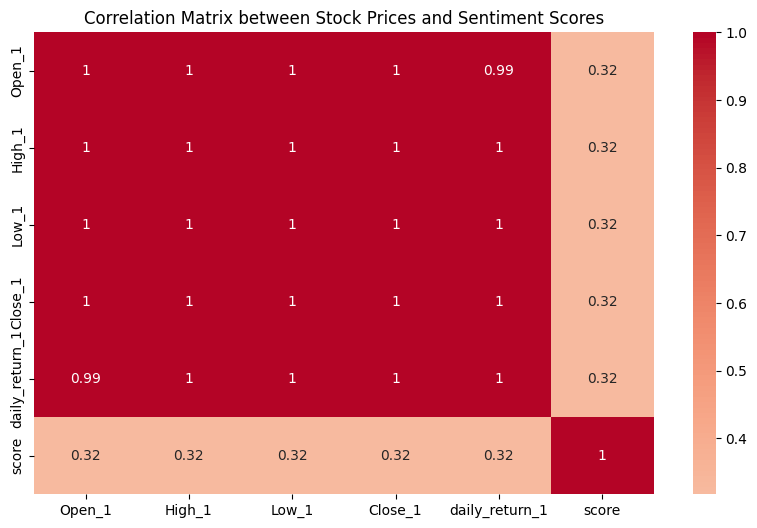

                  Open_2    High_2     Low_2   Close_2  daily_return_2  \
Open_2          1.000000  0.226458  0.841609  0.157581       -0.143792   
High_2          0.226458  1.000000  0.344055  0.985063        0.918780   
Low_2           0.841609  0.344055  1.000000  0.353616        0.100690   
Close_2         0.157581  0.985063  0.353616  1.000000        0.954585   
daily_return_2 -0.143792  0.918780  0.100690  0.954585        1.000000   
score          -0.006367  0.313898  0.038368  0.311261        0.313821   

                   score  
Open_2         -0.006367  
High_2          0.313898  
Low_2           0.038368  
Close_2         0.311261  
daily_return_2  0.313821  
score           1.000000  


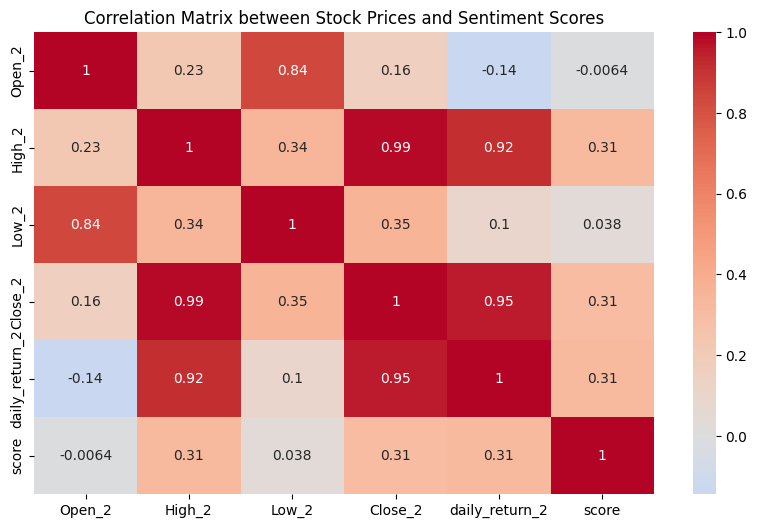

                  Open_3    High_3     Low_3   Close_3  daily_return_3  \
Open_3          1.000000  0.882926  0.977883  0.861343        0.358024   
High_3          0.882926  1.000000  0.941335  0.974491        0.709854   
Low_3           0.977883  0.941335  1.000000  0.944914        0.538543   
Close_3         0.861343  0.974491  0.944914  1.000000        0.782727   
daily_return_3  0.358024  0.709854  0.538543  0.782727        1.000000   
score           0.268942  0.322259  0.292046  0.311127        0.242523   

                   score  
Open_3          0.268942  
High_3          0.322259  
Low_3           0.292046  
Close_3         0.311127  
daily_return_3  0.242523  
score           1.000000  


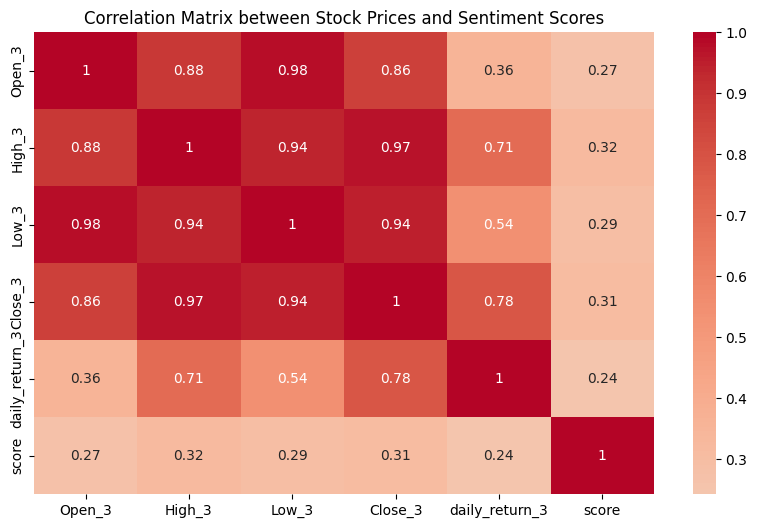

                  Open_4    High_4     Low_4   Close_4  daily_return_4  \
Open_4          1.000000 -0.672716  0.780087  0.005726       -0.966483   
High_4         -0.672716  1.000000 -0.918654  0.070750        0.674887   
Low_4           0.780087 -0.918654  1.000000 -0.329184       -0.842986   
Close_4         0.005726  0.070750 -0.329184  1.000000        0.251073   
daily_return_4 -0.966483  0.674887 -0.842986  0.251073        1.000000   
score           0.070479 -0.269998  0.190842  0.067061       -0.053312   

                   score  
Open_4          0.070479  
High_4         -0.269998  
Low_4           0.190842  
Close_4         0.067061  
daily_return_4 -0.053312  
score           1.000000  


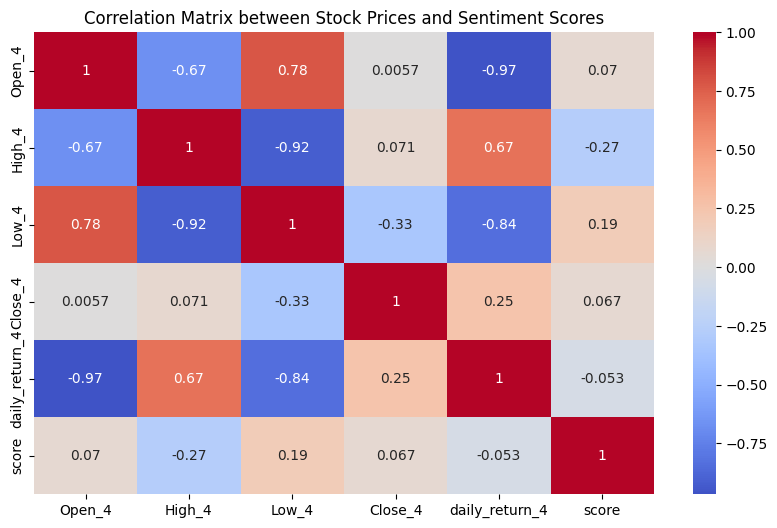

                  Open_5    High_5     Low_5   Close_5  daily_return_5  \
Open_5          1.000000 -0.431042  0.955724 -0.346082       -0.916845   
High_5         -0.431042  1.000000 -0.278288  0.880614        0.705670   
Low_5           0.955724 -0.278288  1.000000 -0.319706       -0.872396   
Close_5        -0.346082  0.880614 -0.319706  1.000000        0.691858   
daily_return_5 -0.916845  0.705670 -0.872396  0.691858        1.000000   
score          -0.288258  0.209412 -0.290680  0.222974        0.316996   

                   score  
Open_5         -0.288258  
High_5          0.209412  
Low_5          -0.290680  
Close_5         0.222974  
daily_return_5  0.316996  
score           1.000000  


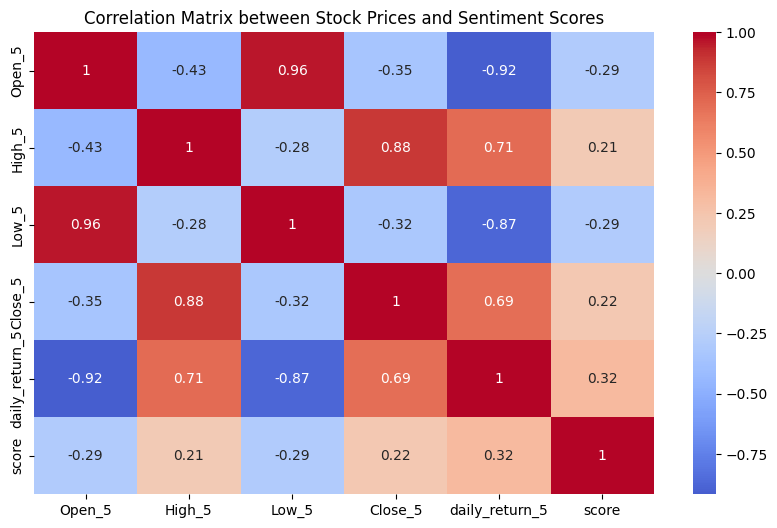

                  Open_6    High_6     Low_6   Close_6  daily_return_6  \
Open_6          1.000000  0.988464  0.974095  0.883435       -0.929484   
High_6          0.988464  1.000000  0.974568  0.911047       -0.888767   
Low_6           0.974095  0.974568  1.000000  0.962972       -0.824961   
Close_6         0.883435  0.911047  0.962972  1.000000       -0.648314   
daily_return_6 -0.929484 -0.888767 -0.824961 -0.648314        1.000000   
score           0.270518  0.290875  0.264551  0.252725       -0.240500   

                   score  
Open_6          0.270518  
High_6          0.290875  
Low_6           0.264551  
Close_6         0.252725  
daily_return_6 -0.240500  
score           1.000000  


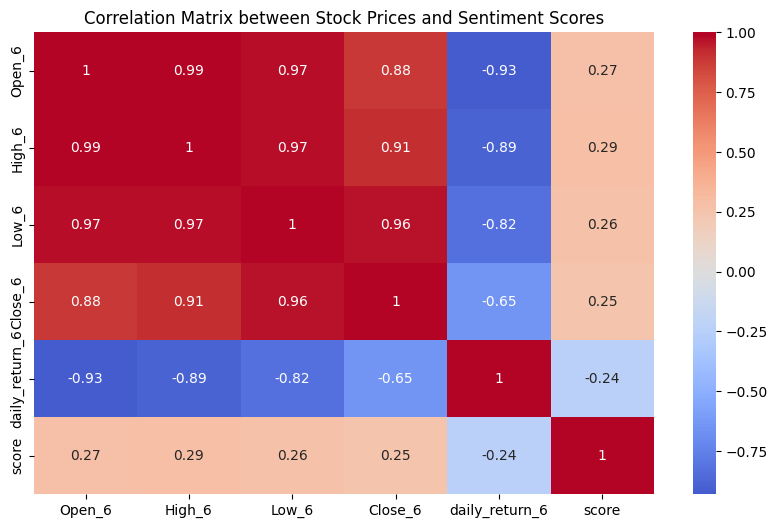

                  Open_8    High_8     Low_8   Close_8  daily_return_8  \
Open_8          1.000000  0.660527  0.660186  0.486332       -0.180338   
High_8          0.660527  1.000000  0.425951  0.479089        0.062273   
Low_8           0.660186  0.425951  1.000000  0.934109        0.569708   
Close_8         0.486332  0.479089  0.934109  1.000000        0.771731   
daily_return_8 -0.180338  0.062273  0.569708  0.771731        1.000000   
score           0.208277 -0.002712  0.245667  0.195761        0.067758   

                   score  
Open_8          0.208277  
High_8         -0.002712  
Low_8           0.245667  
Close_8         0.195761  
daily_return_8  0.067758  
score           1.000000  


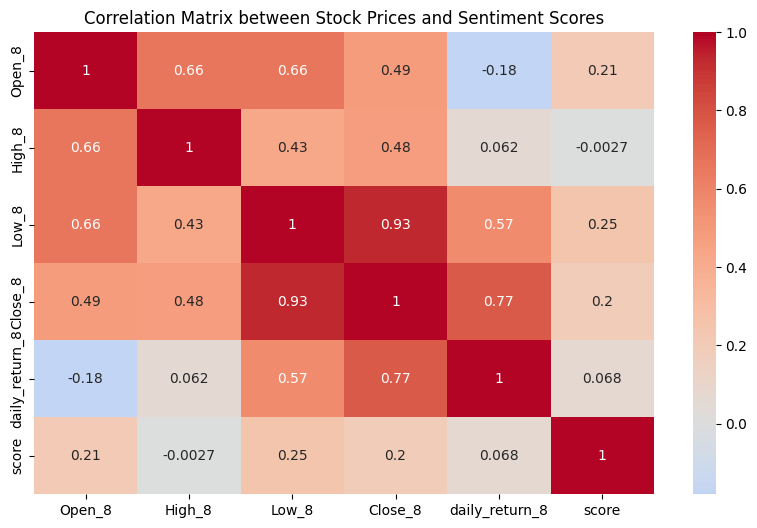

                  Open_9    High_9     Low_9   Close_9  daily_return_9  \
Open_9          1.000000  0.974108  0.753897  0.000496       -0.808623   
High_9          0.974108  1.000000  0.673580  0.073373       -0.744080   
Low_9           0.753897  0.673580  1.000000  0.304568       -0.433872   
Close_9         0.000496  0.073373  0.304568  1.000000        0.587900   
daily_return_9 -0.808623 -0.744080 -0.433872  0.587900        1.000000   
score          -0.006408 -0.045689  0.087244 -0.187578       -0.106606   

                   score  
Open_9         -0.006408  
High_9         -0.045689  
Low_9           0.087244  
Close_9        -0.187578  
daily_return_9 -0.106606  
score           1.000000  


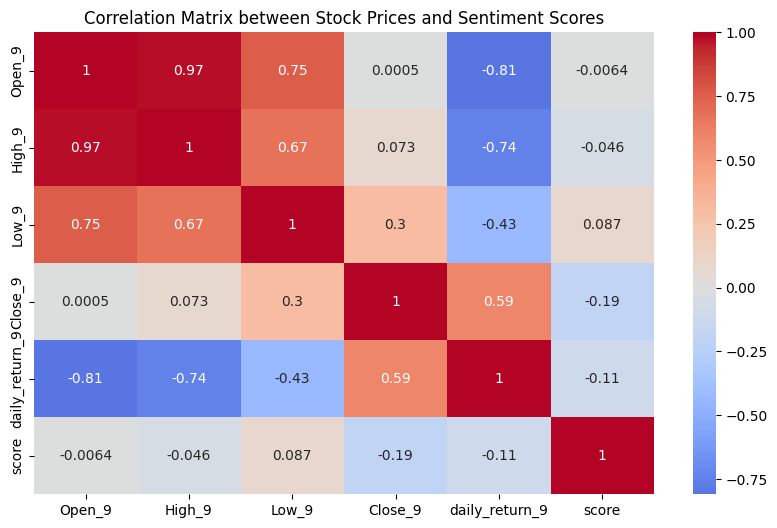

                  Open_10   High_10    Low_10  Close_10  daily_return_10  \
Open_10          1.000000  0.645523  0.403527  0.293438        -0.556089   
High_10          0.645523  1.000000  0.629569  0.812843         0.182204   
Low_10           0.403527  0.629569  1.000000  0.899406         0.455441   
Close_10         0.293438  0.812843  0.899406  1.000000         0.631355   
daily_return_10 -0.556089  0.182204  0.455441  0.631355         1.000000   
score           -0.124030  0.032341 -0.069990  0.027576         0.124397   

                    score  
Open_10         -0.124030  
High_10          0.032341  
Low_10          -0.069990  
Close_10         0.027576  
daily_return_10  0.124397  
score            1.000000  


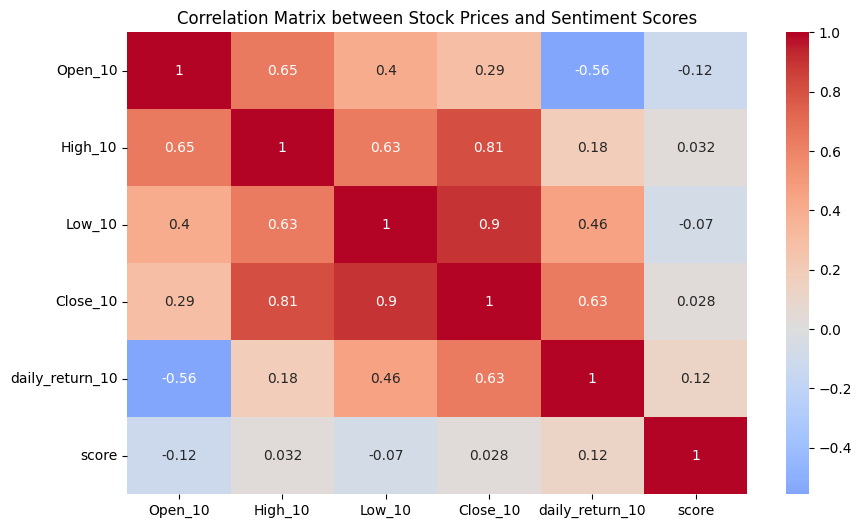

                  Open_11   High_11    Low_11  Close_11  daily_return_11  \
Open_11          1.000000  0.900636  0.924808  0.788376        -0.310996   
High_11          0.900636  1.000000  0.989970  0.967917         0.117713   
Low_11           0.924808  0.989970  1.000000  0.962460         0.073135   
Close_11         0.788376  0.967917  0.962460  1.000000         0.339484   
daily_return_11 -0.310996  0.117713  0.073135  0.339484         1.000000   
score            0.154569  0.216460  0.191380  0.211894         0.089013   

                    score  
Open_11          0.154569  
High_11          0.216460  
Low_11           0.191380  
Close_11         0.211894  
daily_return_11  0.089013  
score            1.000000  


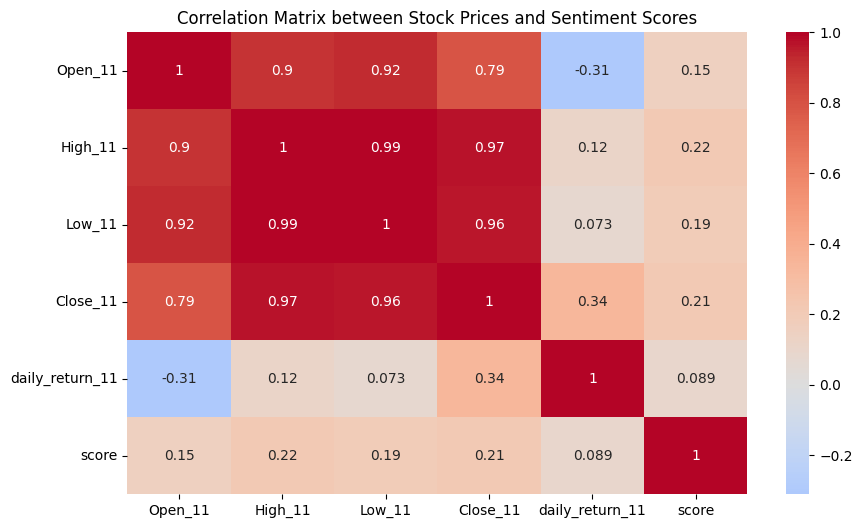

                  Open_12   High_12    Low_12  Close_12  daily_return_12  \
Open_12          1.000000  0.245459  0.790486 -0.392369        -0.833263   
High_12          0.245459  1.000000  0.479180  0.724276         0.288989   
Low_12           0.790486  0.479180  1.000000  0.072833        -0.428201   
Close_12        -0.392369  0.724276  0.072833  1.000000         0.835486   
daily_return_12 -0.833263  0.288989 -0.428201  0.835486         1.000000   
score            0.173625 -0.034571 -0.026176 -0.208374        -0.229050   

                    score  
Open_12          0.173625  
High_12         -0.034571  
Low_12          -0.026176  
Close_12        -0.208374  
daily_return_12 -0.229050  
score            1.000000  


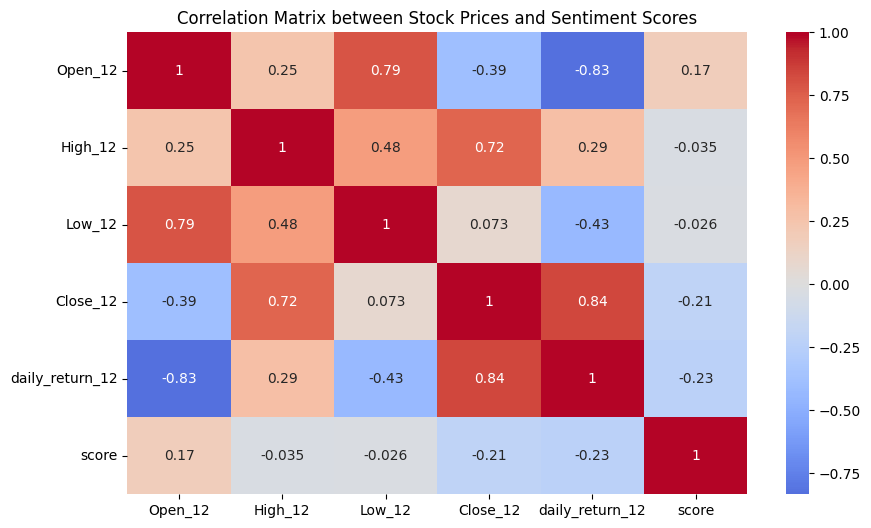

                  Open_13   High_13    Low_13  Close_13  daily_return_13  \
Open_13          1.000000  0.992899  0.969721  0.950032         0.279402   
High_13          0.992899  1.000000  0.990441  0.980122         0.390724   
Low_13           0.969721  0.990441  1.000000  0.995728         0.500101   
Close_13         0.950032  0.980122  0.995728  1.000000         0.565161   
daily_return_13  0.279402  0.390724  0.500101  0.565161         1.000000   
score            0.311771  0.312320  0.304245  0.300367         0.100059   

                    score  
Open_13          0.311771  
High_13          0.312320  
Low_13           0.304245  
Close_13         0.300367  
daily_return_13  0.100059  
score            1.000000  


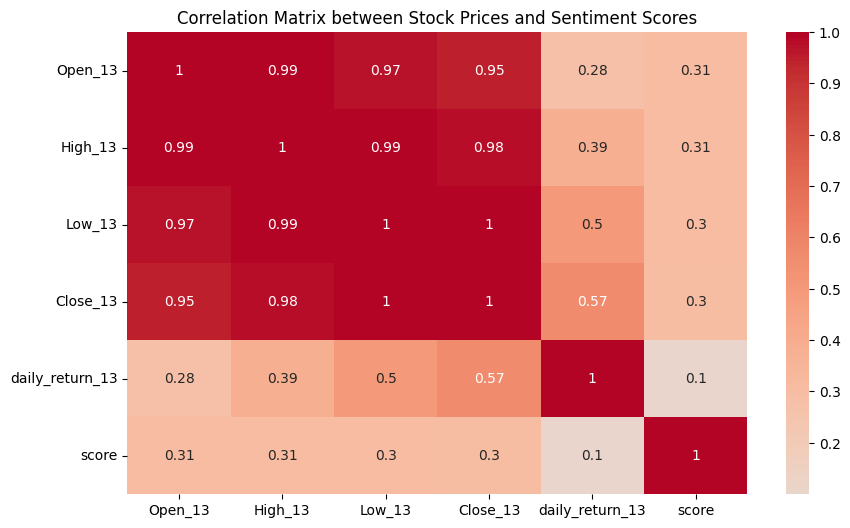

In [ ]:
# Calculate the correlation matrix
correlation_matrix_1 = combined_data_sbux[['Open_1', 'High_1', 'Low_1', 'Close_1', 'daily_return_1', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_1)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_2 = combined_data_sbux[['Open_2', 'High_2', 'Low_2', 'Close_2', 'daily_return_2', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_2)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_3 = combined_data_sbux[['Open_3', 'High_3', 'Low_3', 'Close_3', 'daily_return_3', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_3)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_3, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_4 = combined_data_sbux[['Open_4', 'High_4', 'Low_4', 'Close_4', 'daily_return_4', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_4)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_4, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_5 = combined_data_sbux[['Open_5', 'High_5', 'Low_5', 'Close_5', 'daily_return_5', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_5)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_5, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_6 = combined_data_sbux[['Open_6', 'High_6', 'Low_6', 'Close_6', 'daily_return_6', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_6)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_6, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_8 = combined_data_sbux[['Open_8', 'High_8', 'Low_8', 'Close_8', 'daily_return_8', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_8)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_8, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_9 = combined_data_sbux[['Open_9', 'High_9', 'Low_9', 'Close_9', 'daily_return_9', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_9)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_9, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_10 = combined_data_sbux[['Open_10', 'High_10', 'Low_10', 'Close_10', 'daily_return_10', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_10)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_10, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_11 = combined_data_sbux[['Open_11', 'High_11', 'Low_11', 'Close_11', 'daily_return_11', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_11)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_11, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_12 = combined_data_sbux[['Open_12', 'High_12', 'Low_12', 'Close_12', 'daily_return_12', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_12)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_12, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()


# Calculate the correlation matrix
correlation_matrix_13 = combined_data_sbux[['Open_13', 'High_13', 'Low_13', 'Close_13', 'daily_return_13', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_13)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_13, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

         Date     label     score
0  2024-07-29  NEGATIVE -0.976252
1  2024-07-26  NEGATIVE -0.995426
2  2024-07-19  NEGATIVE -0.991452
3  2024-07-27  NEGATIVE -0.985780
4  2024-07-21  NEGATIVE -0.997813
..        ...       ...       ...
64 2024-07-25  NEGATIVE -0.996926
65 2024-07-26  NEGATIVE -0.998977
66 2024-07-29  NEGATIVE -0.999589
67 2024-07-19  NEGATIVE -0.993795
68 2024-07-20  NEGATIVE -0.999533

[69 rows x 3 columns]
         Date     label     score      Open_1      High_1       Low_1  \
0  2024-07-29  NEGATIVE -0.976252  259.510010  265.500000  257.450012   
1  2024-07-29  NEGATIVE -0.999549  259.510010  265.500000  257.450012   
2  2024-07-29  NEGATIVE -0.999504  259.510010  265.500000  257.450012   
3  2024-07-29  NEGATIVE -0.999589  259.510010  265.500000  257.450012   
4  2024-07-26  NEGATIVE -0.995426  259.950012  260.540009  251.259995   
5  2024-07-26  NEGATIVE -0.997953  259.950012  260.540009  251.259995   
6  2024-07-26  NEGATIVE -0.996201  259.950012  260.540009 

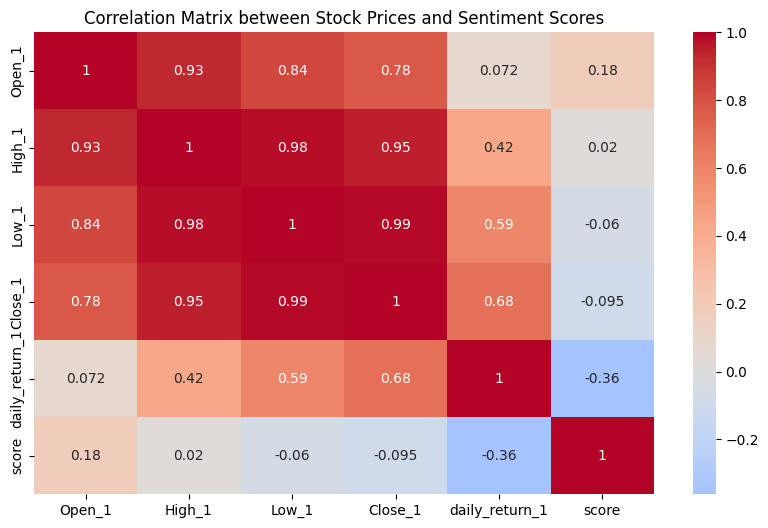

                  Open_2    High_2     Low_2   Close_2  daily_return_2  \
Open_2          1.000000  0.371501  0.881784  0.054420       -0.618301   
High_2          0.371501  1.000000  0.523953  0.912163        0.472614   
Low_2           0.881784  0.523953  1.000000  0.341918       -0.314139   
Close_2         0.054420  0.912163  0.341918  1.000000        0.751119   
daily_return_2 -0.618301  0.472614 -0.314139  0.751119        1.000000   
score           0.396761  0.195549  0.376110  0.063119       -0.211955   

                   score  
Open_2          0.396761  
High_2          0.195549  
Low_2           0.376110  
Close_2         0.063119  
daily_return_2 -0.211955  
score           1.000000  


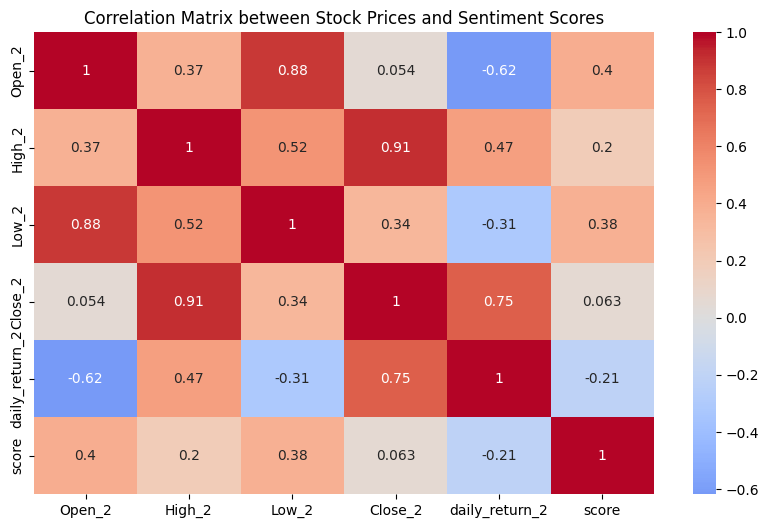

                  Open_3    High_3     Low_3   Close_3  daily_return_3  \
Open_3          1.000000  0.806927  0.935556  0.620339       -0.246472   
High_3          0.806927  1.000000  0.918810  0.917532        0.317502   
Low_3           0.935556  0.918810  1.000000  0.848153        0.099318   
Close_3         0.620339  0.917532  0.848153  1.000000        0.607155   
daily_return_3 -0.246472  0.317502  0.099318  0.607155        1.000000   
score           0.224382  0.085209  0.110961 -0.049119       -0.284106   

                   score  
Open_3          0.224382  
High_3          0.085209  
Low_3           0.110961  
Close_3        -0.049119  
daily_return_3 -0.284106  
score           1.000000  


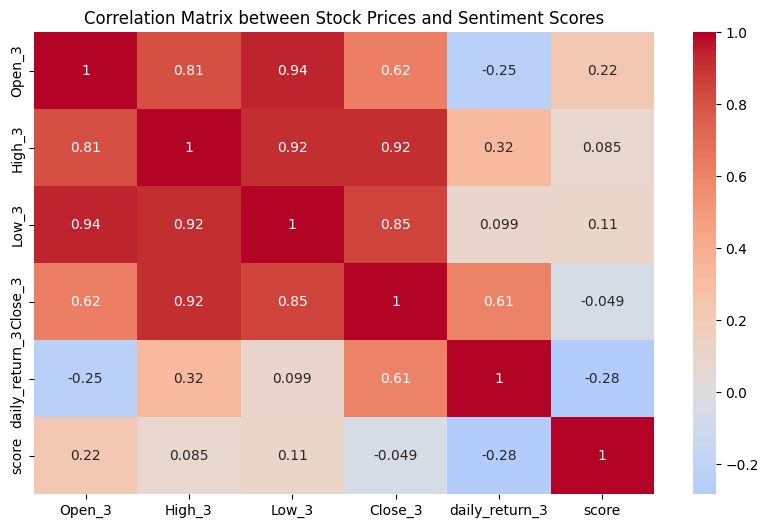

                  Open_4    High_4     Low_4   Close_4  daily_return_4  \
Open_4          1.000000 -0.570025  0.892864 -0.028422       -0.814314   
High_4         -0.570025  1.000000 -0.418828  0.669979        0.848882   
Low_4           0.892864 -0.418828  1.000000  0.173639       -0.613992   
Close_4        -0.028422  0.669979  0.173639  1.000000        0.603097   
daily_return_4 -0.814314  0.848882 -0.613992  0.603097        1.000000   
score           0.020981  0.082858  0.126195  0.252002        0.123749   

                   score  
Open_4          0.020981  
High_4          0.082858  
Low_4           0.126195  
Close_4         0.252002  
daily_return_4  0.123749  
score           1.000000  


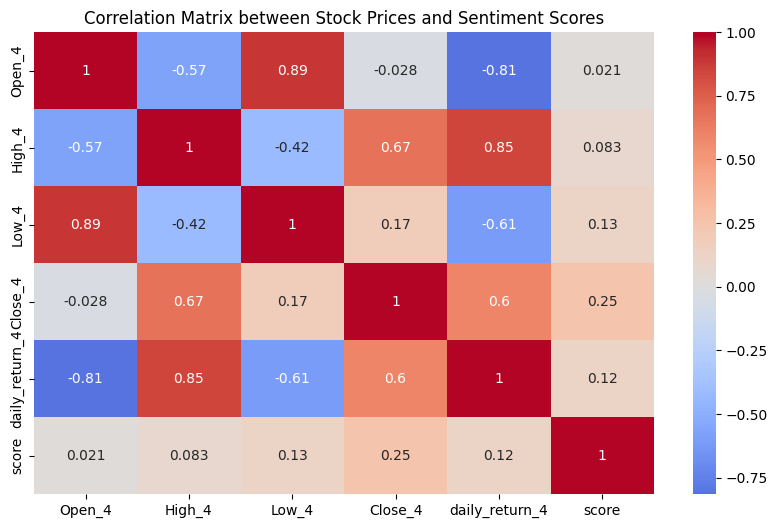

                  Open_5    High_5     Low_5   Close_5  daily_return_5  \
Open_5          1.000000  0.258012  0.665334 -0.258660       -0.818646   
High_5          0.258012  1.000000  0.381660  0.594785        0.188296   
Low_5           0.665334  0.381660  1.000000  0.312142       -0.264324   
Close_5        -0.258660  0.594785  0.312142  1.000000        0.766292   
daily_return_5 -0.818646  0.188296 -0.264324  0.766292        1.000000   
score           0.077144  0.290635  0.204267  0.265499        0.104750   

                   score  
Open_5          0.077144  
High_5          0.290635  
Low_5           0.204267  
Close_5         0.265499  
daily_return_5  0.104750  
score           1.000000  


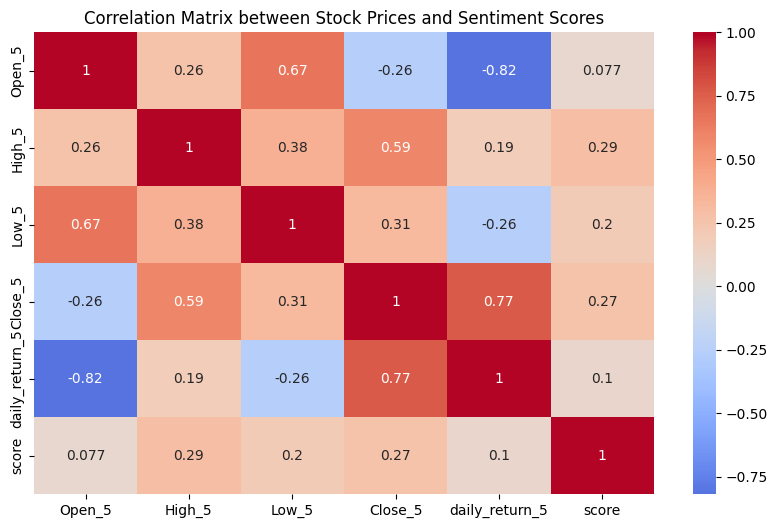

                  Open_6    High_6     Low_6   Close_6  daily_return_6  \
Open_6          1.000000  0.950716  0.862319  0.699165       -0.491999   
High_6          0.950716  1.000000  0.941884  0.848452       -0.244252   
Low_6           0.862319  0.941884  1.000000  0.962969        0.014263   
Close_6         0.699165  0.848452  0.962969  1.000000        0.278424   
daily_return_6 -0.491999 -0.244252  0.014263  0.278424        1.000000   
score           0.181558  0.248593  0.211868  0.217424        0.019413   

                   score  
Open_6          0.181558  
High_6          0.248593  
Low_6           0.211868  
Close_6         0.217424  
daily_return_6  0.019413  
score           1.000000  


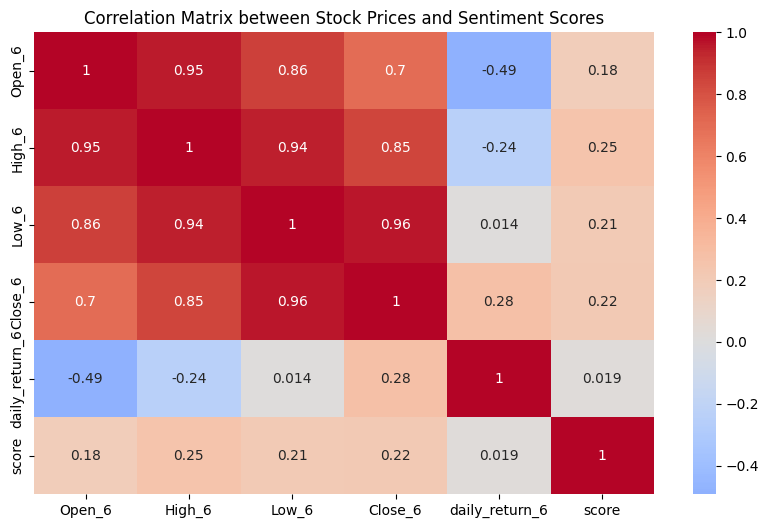

                  Open_8    High_8     Low_8   Close_8  daily_return_8  \
Open_8          1.000000  0.795428  0.807057  0.403901       -0.368921   
High_8          0.795428  1.000000  0.807953  0.660111        0.051774   
Low_8           0.807057  0.807953  1.000000  0.730036        0.110606   
Close_8         0.403901  0.660111  0.730036  1.000000        0.701247   
daily_return_8 -0.368921  0.051774  0.110606  0.701247        1.000000   
score          -0.220369 -0.153403 -0.181637  0.097432        0.271758   

                   score  
Open_8         -0.220369  
High_8         -0.153403  
Low_8          -0.181637  
Close_8         0.097432  
daily_return_8  0.271758  
score           1.000000  


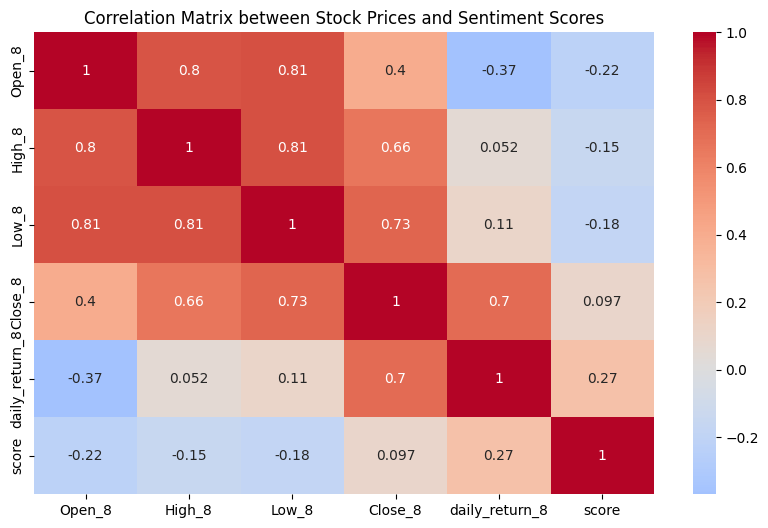

                  Open_9    High_9     Low_9   Close_9  daily_return_9  \
Open_9          1.000000  0.949394  0.800173  0.161691       -0.632440   
High_9          0.949394  1.000000  0.677170  0.091083       -0.648285   
Low_9           0.800173  0.677170  1.000000  0.583024       -0.151841   
Close_9         0.161691  0.091083  0.583024  1.000000        0.662136   
daily_return_9 -0.632440 -0.648285 -0.151841  0.662136        1.000000   
score           0.028719 -0.078875  0.165759  0.300097        0.213131   

                   score  
Open_9          0.028719  
High_9         -0.078875  
Low_9           0.165759  
Close_9         0.300097  
daily_return_9  0.213131  
score           1.000000  


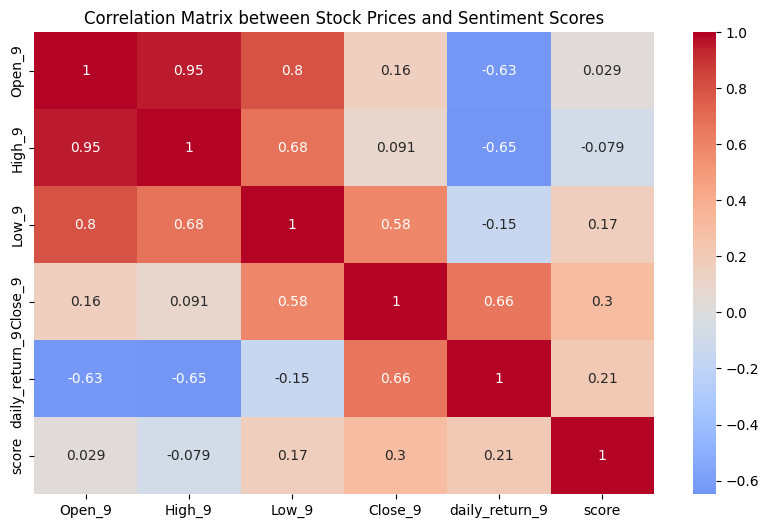

                  Open_10   High_10    Low_10  Close_10  daily_return_10  \
Open_10          1.000000  0.369083  0.560711  0.091679        -0.646456   
High_10          0.369083  1.000000  0.596171  0.746283         0.304254   
Low_10           0.560711  0.596171  1.000000  0.745257         0.170815   
Close_10         0.091679  0.746283  0.745257  1.000000         0.700445   
daily_return_10 -0.646456  0.304254  0.170815  0.700445         1.000000   
score            0.344636  0.023182  0.248218  0.041043        -0.213783   

                    score  
Open_10          0.344636  
High_10          0.023182  
Low_10           0.248218  
Close_10         0.041043  
daily_return_10 -0.213783  
score            1.000000  


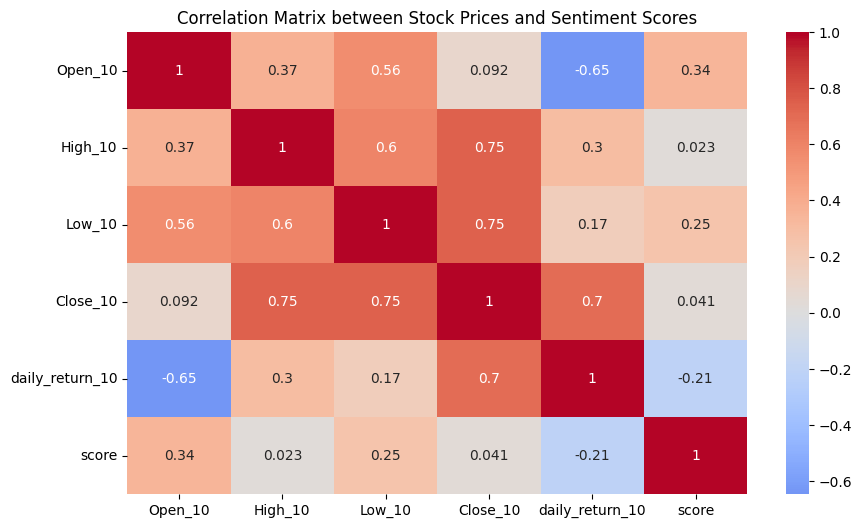

                  Open_11   High_11    Low_11  Close_11  daily_return_11  \
Open_11          1.000000  0.895519  0.846021  0.718790        -0.147929   
High_11          0.895519  1.000000  0.955486  0.911087         0.249707   
Low_11           0.846021  0.955486  1.000000  0.973259         0.393227   
Close_11         0.718790  0.911087  0.973259  1.000000         0.581154   
daily_return_11 -0.147929  0.249707  0.393227  0.581154         1.000000   
score            0.257894  0.239233  0.291066  0.296688         0.119098   

                    score  
Open_11          0.257894  
High_11          0.239233  
Low_11           0.291066  
Close_11         0.296688  
daily_return_11  0.119098  
score            1.000000  


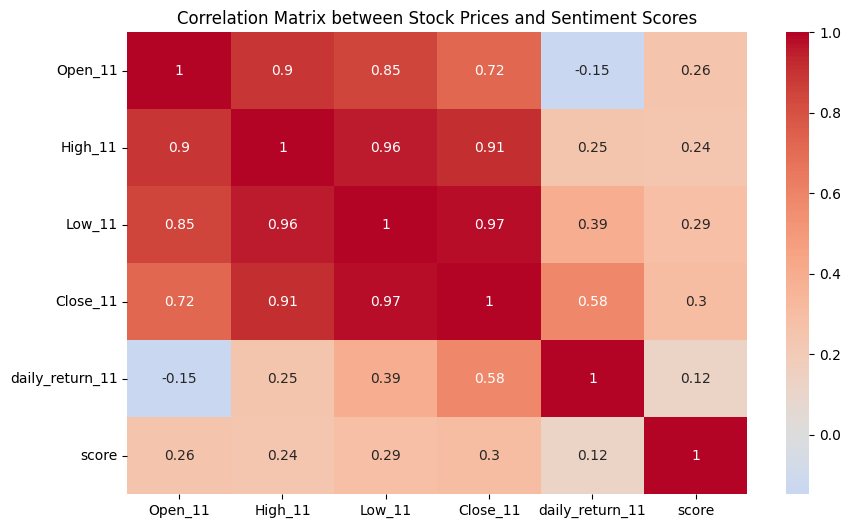

                  Open_12   High_12    Low_12  Close_12  daily_return_12  \
Open_12          1.000000  0.625664  0.788525  0.358165        -0.606604   
High_12          0.625664  1.000000  0.557561  0.672280         0.002583   
Low_12           0.788525  0.557561  1.000000  0.586866        -0.219998   
Close_12         0.358165  0.672280  0.586866  1.000000         0.524990   
daily_return_12 -0.606604  0.002583 -0.219998  0.524990         1.000000   
score            0.024373  0.015993  0.245914  0.095658         0.057917   

                    score  
Open_12          0.024373  
High_12          0.015993  
Low_12           0.245914  
Close_12         0.095658  
daily_return_12  0.057917  
score            1.000000  


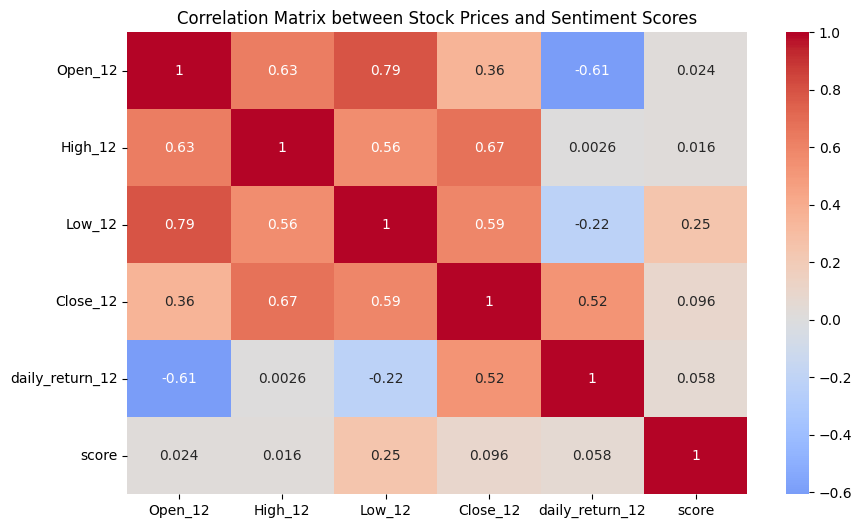

                  Open_13   High_13    Low_13  Close_13  daily_return_13  \
Open_13          1.000000  0.940105  0.841120  0.877260         0.169864   
High_13          0.940105  1.000000  0.968396  0.969818         0.456116   
Low_13           0.841120  0.968396  1.000000  0.978904         0.636353   
Close_13         0.877260  0.969818  0.978904  1.000000         0.622031   
daily_return_13  0.169864  0.456116  0.636353  0.622031         1.000000   
score            0.187223  0.057915 -0.008954  0.065014        -0.168771   

                    score  
Open_13          0.187223  
High_13          0.057915  
Low_13          -0.008954  
Close_13         0.065014  
daily_return_13 -0.168771  
score            1.000000  


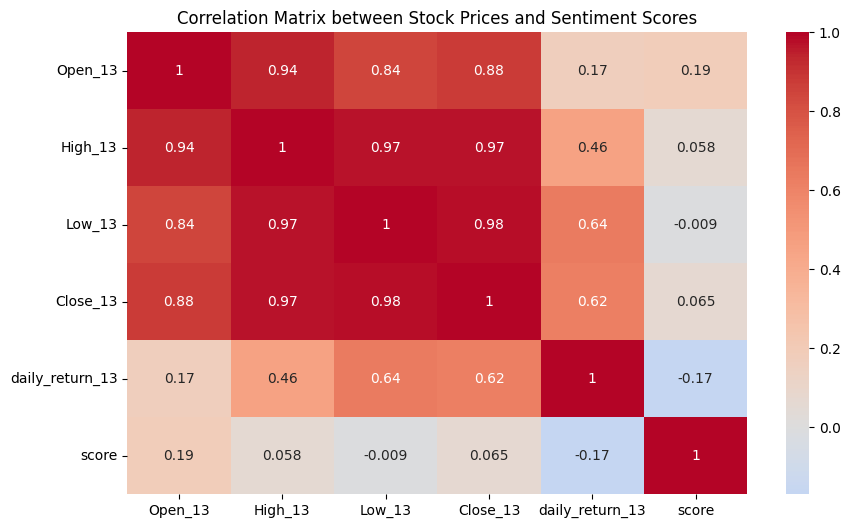

In [ ]:
df_delta = pd.DataFrame(sentiment_scores_delta)
df_delta.insert(0, 'Date', posts_date_delta)

df_delta['score'] = df_delta.apply(lambda row: row['score'] * -1 if row['label'] == 'NEGATIVE' else row['score'], axis=1)

df_delta['Date'] = pd.to_datetime(df_delta['Date'])  # Convert 'Date' column to datetime

# Display DataFrame
print(df_delta)

# Assuming stock_data_1 to stock_data_13 are your stock data DataFrames
# Combine all stock data into a single DataFrame
#stock_data_all = pd.concat([stock_data_1, stock_data_2, stock_data_3, stock_data_4,
                           #stock_data_5, stock_data_6, stock_data_8, stock_data_9,
                           #stock_data_10, stock_data_11, stock_data_12, stock_data_13])

# Merge the sentiment data with the combined stock data
combined_data_delta = pd.merge(df_delta, stock_data_1, on=['Date'], how='inner')
combined_data_delta = pd.merge(combined_data_delta, stock_data_2, on=['Date'], how='inner')
combined_data_delta = pd.merge(combined_data_delta, stock_data_3, on=['Date'], how='inner')
combined_data_delta = pd.merge(combined_data_delta, stock_data_4, on=['Date'], how='inner')
combined_data_delta = pd.merge(combined_data_delta, stock_data_5, on=['Date'], how='inner')
combined_data_delta = pd.merge(combined_data_delta, stock_data_6, on=['Date'], how='inner')
combined_data_delta = pd.merge(combined_data_delta, stock_data_8, on=['Date'], how='inner')
combined_data_delta = pd.merge(combined_data_delta, stock_data_9, on=['Date'], how='inner')
combined_data_delta = pd.merge(combined_data_delta, stock_data_10, on=['Date'], how='inner')
combined_data_delta = pd.merge(combined_data_delta, stock_data_11, on=['Date'], how='inner')
combined_data_delta = pd.merge(combined_data_delta, stock_data_12, on=['Date'], how='inner')
combined_data_delta = pd.merge(combined_data_delta, stock_data_13, on=['Date'], how='inner')



print(combined_data_delta)

# Calculate the correlation matrix
correlation_matrix_1 = combined_data_delta[['Open_1', 'High_1', 'Low_1', 'Close_1', 'daily_return_1', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_1)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_2 = combined_data_delta[['Open_2', 'High_2', 'Low_2', 'Close_2', 'daily_return_2', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_2)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_3 = combined_data_delta[['Open_3', 'High_3', 'Low_3', 'Close_3', 'daily_return_3', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_3)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_3, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_4 = combined_data_delta[['Open_4', 'High_4', 'Low_4', 'Close_4', 'daily_return_4', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_4)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_4, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_5 = combined_data_delta[['Open_5', 'High_5', 'Low_5', 'Close_5', 'daily_return_5', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_5)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_5, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_6 = combined_data_delta[['Open_6', 'High_6', 'Low_6', 'Close_6', 'daily_return_6', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_6)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_6, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_8 = combined_data_delta[['Open_8', 'High_8', 'Low_8', 'Close_8', 'daily_return_8', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_8)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_8, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_9 = combined_data_delta[['Open_9', 'High_9', 'Low_9', 'Close_9', 'daily_return_9', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_9)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_9, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_10 = combined_data_delta[['Open_10', 'High_10', 'Low_10', 'Close_10', 'daily_return_10', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_10)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_10, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_11 = combined_data_delta[['Open_11', 'High_11', 'Low_11', 'Close_11', 'daily_return_11', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_11)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_11, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_12 = combined_data_delta[['Open_12', 'High_12', 'Low_12', 'Close_12', 'daily_return_12', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_12)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_12, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_13 = combined_data_delta[['Open_13', 'High_13', 'Low_13', 'Close_13', 'daily_return_13', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_13)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_13, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

         Date     label     score
0  2024-07-19  NEGATIVE -0.997250
1  2024-07-19  NEGATIVE -0.998778
2  2024-07-23  NEGATIVE -0.999540
3  2024-07-23  POSITIVE  0.936640
4  2024-07-26  NEGATIVE -0.999001
5  2024-07-23  NEGATIVE -0.997645
6  2024-07-21  NEGATIVE -0.999544
7  2024-07-23  NEGATIVE -0.998409
8  2024-07-24  NEGATIVE -0.999325
9  2024-07-21  NEGATIVE -0.976510
10 2024-07-24  NEGATIVE -0.999326
11 2024-07-23  NEGATIVE -0.999639
12 2024-07-27  NEGATIVE -0.999399
13 2024-07-26  NEGATIVE -0.998987
14 2024-07-20  NEGATIVE -0.870727
15 2024-07-29  NEGATIVE -0.992843
16 2024-07-19  NEGATIVE -0.996847
17 2024-07-19  NEGATIVE -0.998177
18 2024-07-24  NEGATIVE -0.999521
19 2024-07-21  POSITIVE  0.998994
20 2024-07-22  NEGATIVE -0.988386
21 2024-07-27  NEGATIVE -0.998890
22 2024-07-23  NEGATIVE -0.996536
23 2024-07-25  NEGATIVE -0.998572
24 2024-07-26  NEGATIVE -0.998679
25 2024-07-19  NEGATIVE -0.993795
         Date     label     score      Open_1      High_1       Low_1  \
0  2024-0

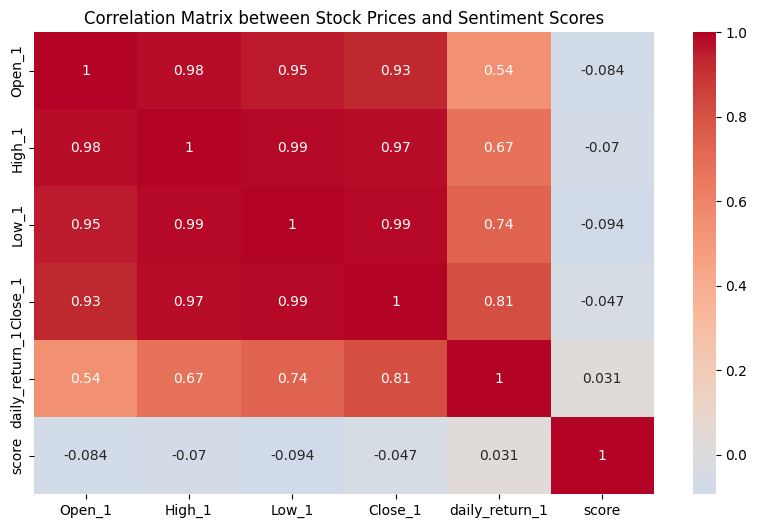

                  Open_2    High_2     Low_2   Close_2  daily_return_2  \
Open_2          1.000000  0.124728  0.842537 -0.045075       -0.597369   
High_2          0.124728  1.000000  0.231992  0.956424        0.698283   
Low_2           0.842537  0.231992  1.000000  0.192828       -0.318945   
Close_2        -0.045075  0.956424  0.192828  1.000000        0.828069   
daily_return_2 -0.597369  0.698283 -0.318945  0.828069        1.000000   
score           0.234409 -0.007914  0.306881  0.001805       -0.130960   

                   score  
Open_2          0.234409  
High_2         -0.007914  
Low_2           0.306881  
Close_2         0.001805  
daily_return_2 -0.130960  
score           1.000000  


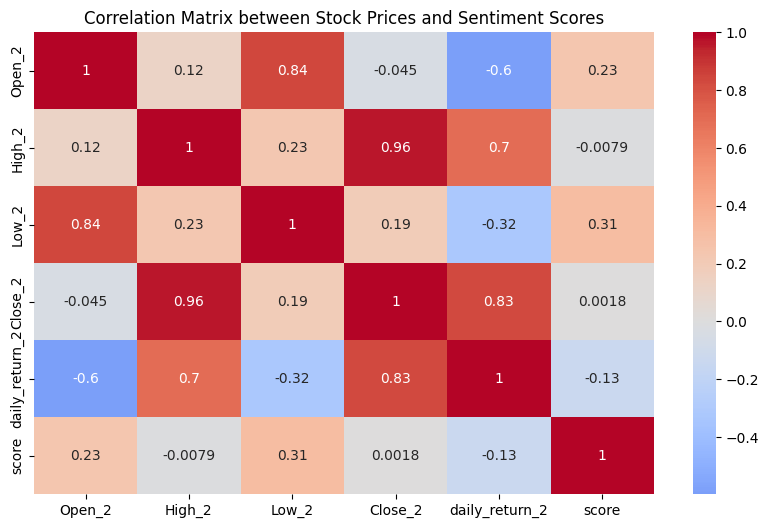

                  Open_3    High_3     Low_3   Close_3  daily_return_3  \
Open_3          1.000000  0.868850  0.961013  0.822037        0.350692   
High_3          0.868850  1.000000  0.920770  0.948422        0.689717   
Low_3           0.961013  0.920770  1.000000  0.936331        0.577222   
Close_3         0.822037  0.948422  0.936331  1.000000        0.821506   
daily_return_3  0.350692  0.689717  0.577222  0.821506        1.000000   
score          -0.078756 -0.150512 -0.064225 -0.107392       -0.097903   

                   score  
Open_3         -0.078756  
High_3         -0.150512  
Low_3          -0.064225  
Close_3        -0.107392  
daily_return_3 -0.097903  
score           1.000000  


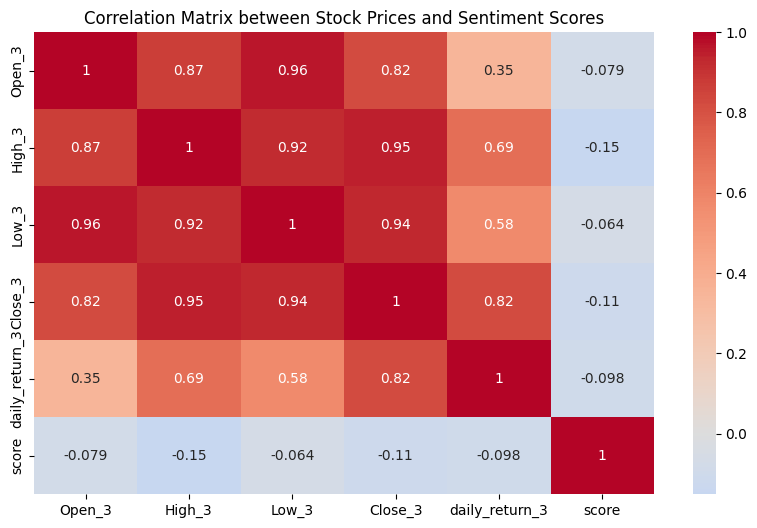

                  Open_4    High_4     Low_4   Close_4  daily_return_4  \
Open_4          1.000000 -0.181958  0.778317  0.202900       -0.690135   
High_4         -0.181958  1.000000 -0.078525  0.689920        0.669344   
Low_4           0.778317 -0.078525  1.000000  0.237377       -0.479586   
Close_4         0.202900  0.689920  0.237377  1.000000        0.568446   
daily_return_4 -0.690135  0.669344 -0.479586  0.568446        1.000000   
score           0.085485  0.112818  0.187211 -0.018205       -0.082780   

                   score  
Open_4          0.085485  
High_4          0.112818  
Low_4           0.187211  
Close_4        -0.018205  
daily_return_4 -0.082780  
score           1.000000  


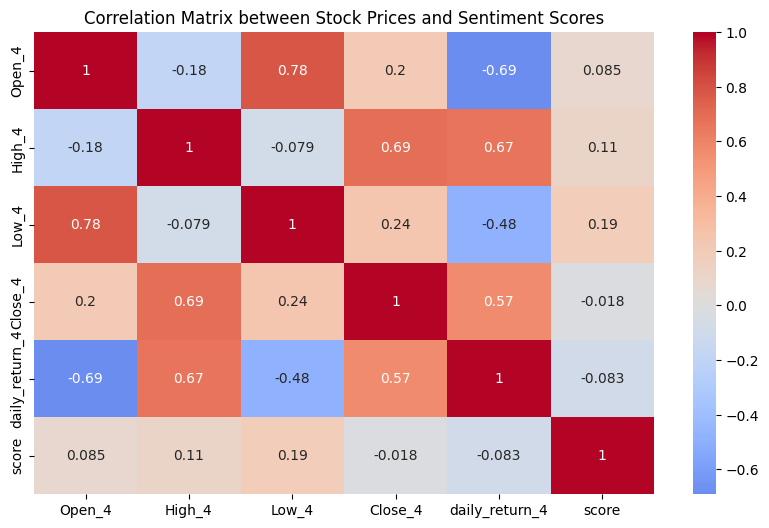

                  Open_5    High_5     Low_5   Close_5  daily_return_5  \
Open_5          1.000000  0.286994  0.731980 -0.252265       -0.840998   
High_5          0.286994  1.000000  0.482387  0.508429        0.091003   
Low_5           0.731980  0.482387  1.000000  0.373075       -0.307867   
Close_5        -0.252265  0.508429  0.373075  1.000000        0.735519   
daily_return_5 -0.840998  0.091003 -0.307867  0.735519        1.000000   
score           0.173631  0.254087  0.307828  0.200750       -0.009248   

                   score  
Open_5          0.173631  
High_5          0.254087  
Low_5           0.307828  
Close_5         0.200750  
daily_return_5 -0.009248  
score           1.000000  


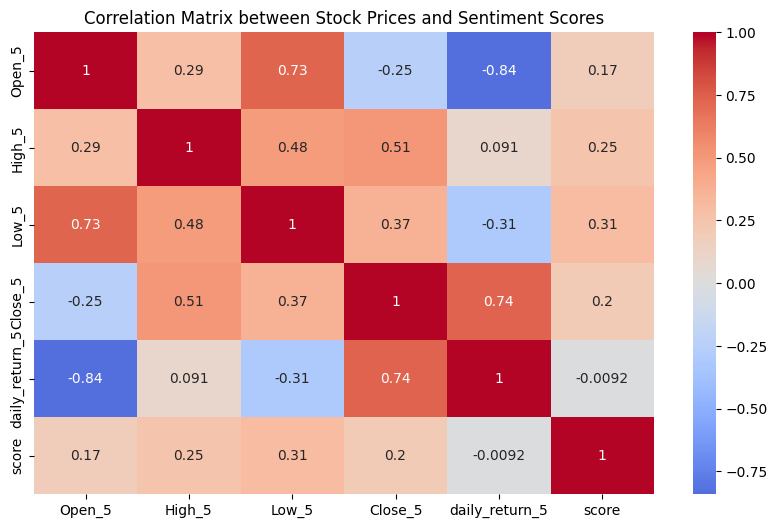

                  Open_6    High_6     Low_6   Close_6  daily_return_6  \
Open_6          1.000000  0.936573  0.818302  0.571788       -0.566127   
High_6          0.936573  1.000000  0.931231  0.784081       -0.281017   
Low_6           0.818302  0.931231  1.000000  0.936981        0.008228   
Close_6         0.571788  0.784081  0.936981  1.000000        0.352538   
daily_return_6 -0.566127 -0.281017  0.008228  0.352538        1.000000   
score           0.158395  0.085520  0.099494  0.029862       -0.148792   

                   score  
Open_6          0.158395  
High_6          0.085520  
Low_6           0.099494  
Close_6         0.029862  
daily_return_6 -0.148792  
score           1.000000  


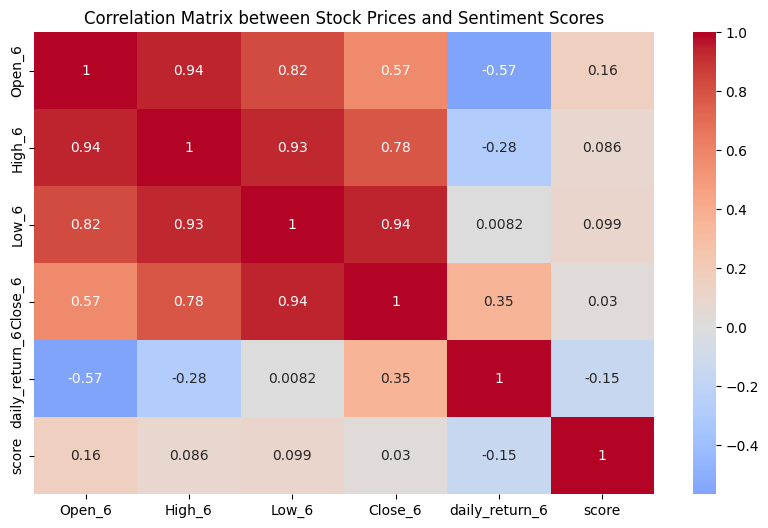

                  Open_8    High_8     Low_8   Close_8  daily_return_8  \
Open_8          1.000000  0.430250  0.549140  0.066720       -0.462370   
High_8          0.430250  1.000000  0.628726  0.666200        0.369511   
Low_8           0.549140  0.628726  1.000000  0.789295        0.413297   
Close_8         0.066720  0.666200  0.789295  1.000000        0.853849   
daily_return_8 -0.462370  0.369511  0.413297  0.853849        1.000000   
score          -0.186153  0.159145  0.044382  0.227209        0.299642   

                   score  
Open_8         -0.186153  
High_8          0.159145  
Low_8           0.044382  
Close_8         0.227209  
daily_return_8  0.299642  
score           1.000000  


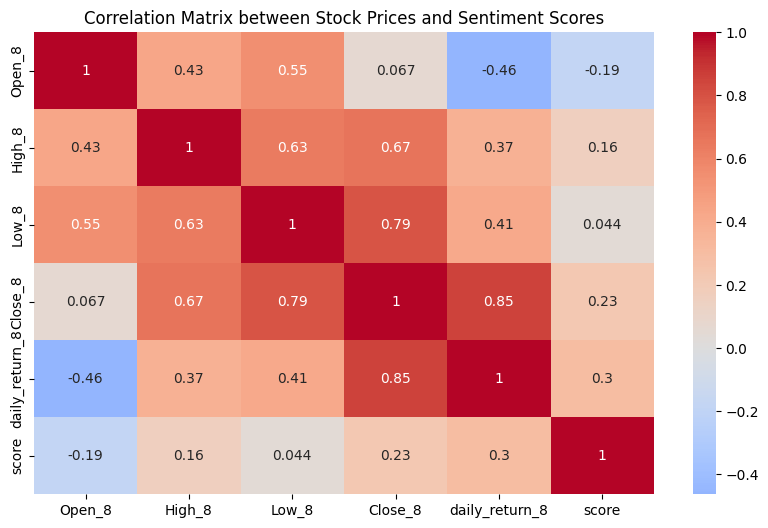

                  Open_9    High_9     Low_9   Close_9  daily_return_9  \
Open_9          1.000000  0.943035  0.814271  0.372276       -0.437489   
High_9          0.943035  1.000000  0.765347  0.438497       -0.327070   
Low_9           0.814271  0.765347  1.000000  0.709581        0.035839   
Close_9         0.372276  0.438497  0.709581  1.000000        0.671705   
daily_return_9 -0.437489 -0.327070  0.035839  0.671705        1.000000   
score           0.169386  0.100403  0.165567  0.115459       -0.023303   

                   score  
Open_9          0.169386  
High_9          0.100403  
Low_9           0.165567  
Close_9         0.115459  
daily_return_9 -0.023303  
score           1.000000  


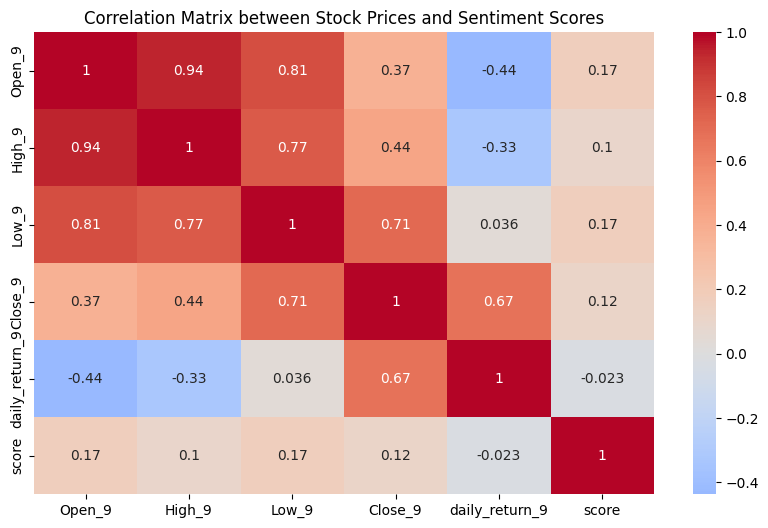

                  Open_10   High_10    Low_10  Close_10  daily_return_10  \
Open_10          1.000000  0.727025  0.665654  0.412741        -0.329703   
High_10          0.727025  1.000000  0.831715  0.847894         0.326946   
Low_10           0.665654  0.831715  1.000000  0.865892         0.394087   
Close_10         0.412741  0.847894  0.865892  1.000000         0.723826   
daily_return_10 -0.329703  0.326946  0.394087  0.723826         1.000000   
score            0.219529  0.333807  0.288986  0.315989         0.160847   

                    score  
Open_10          0.219529  
High_10          0.333807  
Low_10           0.288986  
Close_10         0.315989  
daily_return_10  0.160847  
score            1.000000  


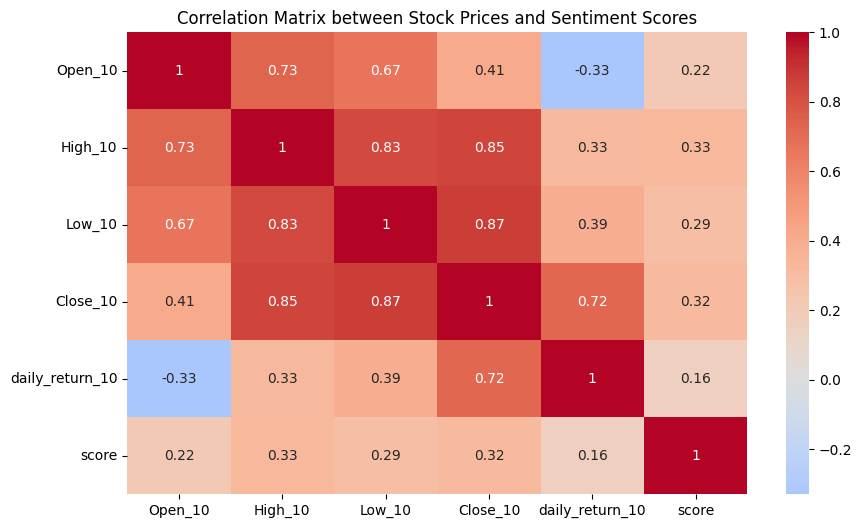

                  Open_11   High_11    Low_11  Close_11  daily_return_11  \
Open_11          1.000000  0.929641  0.871995  0.738069        -0.419281   
High_11          0.929641  1.000000  0.966809  0.912341        -0.084346   
Low_11           0.871995  0.966809  1.000000  0.969460         0.072050   
Close_11         0.738069  0.912341  0.969460  1.000000         0.303014   
daily_return_11 -0.419281 -0.084346  0.072050  0.303014         1.000000   
score            0.225416  0.252589  0.279660  0.263666         0.036425   

                    score  
Open_11          0.225416  
High_11          0.252589  
Low_11           0.279660  
Close_11         0.263666  
daily_return_11  0.036425  
score            1.000000  


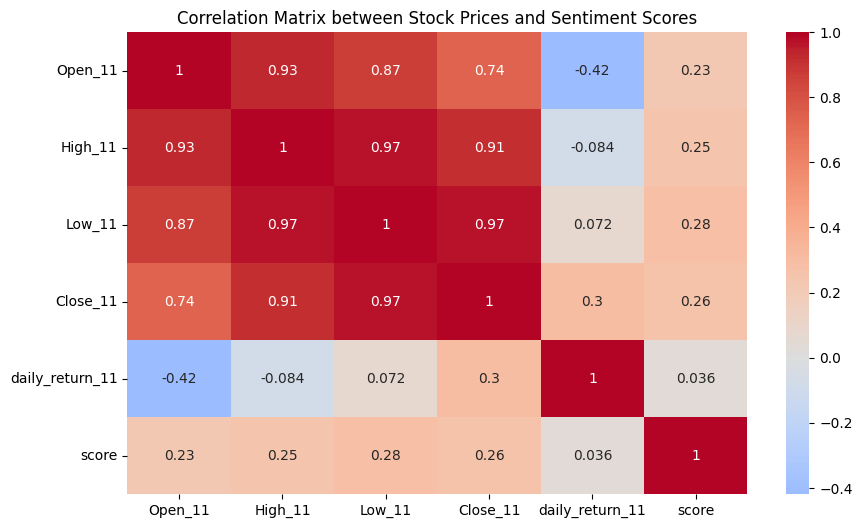

                  Open_12   High_12    Low_12  Close_12  daily_return_12  \
Open_12          1.000000  0.124812  0.819406  0.002220        -0.667397   
High_12          0.124812  1.000000  0.189188  0.575306         0.346140   
Low_12           0.819406  0.189188  1.000000  0.377762        -0.267206   
Close_12         0.002220  0.575306  0.377762  1.000000         0.743214   
daily_return_12 -0.667397  0.346140 -0.267206  0.743214         1.000000   
score            0.120278 -0.185265  0.151594  0.036410        -0.053983   

                    score  
Open_12          0.120278  
High_12         -0.185265  
Low_12           0.151594  
Close_12         0.036410  
daily_return_12 -0.053983  
score            1.000000  


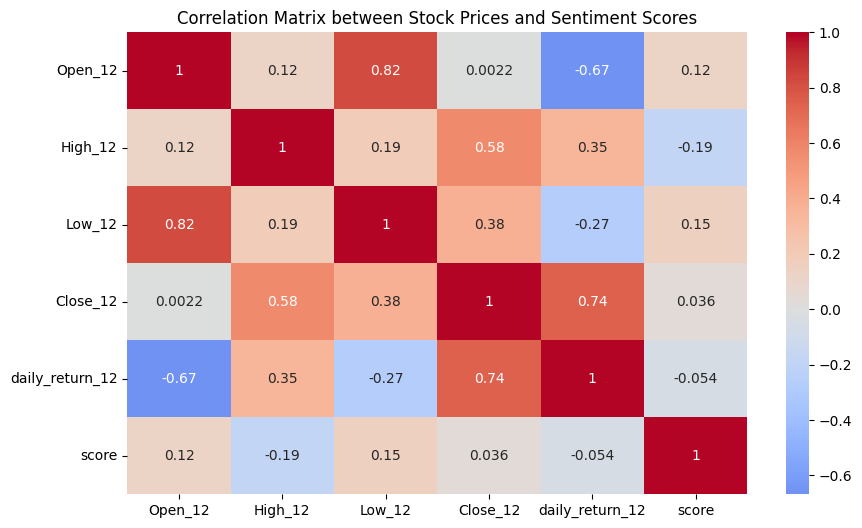

                  Open_13   High_13    Low_13  Close_13  daily_return_13  \
Open_13          1.000000  0.976088  0.919550  0.896191         0.089959   
High_13          0.976088  1.000000  0.978863  0.962353         0.283941   
Low_13           0.919550  0.978863  1.000000  0.989038         0.452619   
Close_13         0.896191  0.962353  0.989038  1.000000         0.522478   
daily_return_13  0.089959  0.283941  0.452619  0.522478         1.000000   
score           -0.031774 -0.000646  0.037971  0.059639         0.194213   

                    score  
Open_13         -0.031774  
High_13         -0.000646  
Low_13           0.037971  
Close_13         0.059639  
daily_return_13  0.194213  
score            1.000000  


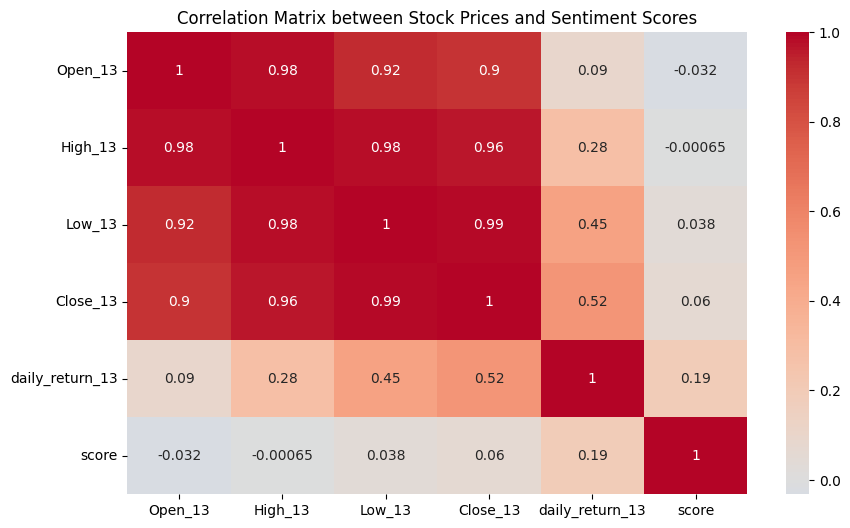

In [ ]:
df_aa = pd.DataFrame(sentiment_scores_aa)
df_aa.insert(0, 'Date', posts_date_aa)

df_aa['score'] = df_aa.apply(lambda row: row['score'] * -1 if row['label'] == 'NEGATIVE' else row['score'], axis=1)

df_aa['Date'] = pd.to_datetime(df_aa['Date'])  # Convert 'Date' column to datetime

# Display DataFrame
print(df_aa)

# Assuming stock_data_1 to stock_data_13 are your stock data DataFrames
# Combine all stock data into a single DataFrame
#stock_data_all = pd.concat([stock_data_1, stock_data_2, stock_data_3, stock_data_4,
                           #stock_data_5, stock_data_6, stock_data_8, stock_data_9,
                           #stock_data_10, stock_data_11, stock_data_12, stock_data_13])

# Merge the sentiment data with the combined stock data
combined_data_aa = pd.merge(df_aa, stock_data_1, on=['Date'], how='inner')
combined_data_aa = pd.merge(combined_data_aa, stock_data_2, on=['Date'], how='inner')
combined_data_aa = pd.merge(combined_data_aa, stock_data_3, on=['Date'], how='inner')
combined_data_aa = pd.merge(combined_data_aa, stock_data_4, on=['Date'], how='inner')
combined_data_aa = pd.merge(combined_data_aa, stock_data_5, on=['Date'], how='inner')
combined_data_aa = pd.merge(combined_data_aa, stock_data_6, on=['Date'], how='inner')
combined_data_aa = pd.merge(combined_data_aa, stock_data_8, on=['Date'], how='inner')
combined_data_aa = pd.merge(combined_data_aa, stock_data_9, on=['Date'], how='inner')
combined_data_aa = pd.merge(combined_data_aa, stock_data_10, on=['Date'], how='inner')
combined_data_aa = pd.merge(combined_data_aa, stock_data_11, on=['Date'], how='inner')
combined_data_aa = pd.merge(combined_data_aa, stock_data_12, on=['Date'], how='inner')
combined_data_aa = pd.merge(combined_data_aa, stock_data_13, on=['Date'], how='inner')



print(combined_data_aa)

# Calculate the correlation matrix
correlation_matrix_1 = combined_data_aa[['Open_1', 'High_1', 'Low_1', 'Close_1', 'daily_return_1', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_1)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_2 = combined_data_aa[['Open_2', 'High_2', 'Low_2', 'Close_2', 'daily_return_2', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_2)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_3 = combined_data_aa[['Open_3', 'High_3', 'Low_3', 'Close_3', 'daily_return_3', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_3)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_3, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_4 = combined_data_aa[['Open_4', 'High_4', 'Low_4', 'Close_4', 'daily_return_4', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_4)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_4, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_5 = combined_data_aa[['Open_5', 'High_5', 'Low_5', 'Close_5', 'daily_return_5', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_5)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_5, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_6 = combined_data_aa[['Open_6', 'High_6', 'Low_6', 'Close_6', 'daily_return_6', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_6)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_6, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_8 = combined_data_aa[['Open_8', 'High_8', 'Low_8', 'Close_8', 'daily_return_8', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_8)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_8, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_9 = combined_data_aa[['Open_9', 'High_9', 'Low_9', 'Close_9', 'daily_return_9', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_9)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_9, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_10 = combined_data_aa[['Open_10', 'High_10', 'Low_10', 'Close_10', 'daily_return_10', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_10)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_10, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_11 = combined_data_aa[['Open_11', 'High_11', 'Low_11', 'Close_11', 'daily_return_11', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_11)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_11, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_12 = combined_data_aa[['Open_12', 'High_12', 'Low_12', 'Close_12', 'daily_return_12', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_12)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_12, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_13 = combined_data_aa[['Open_13', 'High_13', 'Low_13', 'Close_13', 'daily_return_13', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_13)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_13, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

         Date     label     score
0  2024-07-19  NEGATIVE -0.936770
1  2024-07-21  POSITIVE  0.999791
2  2024-07-22  NEGATIVE -0.999390
3  2024-07-20  NEGATIVE -0.986066
4  2024-07-28  NEGATIVE -0.997051
5  2024-07-20  NEGATIVE -0.994885
6  2024-07-20  NEGATIVE -0.999510
7  2024-07-23  NEGATIVE -0.997231
8  2024-07-19  NEGATIVE -0.983583
9  2024-07-20  NEGATIVE -0.997022
10 2024-07-22  NEGATIVE -0.998678
11 2024-07-20  NEGATIVE -0.996994
12 2024-07-23  NEGATIVE -0.998694
13 2024-07-21  NEGATIVE -0.875824
14 2024-07-20  NEGATIVE -0.999351
15 2024-07-21  NEGATIVE -0.999360
16 2024-07-28  NEGATIVE -0.992604
17 2024-07-29  NEGATIVE -0.958234
18 2024-07-22  NEGATIVE -0.998572
19 2024-07-23  NEGATIVE -0.999478
20 2024-07-20  NEGATIVE -0.999719
21 2024-07-19  NEGATIVE -0.998410
22 2024-07-22  NEGATIVE -0.997668
23 2024-07-29  NEGATIVE -0.994609
24 2024-07-21  NEGATIVE -0.999480
25 2024-07-26  NEGATIVE -0.998343
26 2024-07-21  NEGATIVE -0.998130
27 2024-07-29  NEGATIVE -0.609987
28 2024-07-19 

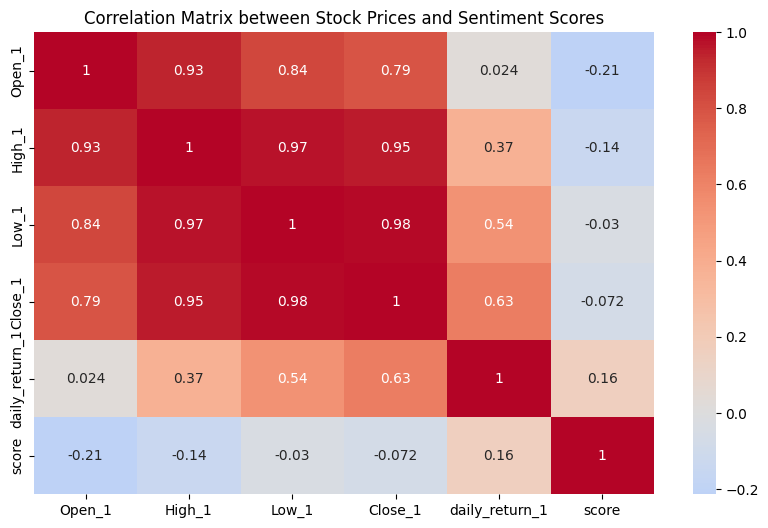

                  Open_2    High_2     Low_2   Close_2  daily_return_2  \
Open_2          1.000000  0.377479  0.899385  0.079090       -0.611328   
High_2          0.377479  1.000000  0.480750  0.899193        0.459952   
Low_2           0.899385  0.480750  1.000000  0.334992       -0.341216   
Close_2         0.079090  0.899193  0.334992  1.000000        0.740534   
daily_return_2 -0.611328  0.459952 -0.341216  0.740534        1.000000   
score          -0.306445 -0.239648 -0.259265 -0.062848        0.157202   

                   score  
Open_2         -0.306445  
High_2         -0.239648  
Low_2          -0.259265  
Close_2        -0.062848  
daily_return_2  0.157202  
score           1.000000  


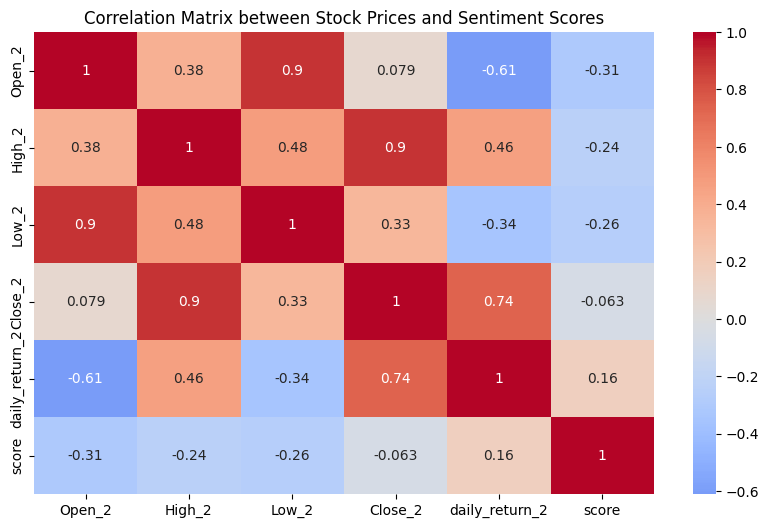

                  Open_3    High_3     Low_3   Close_3  daily_return_3  \
Open_3          1.000000  0.771436  0.932802  0.574293       -0.329525   
High_3          0.771436  1.000000  0.891065  0.915773        0.292870   
Low_3           0.932802  0.891065  1.000000  0.816128        0.014951   
Close_3         0.574293  0.915773  0.816128  1.000000        0.583615   
daily_return_3 -0.329525  0.292870  0.014951  0.583615        1.000000   
score           0.047290 -0.080020 -0.034925 -0.150647       -0.222596   

                   score  
Open_3          0.047290  
High_3         -0.080020  
Low_3          -0.034925  
Close_3        -0.150647  
daily_return_3 -0.222596  
score           1.000000  


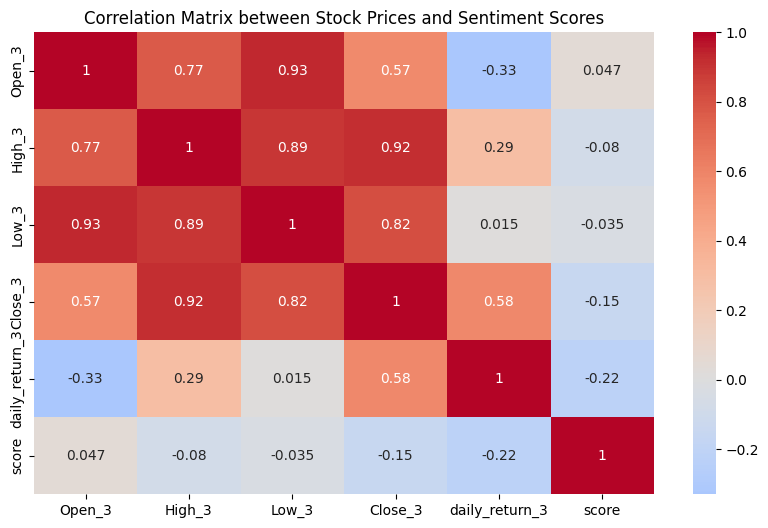

                  Open_4    High_4     Low_4   Close_4  daily_return_4  \
Open_4          1.000000 -0.750559  0.944714 -0.166621       -0.912035   
High_4         -0.750559  1.000000 -0.675361  0.445923        0.822720   
Low_4           0.944714 -0.675361  1.000000 -0.068066       -0.825637   
Close_4        -0.166621  0.445923 -0.068066  1.000000        0.556084   
daily_return_4 -0.912035  0.822720 -0.825637  0.556084        1.000000   
score           0.091937 -0.070966  0.094783 -0.229765       -0.173433   

                   score  
Open_4          0.091937  
High_4         -0.070966  
Low_4           0.094783  
Close_4        -0.229765  
daily_return_4 -0.173433  
score           1.000000  


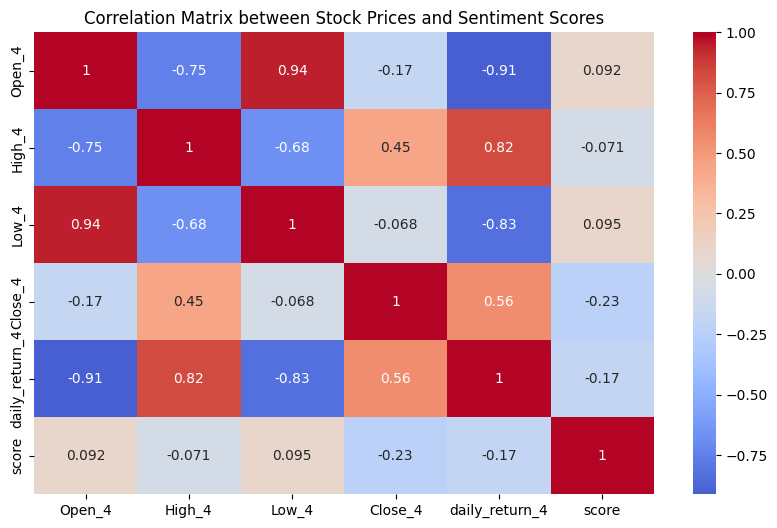

                  Open_5    High_5     Low_5   Close_5  daily_return_5  \
Open_5          1.000000  0.342650  0.838927  0.106084       -0.740327   
High_5          0.342650  1.000000  0.463220  0.808739        0.272802   
Low_5           0.838927  0.463220  1.000000  0.370658       -0.436995   
Close_5         0.106084  0.808739  0.370658  1.000000        0.589690   
daily_return_5 -0.740327  0.272802 -0.436995  0.589690        1.000000   
score           0.028215 -0.398986 -0.055202 -0.278963       -0.213414   

                   score  
Open_5          0.028215  
High_5         -0.398986  
Low_5          -0.055202  
Close_5        -0.278963  
daily_return_5 -0.213414  
score           1.000000  


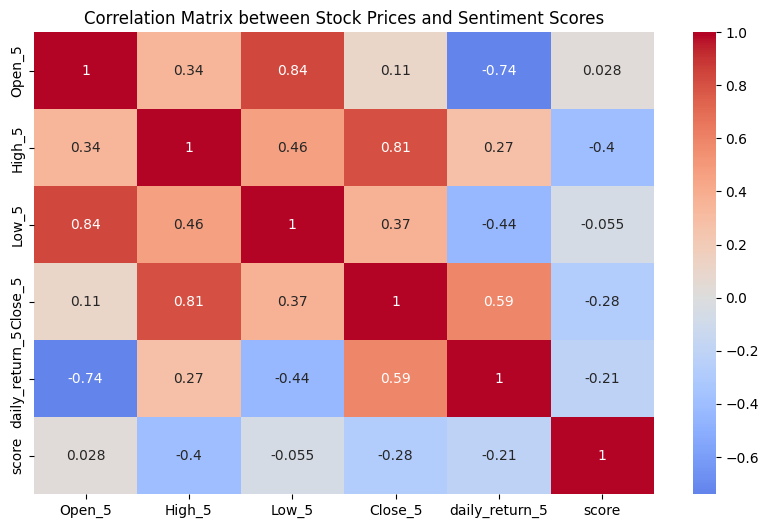

                  Open_6    High_6     Low_6   Close_6  daily_return_6  \
Open_6          1.000000  0.956560  0.906185  0.754844       -0.699174   
High_6          0.956560  1.000000  0.937492  0.853319       -0.525876   
Low_6           0.906185  0.937492  1.000000  0.957871       -0.335044   
Close_6         0.754844  0.853319  0.957871  1.000000       -0.058867   
daily_return_6 -0.699174 -0.525876 -0.335044 -0.058867        1.000000   
score          -0.081537 -0.110653  0.067996  0.117299        0.249859   

                   score  
Open_6         -0.081537  
High_6         -0.110653  
Low_6           0.067996  
Close_6         0.117299  
daily_return_6  0.249859  
score           1.000000  


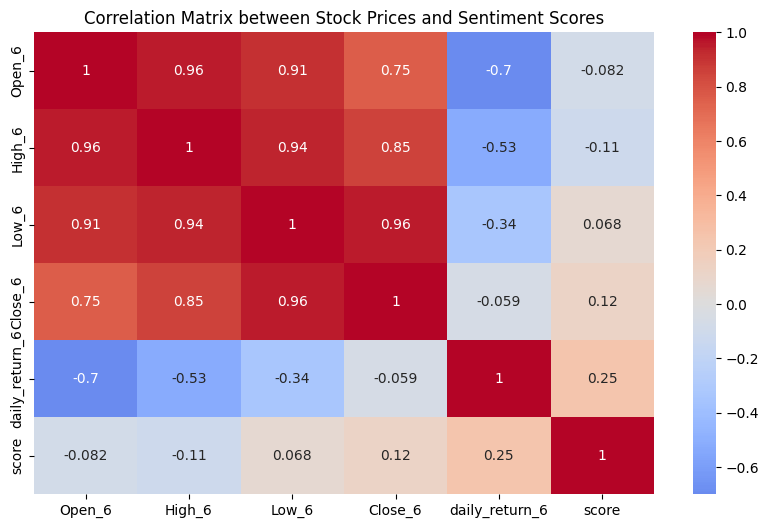

                  Open_8    High_8     Low_8   Close_8  daily_return_8  \
Open_8          1.000000  0.759605  0.837270  0.491544       -0.230718   
High_8          0.759605  1.000000  0.869920  0.813235        0.316786   
Low_8           0.837270  0.869920  1.000000  0.774605        0.211078   
Close_8         0.491544  0.813235  0.774605  1.000000        0.733940   
daily_return_8 -0.230718  0.316786  0.211078  0.733940        1.000000   
score          -0.415788 -0.510986 -0.415997 -0.491830       -0.226258   

                   score  
Open_8         -0.415788  
High_8         -0.510986  
Low_8          -0.415997  
Close_8        -0.491830  
daily_return_8 -0.226258  
score           1.000000  


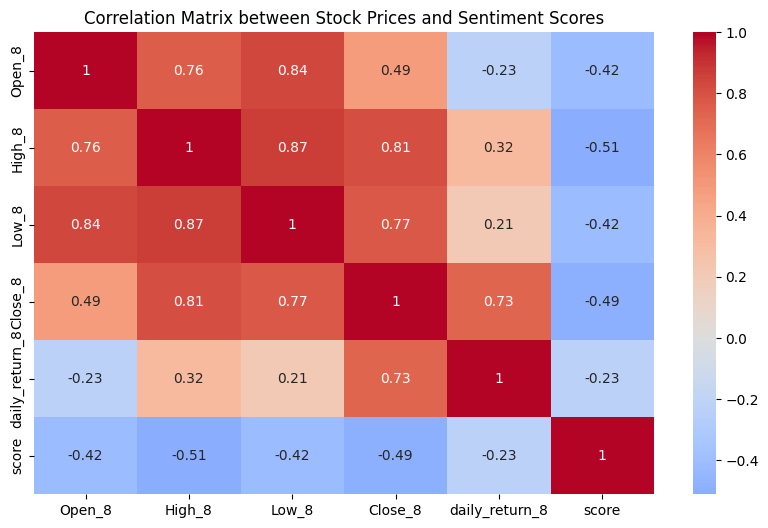

                  Open_9    High_9     Low_9   Close_9  daily_return_9  \
Open_9          1.000000  0.960489  0.770842  0.001882       -0.818638   
High_9          0.960489  1.000000  0.617355 -0.150421       -0.872893   
Low_9           0.770842  0.617355  1.000000  0.484601       -0.355523   
Close_9         0.001882 -0.150421  0.484601  1.000000        0.572746   
daily_return_9 -0.818638 -0.872893 -0.355523  0.572746        1.000000   
score           0.333017  0.425928 -0.028186 -0.298974       -0.442868   

                   score  
Open_9          0.333017  
High_9          0.425928  
Low_9          -0.028186  
Close_9        -0.298974  
daily_return_9 -0.442868  
score           1.000000  


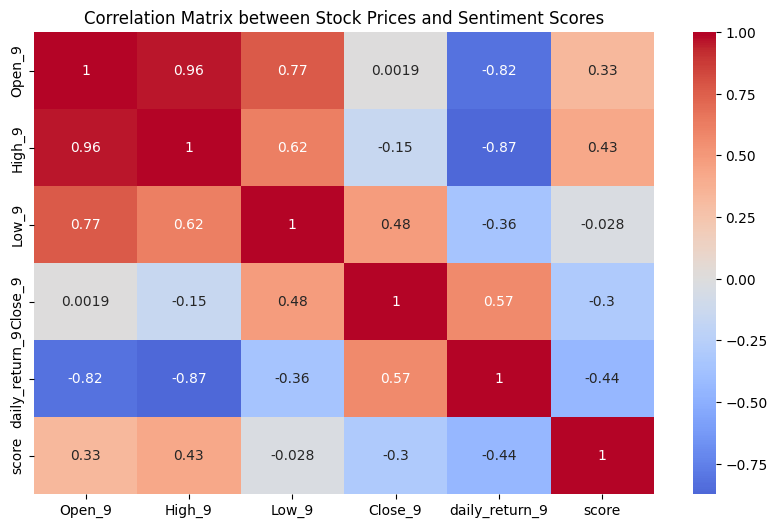

                  Open_10   High_10    Low_10  Close_10  daily_return_10  \
Open_10          1.000000  0.353674  0.563026  0.190063        -0.492482   
High_10          0.353674  1.000000  0.652431  0.872219         0.537356   
Low_10           0.563026  0.652431  1.000000  0.810469         0.348242   
Close_10         0.190063  0.872219  0.810469  1.000000         0.760832   
daily_return_10 -0.492482  0.537356  0.348242  0.760832         1.000000   
score            0.014730 -0.131543  0.092759  0.010966        -0.000510   

                    score  
Open_10          0.014730  
High_10         -0.131543  
Low_10           0.092759  
Close_10         0.010966  
daily_return_10 -0.000510  
score            1.000000  


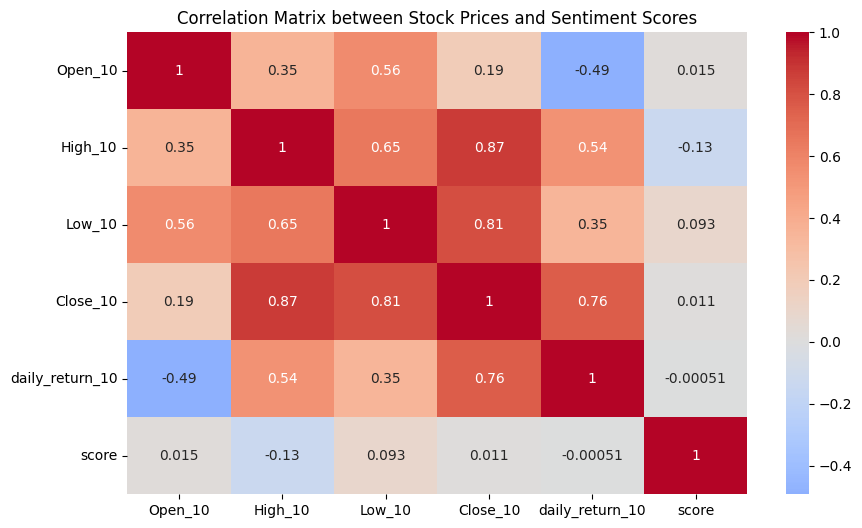

                  Open_11   High_11    Low_11  Close_11  daily_return_11  \
Open_11          1.000000  0.906229  0.907275  0.823227         0.159731   
High_11          0.906229  1.000000  0.976120  0.957675         0.513515   
Low_11           0.907275  0.976120  1.000000  0.980540         0.550614   
Close_11         0.823227  0.957675  0.980540  1.000000         0.691865   
daily_return_11  0.159731  0.513515  0.550614  0.691865         1.000000   
score           -0.190895 -0.282283 -0.205139 -0.219250        -0.139149   

                    score  
Open_11         -0.190895  
High_11         -0.282283  
Low_11          -0.205139  
Close_11        -0.219250  
daily_return_11 -0.139149  
score            1.000000  


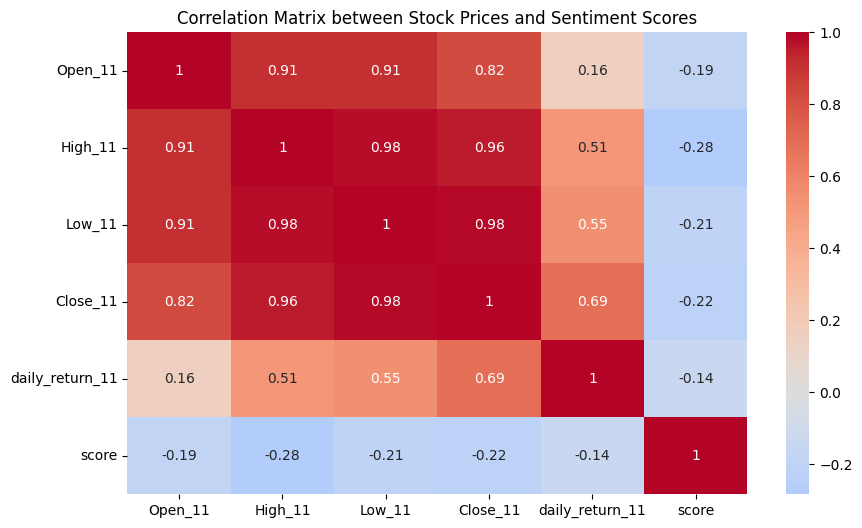

                  Open_12   High_12    Low_12  Close_12  daily_return_12  \
Open_12          1.000000  0.761869  0.840376  0.528175        -0.702314   
High_12          0.761869  1.000000  0.725675  0.733114        -0.256940   
Low_12           0.840376  0.725675  1.000000  0.673310        -0.398429   
Close_12         0.528175  0.733114  0.673310  1.000000         0.233514   
daily_return_12 -0.702314 -0.256940 -0.398429  0.233514         1.000000   
score            0.426932  0.393694  0.384718  0.200367        -0.319185   

                    score  
Open_12          0.426932  
High_12          0.393694  
Low_12           0.384718  
Close_12         0.200367  
daily_return_12 -0.319185  
score            1.000000  


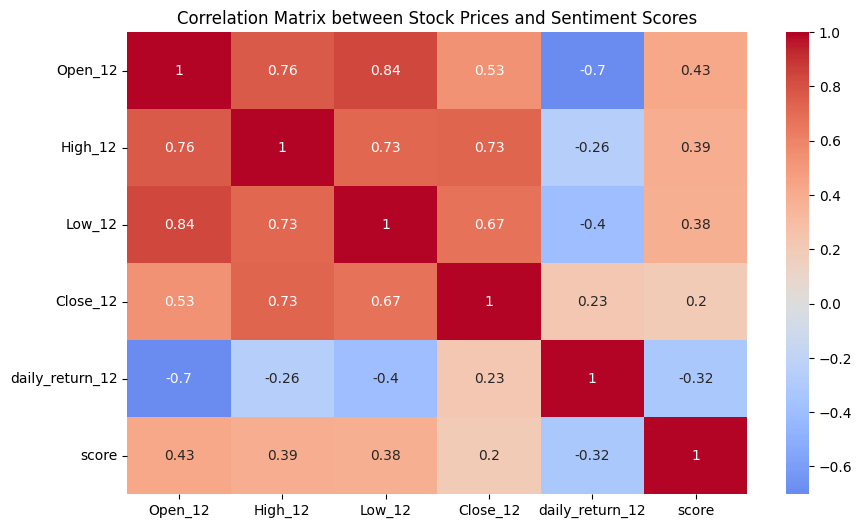

                  Open_13   High_13    Low_13  Close_13  daily_return_13  \
Open_13          1.000000  0.943673  0.851349  0.876258         0.342430   
High_13          0.943673  1.000000  0.969437  0.969093         0.599237   
Low_13           0.851349  0.969437  1.000000  0.984977         0.756662   
Close_13         0.876258  0.969093  0.984977  1.000000         0.752750   
daily_return_13  0.342430  0.599237  0.756662  0.752750         1.000000   
score           -0.280825 -0.316844 -0.391206 -0.401549        -0.402289   

                    score  
Open_13         -0.280825  
High_13         -0.316844  
Low_13          -0.391206  
Close_13        -0.401549  
daily_return_13 -0.402289  
score            1.000000  


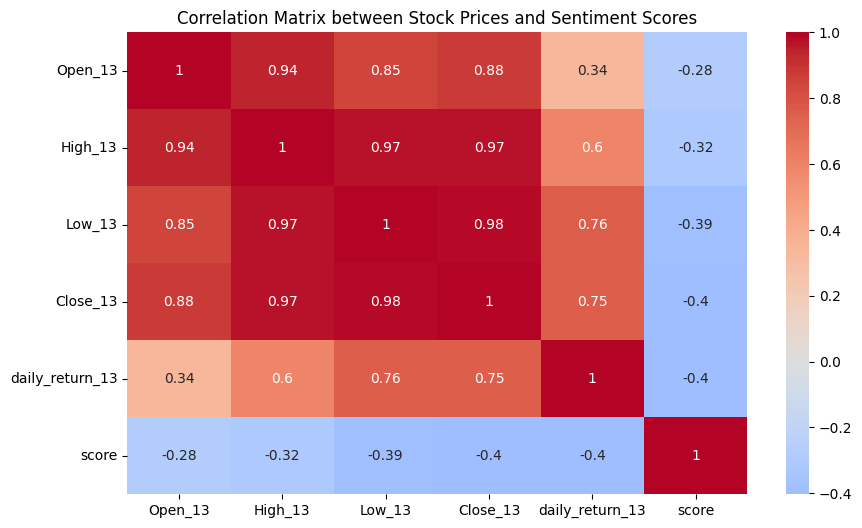

In [ ]:
df_ua = pd.DataFrame(sentiment_scores_ua)
df_ua.insert(0, 'Date', posts_date_ua)

df_ua['score'] = df_ua.apply(lambda row: row['score'] * -1 if row['label'] == 'NEGATIVE' else row['score'], axis=1)

df_ua['Date'] = pd.to_datetime(df_ua['Date'])  # Convert 'Date' column to datetime

# Display DataFrame
print(df_ua)

# Assuming stock_data_1 to stock_data_13 are your stock data DataFrames
# Combine all stock data into a single DataFrame
#stock_data_all = pd.concat([stock_data_1, stock_data_2, stock_data_3, stock_data_4,
                           #stock_data_5, stock_data_6, stock_data_8, stock_data_9,
                           #stock_data_10, stock_data_11, stock_data_12, stock_data_13])

# Merge the sentiment data with the combined stock data
combined_data_ua = pd.merge(df_ua, stock_data_1, on=['Date'], how='inner')
combined_data_ua = pd.merge(combined_data_ua, stock_data_2, on=['Date'], how='inner')
combined_data_ua = pd.merge(combined_data_ua, stock_data_3, on=['Date'], how='inner')
combined_data_ua = pd.merge(combined_data_ua, stock_data_4, on=['Date'], how='inner')
combined_data_ua = pd.merge(combined_data_ua, stock_data_5, on=['Date'], how='inner')
combined_data_ua = pd.merge(combined_data_ua, stock_data_6, on=['Date'], how='inner')
combined_data_ua = pd.merge(combined_data_ua, stock_data_8, on=['Date'], how='inner')
combined_data_ua = pd.merge(combined_data_ua, stock_data_9, on=['Date'], how='inner')
combined_data_ua = pd.merge(combined_data_ua, stock_data_10, on=['Date'], how='inner')
combined_data_ua = pd.merge(combined_data_ua, stock_data_11, on=['Date'], how='inner')
combined_data_ua = pd.merge(combined_data_ua, stock_data_12, on=['Date'], how='inner')
combined_data_ua = pd.merge(combined_data_ua, stock_data_13, on=['Date'], how='inner')


print(combined_data_ua)

# Calculate the correlation matrix
correlation_matrix_1 = combined_data_ua[['Open_1', 'High_1', 'Low_1', 'Close_1', 'daily_return_1', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_1)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_2 = combined_data_ua[['Open_2', 'High_2', 'Low_2', 'Close_2', 'daily_return_2', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_2)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_3 = combined_data_ua[['Open_3', 'High_3', 'Low_3', 'Close_3', 'daily_return_3', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_3)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_3, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_4 = combined_data_ua[['Open_4', 'High_4', 'Low_4', 'Close_4', 'daily_return_4', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_4)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_4, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_5 = combined_data_ua[['Open_5', 'High_5', 'Low_5', 'Close_5', 'daily_return_5', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_5)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_5, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_6 = combined_data_ua[['Open_6', 'High_6', 'Low_6', 'Close_6', 'daily_return_6', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_6)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_6, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_8 = combined_data_ua[['Open_8', 'High_8', 'Low_8', 'Close_8', 'daily_return_8', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_8)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_8, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_9 = combined_data_ua[['Open_9', 'High_9', 'Low_9', 'Close_9', 'daily_return_9', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_9)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_9, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_10 = combined_data_ua[['Open_10', 'High_10', 'Low_10', 'Close_10', 'daily_return_10', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_10)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_10, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_11 = combined_data_ua[['Open_11', 'High_11', 'Low_11', 'Close_11', 'daily_return_11', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_11)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_11, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_12 = combined_data_ua[['Open_12', 'High_12', 'Low_12', 'Close_12', 'daily_return_12', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_12)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_12, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_13 = combined_data_ua[['Open_13', 'High_13', 'Low_13', 'Close_13', 'daily_return_13', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_13)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_13, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

        Date     label     score
0 2024-07-25  NEGATIVE -0.998899
        Date     label     score      Open_1      High_1       Low_1  \
0 2024-07-25  NEGATIVE -0.998899  258.390015  262.790009  250.220001   

      Close_1  Adj_Close_1  Volume_1  daily_return_1  ...  Adj_Close_11  \
0  254.149994   254.149994  10511400       -0.016409  ...    418.399994   

   Volume_11  daily_return_11     Open_12     High_12      Low_12    Close_12  \
0   29943800        -0.024254  208.649994  210.190002  208.050003  208.669998   

   Adj_Close_12  Volume_12  daily_return_12  
0    208.669998    6403800         0.000096  

[1 rows x 80 columns]
                Open_1  High_1  Low_1  Close_1  daily_return_1  score
Open_1             NaN     NaN    NaN      NaN             NaN    NaN
High_1             NaN     NaN    NaN      NaN             NaN    NaN
Low_1              NaN     NaN    NaN      NaN             NaN    NaN
Close_1            NaN     NaN    NaN      NaN             NaN    NaN
daily_retu

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


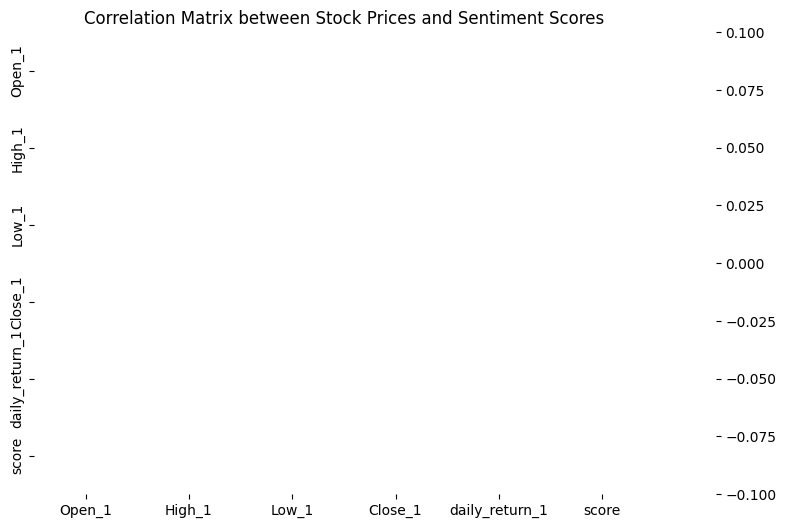

                Open_2  High_2  Low_2  Close_2  daily_return_2  score
Open_2             NaN     NaN    NaN      NaN             NaN    NaN
High_2             NaN     NaN    NaN      NaN             NaN    NaN
Low_2              NaN     NaN    NaN      NaN             NaN    NaN
Close_2            NaN     NaN    NaN      NaN             NaN    NaN
daily_return_2     NaN     NaN    NaN      NaN             NaN    NaN
score              NaN     NaN    NaN      NaN             NaN    NaN


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


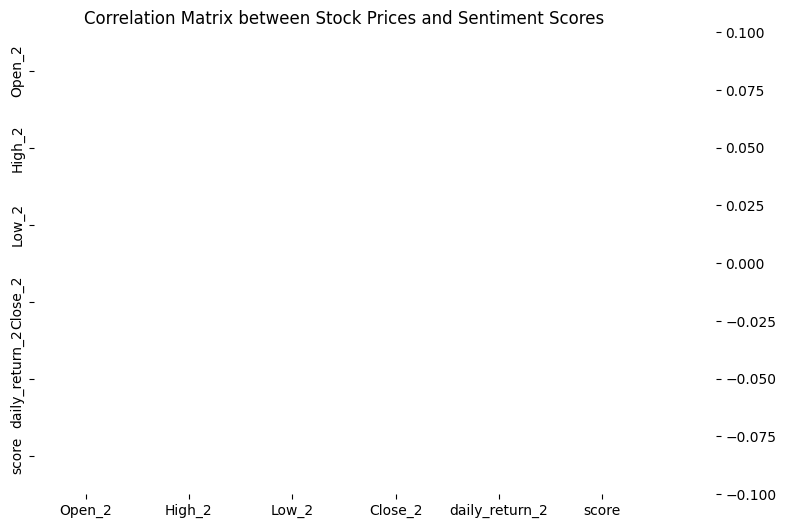

                Open_3  High_3  Low_3  Close_3  daily_return_3  score
Open_3             NaN     NaN    NaN      NaN             NaN    NaN
High_3             NaN     NaN    NaN      NaN             NaN    NaN
Low_3              NaN     NaN    NaN      NaN             NaN    NaN
Close_3            NaN     NaN    NaN      NaN             NaN    NaN
daily_return_3     NaN     NaN    NaN      NaN             NaN    NaN
score              NaN     NaN    NaN      NaN             NaN    NaN


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


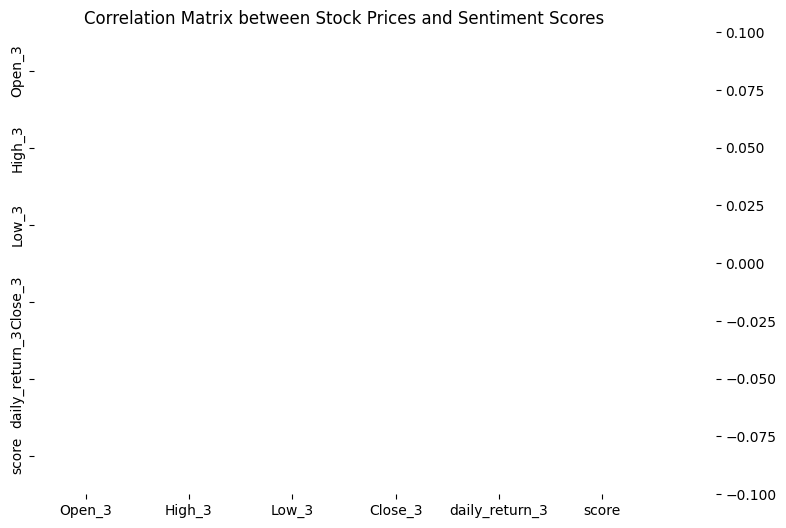

                Open_4  High_4  Low_4  Close_4  daily_return_4  score
Open_4             NaN     NaN    NaN      NaN             NaN    NaN
High_4             NaN     NaN    NaN      NaN             NaN    NaN
Low_4              NaN     NaN    NaN      NaN             NaN    NaN
Close_4            NaN     NaN    NaN      NaN             NaN    NaN
daily_return_4     NaN     NaN    NaN      NaN             NaN    NaN
score              NaN     NaN    NaN      NaN             NaN    NaN


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


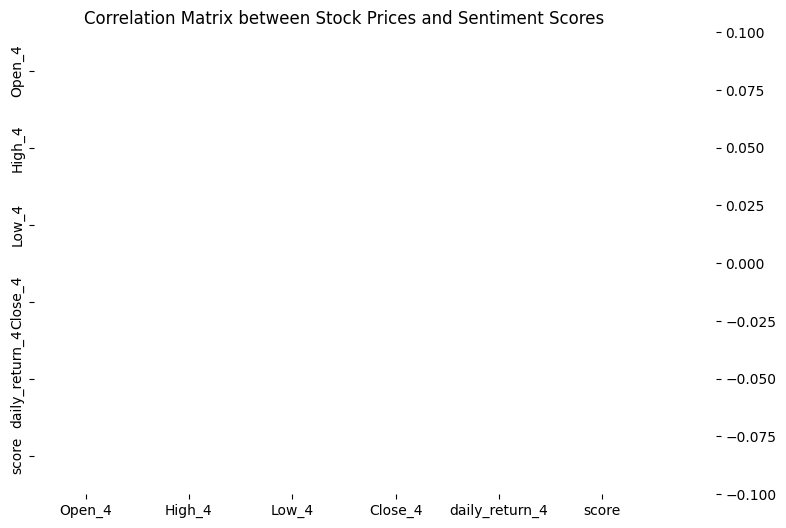

                Open_5  High_5  Low_5  Close_5  daily_return_5  score
Open_5             NaN     NaN    NaN      NaN             NaN    NaN
High_5             NaN     NaN    NaN      NaN             NaN    NaN
Low_5              NaN     NaN    NaN      NaN             NaN    NaN
Close_5            NaN     NaN    NaN      NaN             NaN    NaN
daily_return_5     NaN     NaN    NaN      NaN             NaN    NaN
score              NaN     NaN    NaN      NaN             NaN    NaN


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


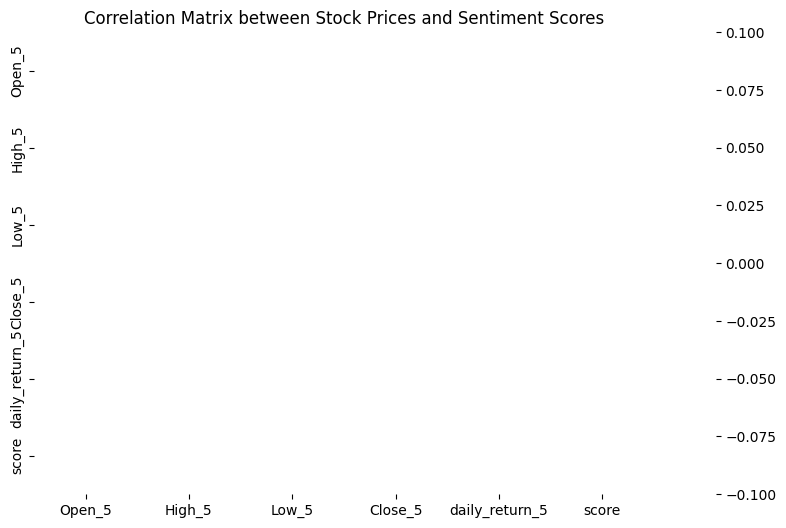

                Open_6  High_6  Low_6  Close_6  daily_return_6  score
Open_6             NaN     NaN    NaN      NaN             NaN    NaN
High_6             NaN     NaN    NaN      NaN             NaN    NaN
Low_6              NaN     NaN    NaN      NaN             NaN    NaN
Close_6            NaN     NaN    NaN      NaN             NaN    NaN
daily_return_6     NaN     NaN    NaN      NaN             NaN    NaN
score              NaN     NaN    NaN      NaN             NaN    NaN


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


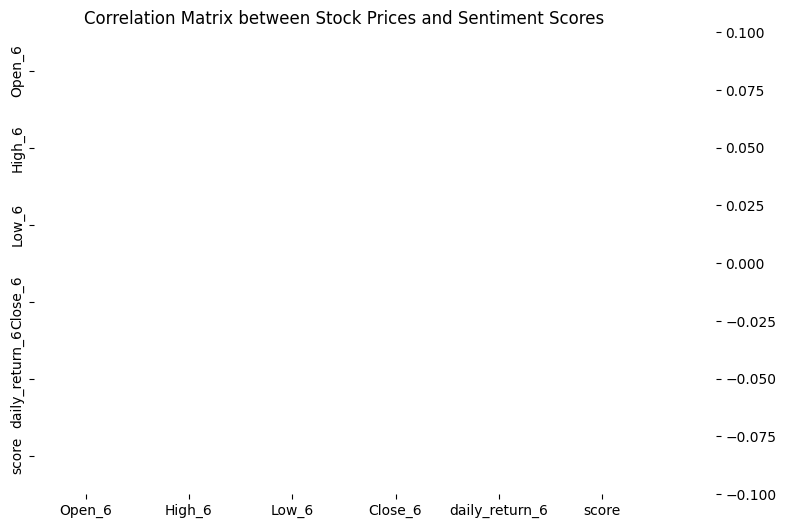

                Open_8  High_8  Low_8  Close_8  daily_return_8  score
Open_8             NaN     NaN    NaN      NaN             NaN    NaN
High_8             NaN     NaN    NaN      NaN             NaN    NaN
Low_8              NaN     NaN    NaN      NaN             NaN    NaN
Close_8            NaN     NaN    NaN      NaN             NaN    NaN
daily_return_8     NaN     NaN    NaN      NaN             NaN    NaN
score              NaN     NaN    NaN      NaN             NaN    NaN


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


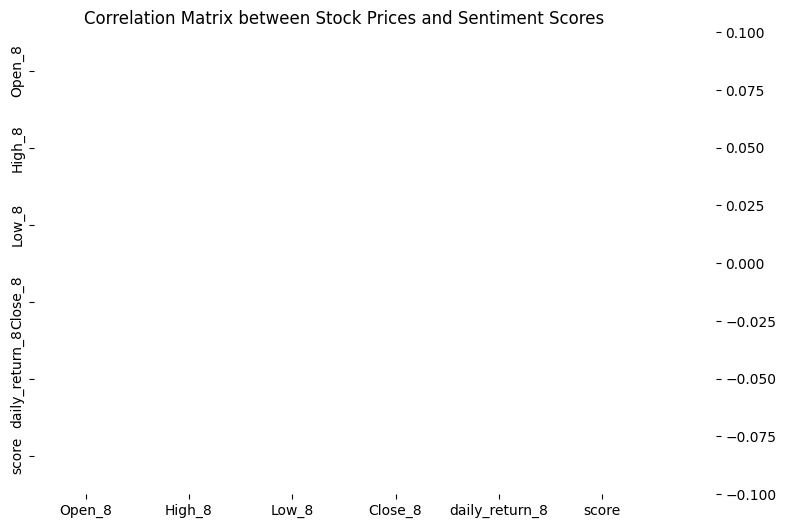

                Open_9  High_9  Low_9  Close_9  daily_return_9  score
Open_9             NaN     NaN    NaN      NaN             NaN    NaN
High_9             NaN     NaN    NaN      NaN             NaN    NaN
Low_9              NaN     NaN    NaN      NaN             NaN    NaN
Close_9            NaN     NaN    NaN      NaN             NaN    NaN
daily_return_9     NaN     NaN    NaN      NaN             NaN    NaN
score              NaN     NaN    NaN      NaN             NaN    NaN


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


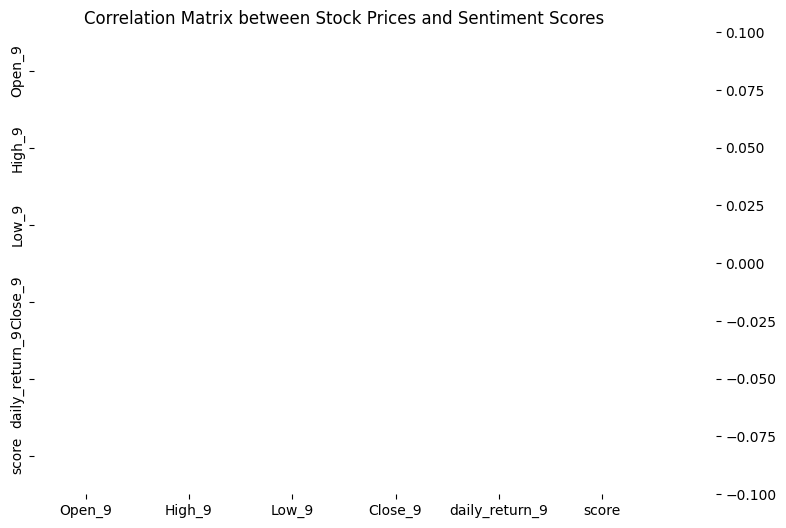

                 Open_10  High_10  Low_10  Close_10  daily_return_10  score
Open_10              NaN      NaN     NaN       NaN              NaN    NaN
High_10              NaN      NaN     NaN       NaN              NaN    NaN
Low_10               NaN      NaN     NaN       NaN              NaN    NaN
Close_10             NaN      NaN     NaN       NaN              NaN    NaN
daily_return_10      NaN      NaN     NaN       NaN              NaN    NaN
score                NaN      NaN     NaN       NaN              NaN    NaN


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


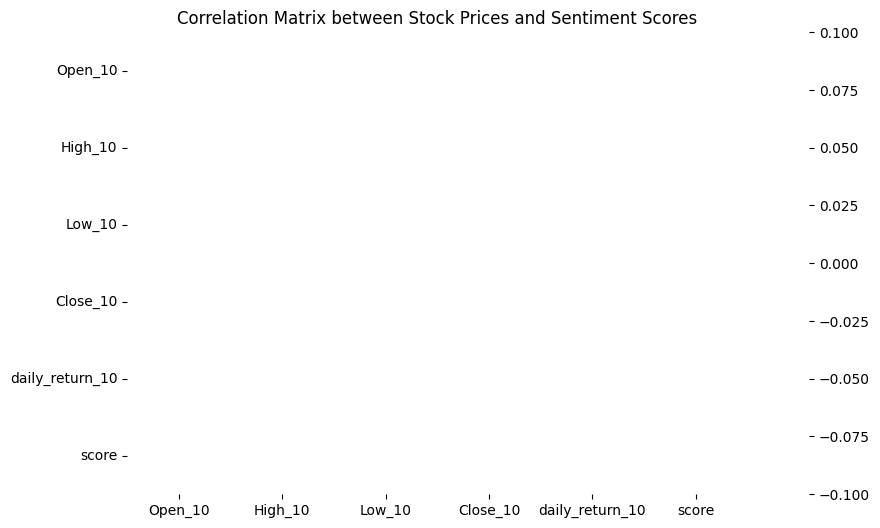

                 Open_11  High_11  Low_11  Close_11  daily_return_11  score
Open_11              NaN      NaN     NaN       NaN              NaN    NaN
High_11              NaN      NaN     NaN       NaN              NaN    NaN
Low_11               NaN      NaN     NaN       NaN              NaN    NaN
Close_11             NaN      NaN     NaN       NaN              NaN    NaN
daily_return_11      NaN      NaN     NaN       NaN              NaN    NaN
score                NaN      NaN     NaN       NaN              NaN    NaN


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


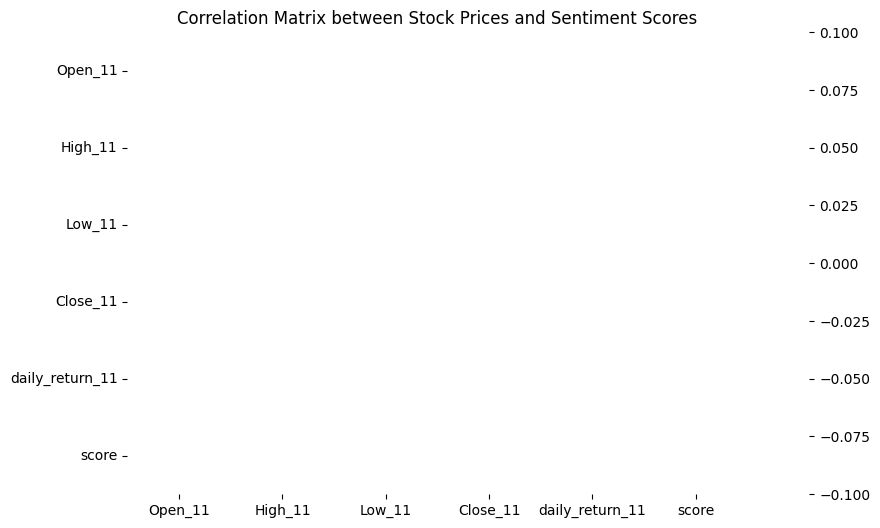

                 Open_12  High_12  Low_12  Close_12  daily_return_12  score
Open_12              NaN      NaN     NaN       NaN              NaN    NaN
High_12              NaN      NaN     NaN       NaN              NaN    NaN
Low_12               NaN      NaN     NaN       NaN              NaN    NaN
Close_12             NaN      NaN     NaN       NaN              NaN    NaN
daily_return_12      NaN      NaN     NaN       NaN              NaN    NaN
score                NaN      NaN     NaN       NaN              NaN    NaN


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


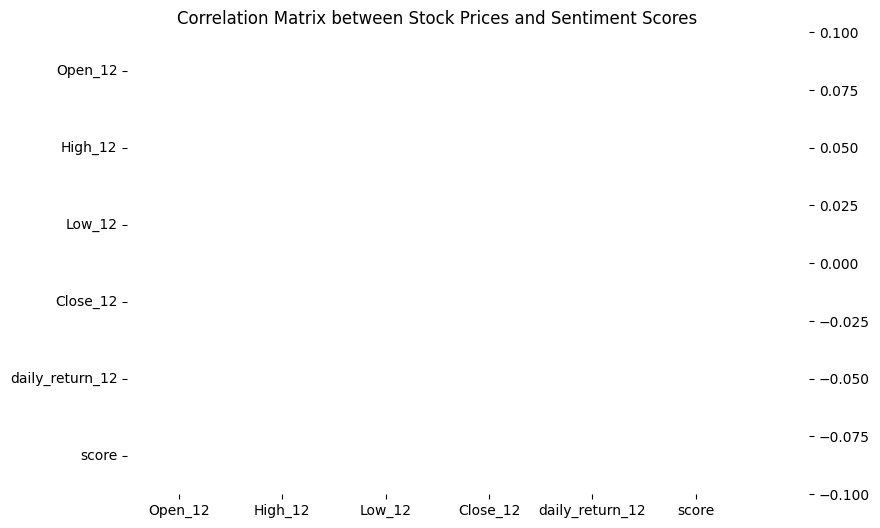

In [ ]:
df_para = pd.DataFrame(sentiment_scores_para)
df_para.insert(0, 'Date', posts_date_para)

df_para['score'] = df_para.apply(lambda row: row['score'] * -1 if row['label'] == 'NEGATIVE' else row['score'], axis=1)

df_para['Date'] = pd.to_datetime(df_para['Date'])  # Convert 'Date' column to datetime

# Display DataFrame
print(df_para)

# Assuming stock_data_1 to stock_data_13 are your stock data DataFrames
# Combine all stock data into a single DataFrame
#stock_data_all = pd.concat([stock_data_1, stock_data_2, stock_data_3, stock_data_4,
                           #stock_data_5, stock_data_6, stock_data_8, stock_data_9,
                           #stock_data_10, stock_data_11, stock_data_12, stock_data_13])

# Merge the sentiment data with the combined stock data
combined_data_para = pd.merge(df_para, stock_data_1, on=['Date'], how='inner')
combined_data_para = pd.merge(combined_data_para, stock_data_2, on=['Date'], how='inner')
combined_data_para = pd.merge(combined_data_para, stock_data_3, on=['Date'], how='inner')
combined_data_para = pd.merge(combined_data_para, stock_data_4, on=['Date'], how='inner')
combined_data_para = pd.merge(combined_data_para, stock_data_5, on=['Date'], how='inner')
combined_data_para = pd.merge(combined_data_para, stock_data_6, on=['Date'], how='inner')
combined_data_para = pd.merge(combined_data_para, stock_data_8, on=['Date'], how='inner')
combined_data_para = pd.merge(combined_data_para, stock_data_9, on=['Date'], how='inner')
combined_data_para = pd.merge(combined_data_para, stock_data_10, on=['Date'], how='inner')
combined_data_para = pd.merge(combined_data_para, stock_data_11, on=['Date'], how='inner')
combined_data_para = pd.merge(combined_data_para, stock_data_12, on=['Date'], how='inner')



print(combined_data_para)

# Calculate the correlation matrix
correlation_matrix_1 = combined_data_para[['Open_1', 'High_1', 'Low_1', 'Close_1', 'daily_return_1', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_1)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_2 = combined_data_para[['Open_2', 'High_2', 'Low_2', 'Close_2', 'daily_return_2', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_2)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_3 = combined_data_para[['Open_3', 'High_3', 'Low_3', 'Close_3', 'daily_return_3', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_3)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_3, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_4 = combined_data_para[['Open_4', 'High_4', 'Low_4', 'Close_4', 'daily_return_4', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_4)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_4, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_5 = combined_data_para[['Open_5', 'High_5', 'Low_5', 'Close_5', 'daily_return_5', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_5)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_5, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_6 = combined_data_para[['Open_6', 'High_6', 'Low_6', 'Close_6', 'daily_return_6', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_6)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_6, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_8 = combined_data_para[['Open_8', 'High_8', 'Low_8', 'Close_8', 'daily_return_8', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_8)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_8, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_9 = combined_data_para[['Open_9', 'High_9', 'Low_9', 'Close_9', 'daily_return_9', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_9)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_9, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_10 = combined_data_para[['Open_10', 'High_10', 'Low_10', 'Close_10', 'daily_return_10', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_10)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_10, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_11 = combined_data_para[['Open_11', 'High_11', 'Low_11', 'Close_11', 'daily_return_11', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_11)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_11, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_12 = combined_data_para[['Open_12', 'High_12', 'Low_12', 'Close_12', 'daily_return_12', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_12)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_12, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

         Date     label     score
0  2024-07-29  NEGATIVE -0.976252
1  2024-07-26  NEGATIVE -0.995426
2  2024-07-19  NEGATIVE -0.991452
3  2024-07-27  NEGATIVE -0.985780
4  2024-07-21  NEGATIVE -0.997813
..        ...       ...       ...
64 2024-07-25  NEGATIVE -0.996926
65 2024-07-26  NEGATIVE -0.998977
66 2024-07-29  NEGATIVE -0.999589
67 2024-07-19  NEGATIVE -0.993795
68 2024-07-20  NEGATIVE -0.999533

[69 rows x 3 columns]
        Date     label     score      Open_1      High_1       Low_1  \
0 2024-07-25  NEGATIVE -0.998803  258.390015  262.790009  250.220001   
1 2024-07-25  NEGATIVE -0.950240  258.390015  262.790009  250.220001   
2 2024-07-25  NEGATIVE -0.998449  258.390015  262.790009  250.220001   
3 2024-07-23  POSITIVE  0.870247  269.019989  277.000000  258.769989   
4 2024-07-24  POSITIVE  0.982129  270.000000  275.440002  257.359985   
5 2024-07-22  POSITIVE  0.876573  285.010010  285.010010  261.589996   
6 2024-07-19  NEGATIVE -0.993155  294.510010  316.750000  290.100

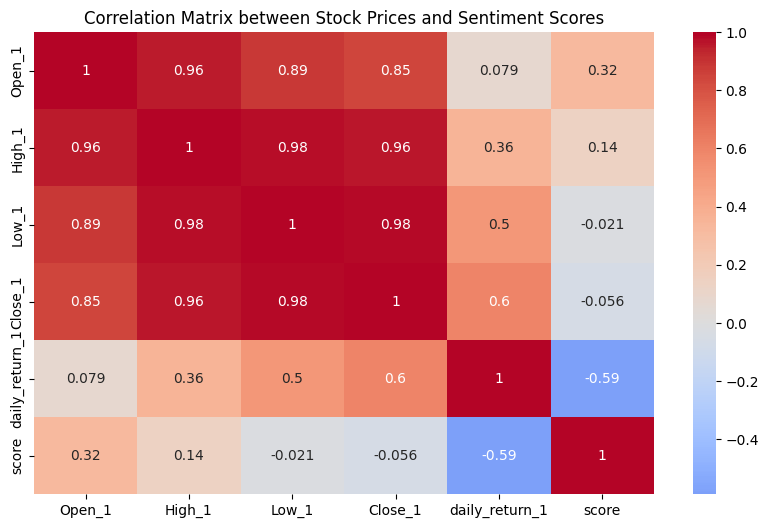

                  Open_2    High_2     Low_2   Close_2  daily_return_2  \
Open_2          1.000000  0.400649  0.857770  0.202278       -0.417968   
High_2          0.400649  1.000000  0.613125  0.915737        0.607223   
Low_2           0.857770  0.613125  1.000000  0.571845        0.010181   
Close_2         0.202278  0.915737  0.571845  1.000000        0.805127   
daily_return_2 -0.417968  0.607223  0.010181  0.805127        1.000000   
score           0.899391  0.318219  0.785153  0.222166       -0.339031   

                   score  
Open_2          0.899391  
High_2          0.318219  
Low_2           0.785153  
Close_2         0.222166  
daily_return_2 -0.339031  
score           1.000000  


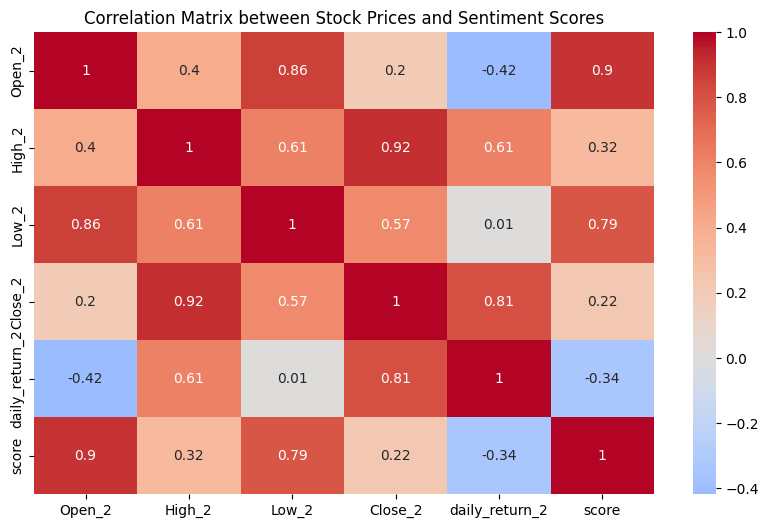

                  Open_3    High_3     Low_3   Close_3  daily_return_3  \
Open_3          1.000000  0.768232  0.960452  0.560209       -0.559273   
High_3          0.768232  1.000000  0.881169  0.930656        0.072010   
Low_3           0.960452  0.881169  1.000000  0.757557       -0.318249   
Close_3         0.560209  0.930656  0.757557  1.000000        0.373302   
daily_return_3 -0.559273  0.072010 -0.318249  0.373302        1.000000   
score           0.338039 -0.102357  0.214504 -0.247512       -0.628635   

                   score  
Open_3          0.338039  
High_3         -0.102357  
Low_3           0.214504  
Close_3        -0.247512  
daily_return_3 -0.628635  
score           1.000000  


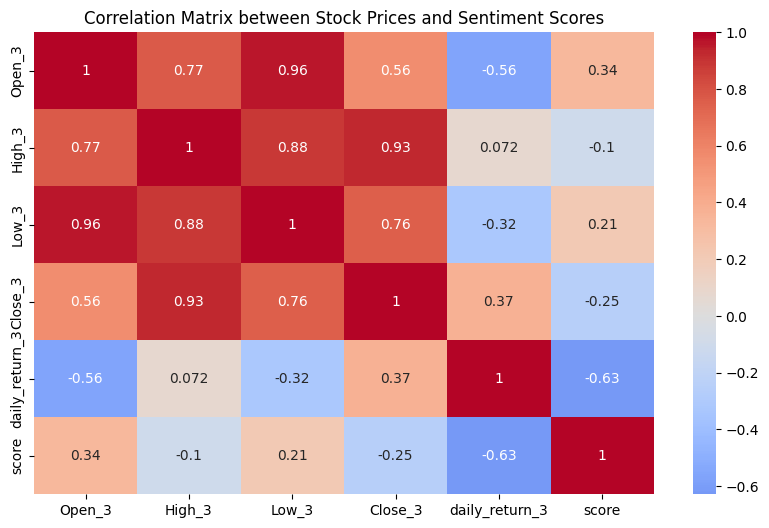

                  Open_4    High_4     Low_4   Close_4  daily_return_4  \
Open_4          1.000000 -0.813380  0.983425 -0.339112       -0.934858   
High_4         -0.813380  1.000000 -0.698105  0.702008        0.923227   
Low_4           0.983425 -0.698105  1.000000 -0.178690       -0.860635   
Close_4        -0.339112  0.702008 -0.178690  1.000000        0.650901   
daily_return_4 -0.934858  0.923227 -0.860635  0.650901        1.000000   
score           0.510085 -0.564444  0.464871 -0.392998       -0.563596   

                   score  
Open_4          0.510085  
High_4         -0.564444  
Low_4           0.464871  
Close_4        -0.392998  
daily_return_4 -0.563596  
score           1.000000  


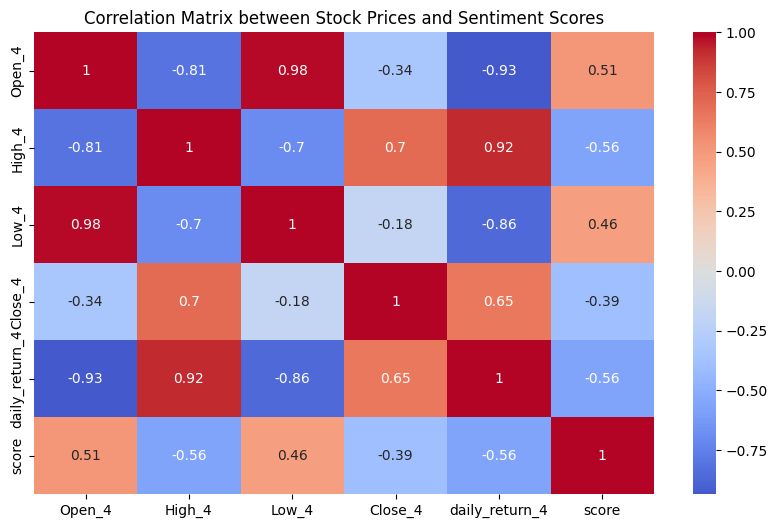

                  Open_5    High_5     Low_5   Close_5  daily_return_5  \
Open_5          1.000000  0.510028  0.679593  0.027029       -0.773326   
High_5          0.510028  1.000000  0.516082  0.688623        0.038791   
Low_5           0.679593  0.516082  1.000000  0.452211       -0.259182   
Close_5         0.027029  0.688623  0.452211  1.000000        0.612656   
daily_return_5 -0.773326  0.038791 -0.259182  0.612656        1.000000   
score           0.833837  0.833414  0.637166  0.286781       -0.475385   

                   score  
Open_5          0.833837  
High_5          0.833414  
Low_5           0.637166  
Close_5         0.286781  
daily_return_5 -0.475385  
score           1.000000  


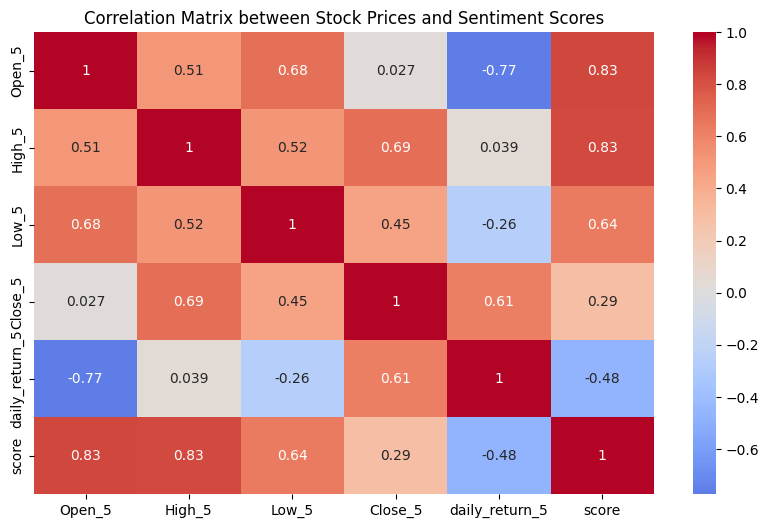

                  Open_6    High_6     Low_6   Close_6  daily_return_6  \
Open_6          1.000000  0.968469  0.902457  0.763343       -0.673280   
High_6          0.968469  1.000000  0.948811  0.862379       -0.511004   
Low_6           0.902457  0.948811  1.000000  0.965749       -0.290725   
Close_6         0.763343  0.862379  0.965749  1.000000       -0.036336   
daily_return_6 -0.673280 -0.511004 -0.290725 -0.036336        1.000000   
score           0.548460  0.440404  0.245785  0.047825       -0.794399   

                   score  
Open_6          0.548460  
High_6          0.440404  
Low_6           0.245785  
Close_6         0.047825  
daily_return_6 -0.794399  
score           1.000000  


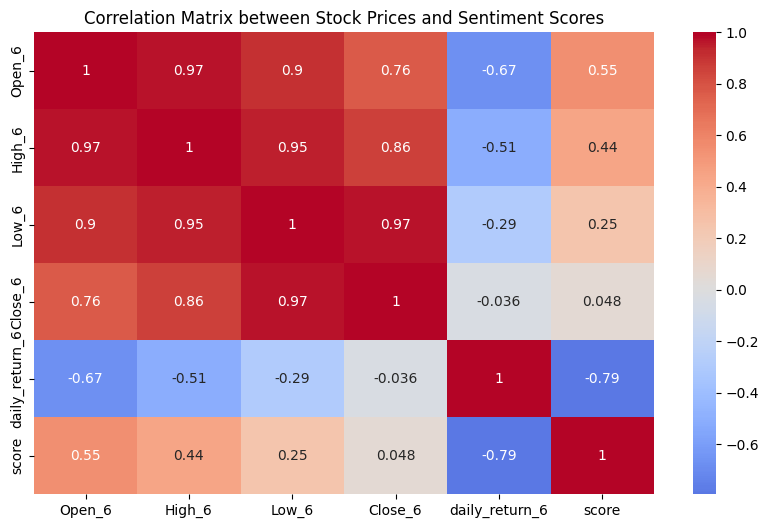

                  Open_8    High_8     Low_8   Close_8  daily_return_8  \
Open_8          1.000000  0.836666  0.939128  0.615863       -0.218944   
High_8          0.836666  1.000000  0.941892  0.862712        0.247171   
Low_8           0.939128  0.941892  1.000000  0.758801        0.016974   
Close_8         0.615863  0.862712  0.758801  1.000000        0.633889   
daily_return_8 -0.218944  0.247171  0.016974  0.633889        1.000000   
score          -0.024226  0.290319  0.202981  0.653408        0.831246   

                   score  
Open_8         -0.024226  
High_8          0.290319  
Low_8           0.202981  
Close_8         0.653408  
daily_return_8  0.831246  
score           1.000000  


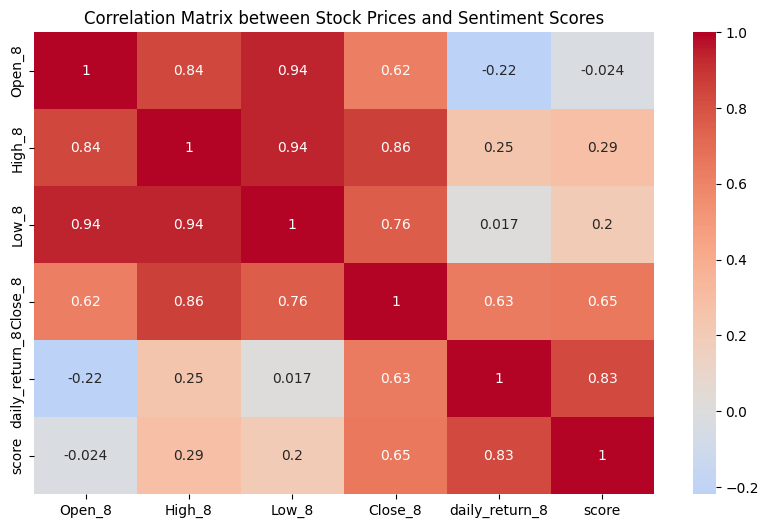

                  Open_9    High_9     Low_9   Close_9  daily_return_9  \
Open_9          1.000000  0.977166  0.886030  0.045553       -0.863286   
High_9          0.977166  1.000000  0.799626 -0.002164       -0.866180   
Low_9           0.886030  0.799626  1.000000  0.357683       -0.606196   
Close_9         0.045553 -0.002164  0.357683  1.000000        0.464840   
daily_return_9 -0.863286 -0.866180 -0.606196  0.464840        1.000000   
score           0.346781  0.152371  0.490741  0.074850       -0.273182   

                   score  
Open_9          0.346781  
High_9          0.152371  
Low_9           0.490741  
Close_9         0.074850  
daily_return_9 -0.273182  
score           1.000000  


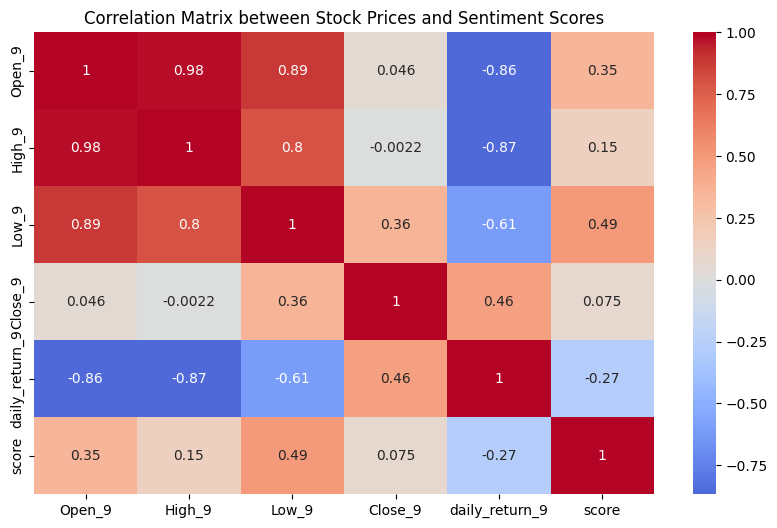

                  Open_10   High_10    Low_10  Close_10  daily_return_10  \
Open_10          1.000000  0.344454  0.529910  0.288090        -0.203589   
High_10          0.344454  1.000000  0.729961  0.871229         0.717343   
Low_10           0.529910  0.729961  1.000000  0.879763         0.636821   
Close_10         0.288090  0.871229  0.879763  1.000000         0.878880   
daily_return_10 -0.203589  0.717343  0.636821  0.878880         1.000000   
score            0.609744  0.660519  0.643627  0.444886         0.151647   

                    score  
Open_10          0.609744  
High_10          0.660519  
Low_10           0.643627  
Close_10         0.444886  
daily_return_10  0.151647  
score            1.000000  


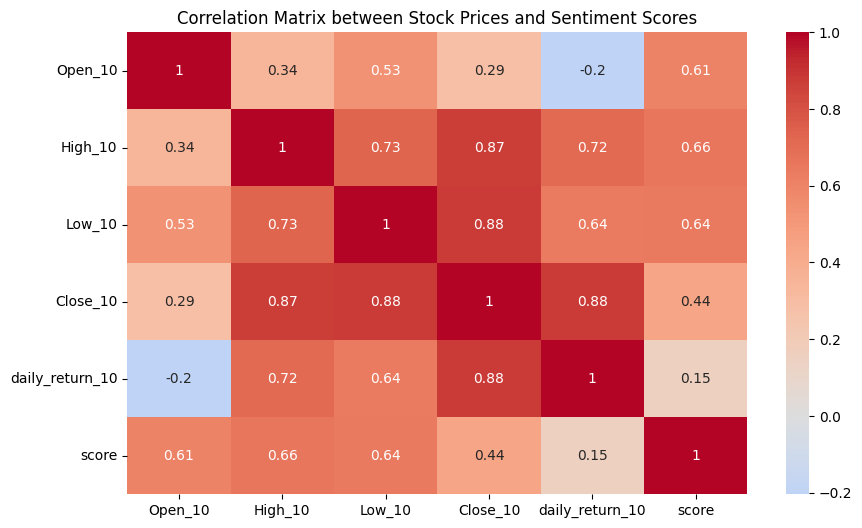

                  Open_11   High_11    Low_11  Close_11  daily_return_11  \
Open_11          1.000000  0.945368  0.902744  0.865051         0.505464   
High_11          0.945368  1.000000  0.964508  0.953452         0.711967   
Low_11           0.902744  0.964508  1.000000  0.993158         0.820712   
Close_11         0.865051  0.953452  0.993158  1.000000         0.870092   
daily_return_11  0.505464  0.711967  0.820712  0.870092         1.000000   
score            0.954226  0.827940  0.742676  0.690614         0.249989   

                    score  
Open_11          0.954226  
High_11          0.827940  
Low_11           0.742676  
Close_11         0.690614  
daily_return_11  0.249989  
score            1.000000  


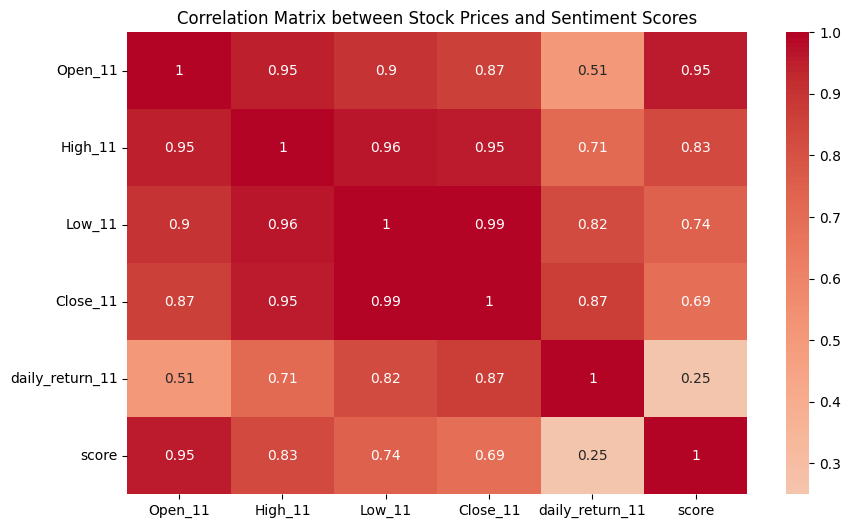

                  Open_12   High_12    Low_12  Close_12  daily_return_12  \
Open_12          1.000000  0.918781  0.917829  0.922748        -0.862534   
High_12          0.918781  1.000000  0.825082  0.777380        -0.885622   
Low_12           0.917829  0.825082  1.000000  0.976331        -0.621088   
Close_12         0.922748  0.777380  0.976331  1.000000        -0.600901   
daily_return_12 -0.862534 -0.885622 -0.621088 -0.600901         1.000000   
score            0.120613  0.238908  0.152624  0.201423         0.009292   

                    score  
Open_12          0.120613  
High_12          0.238908  
Low_12           0.152624  
Close_12         0.201423  
daily_return_12  0.009292  
score            1.000000  


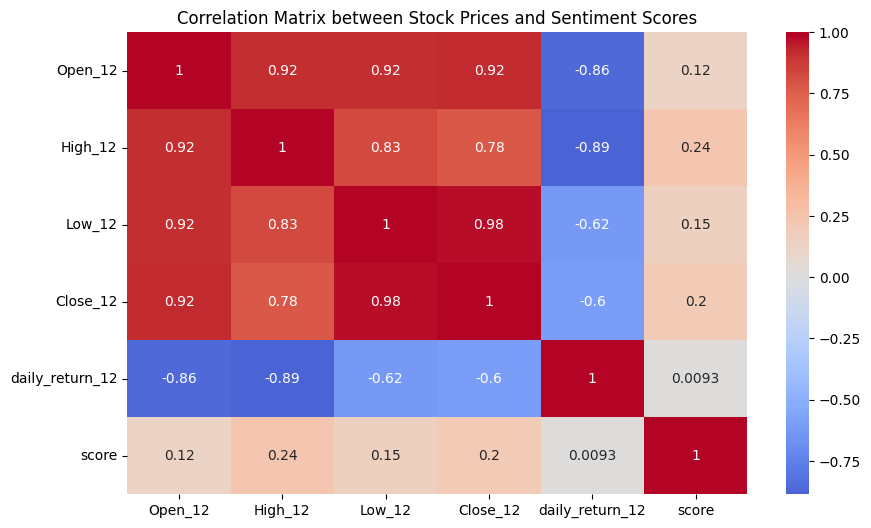

                  Open_13   High_13    Low_13  Close_13  daily_return_13  \
Open_13          1.000000  0.958496  0.877415  0.919166         0.589249   
High_13          0.958496  1.000000  0.967612  0.981150         0.769378   
Low_13           0.877415  0.967612  1.000000  0.982231         0.877346   
Close_13         0.919166  0.981150  0.982231  1.000000         0.859833   
daily_return_13  0.589249  0.769378  0.877346  0.859833         1.000000   
score            0.340678  0.332610  0.344268  0.448052         0.481054   

                    score  
Open_13          0.340678  
High_13          0.332610  
Low_13           0.344268  
Close_13         0.448052  
daily_return_13  0.481054  
score            1.000000  


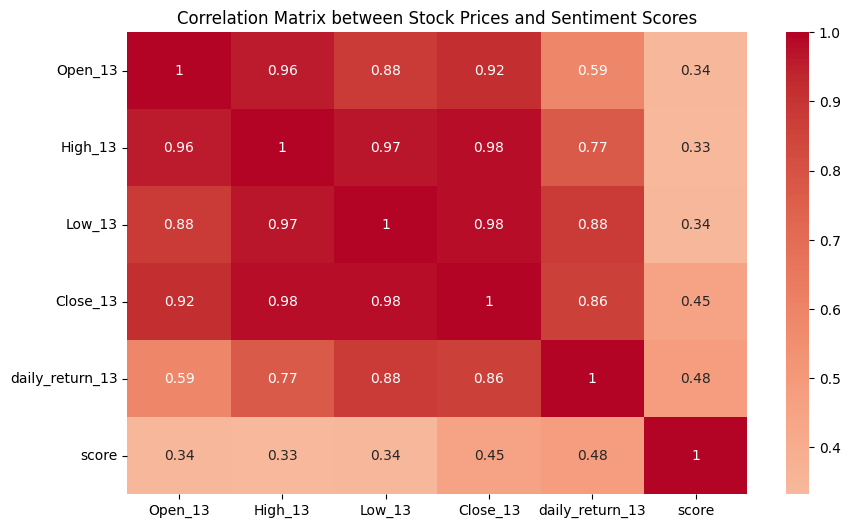

In [ ]:
df_amzn = pd.DataFrame(sentiment_scores_amzn)
df_amzn.insert(0, 'Date', posts_date_amzn)

df_amzn['score'] = df_amzn.apply(lambda row: row['score'] * -1 if row['label'] == 'NEGATIVE' else row['score'], axis=1)

df_amzn['Date'] = pd.to_datetime(df_amzn['Date'])  # Convert 'Date' column to datetime

# Display DataFrame
print(df_delta)

# Assuming stock_data_1 to stock_data_13 are your stock data DataFrames
# Combine all stock data into a single DataFrame
#stock_data_all = pd.concat([stock_data_1, stock_data_2, stock_data_3, stock_data_4,
                           #stock_data_5, stock_data_6, stock_data_8, stock_data_9,
                           #stock_data_10, stock_data_11, stock_data_12, stock_data_13])

# Merge the sentiment data with the combined stock data
combined_data_amzn = pd.merge(df_amzn, stock_data_1, on=['Date'], how='inner')
combined_data_amzn = pd.merge(combined_data_amzn, stock_data_2, on=['Date'], how='inner')
combined_data_amzn = pd.merge(combined_data_amzn, stock_data_3, on=['Date'], how='inner')
combined_data_amzn = pd.merge(combined_data_amzn, stock_data_4, on=['Date'], how='inner')
combined_data_amzn = pd.merge(combined_data_amzn, stock_data_5, on=['Date'], how='inner')
combined_data_amzn = pd.merge(combined_data_amzn, stock_data_6, on=['Date'], how='inner')
combined_data_amzn = pd.merge(combined_data_amzn, stock_data_8, on=['Date'], how='inner')
combined_data_amzn = pd.merge(combined_data_amzn, stock_data_9, on=['Date'], how='inner')
combined_data_amzn = pd.merge(combined_data_amzn, stock_data_10, on=['Date'], how='inner')
combined_data_amzn = pd.merge(combined_data_amzn, stock_data_11, on=['Date'], how='inner')
combined_data_amzn = pd.merge(combined_data_amzn, stock_data_12, on=['Date'], how='inner')
combined_data_amzn = pd.merge(combined_data_amzn, stock_data_13, on=['Date'], how='inner')



print(combined_data_amzn)

# Calculate the correlation matrix
correlation_matrix_1 = combined_data_amzn[['Open_1', 'High_1', 'Low_1', 'Close_1', 'daily_return_1', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_1)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_2 = combined_data_amzn[['Open_2', 'High_2', 'Low_2', 'Close_2', 'daily_return_2', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_2)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_3 = combined_data_amzn[['Open_3', 'High_3', 'Low_3', 'Close_3', 'daily_return_3', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_3)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_3, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_4 = combined_data_amzn[['Open_4', 'High_4', 'Low_4', 'Close_4', 'daily_return_4', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_4)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_4, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_5 = combined_data_amzn[['Open_5', 'High_5', 'Low_5', 'Close_5', 'daily_return_5', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_5)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_5, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_6 = combined_data_amzn[['Open_6', 'High_6', 'Low_6', 'Close_6', 'daily_return_6', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_6)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_6, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_8 = combined_data_amzn[['Open_8', 'High_8', 'Low_8', 'Close_8', 'daily_return_8', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_8)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_8, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_9 = combined_data_amzn[['Open_9', 'High_9', 'Low_9', 'Close_9', 'daily_return_9', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_9)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_9, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_10 = combined_data_amzn[['Open_10', 'High_10', 'Low_10', 'Close_10', 'daily_return_10', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_10)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_10, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_11 = combined_data_amzn[['Open_11', 'High_11', 'Low_11', 'Close_11', 'daily_return_11', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_11)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_11, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_12 = combined_data_amzn[['Open_12', 'High_12', 'Low_12', 'Close_12', 'daily_return_12', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_12)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_12, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_13 = combined_data_amzn[['Open_13', 'High_13', 'Low_13', 'Close_13', 'daily_return_13', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_13)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_13, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

         Date     label     score
0  2024-07-24  NEGATIVE -0.999055
1  2024-07-21  NEGATIVE -0.999717
2  2024-07-25  NEGATIVE -0.998097
3  2024-07-19  POSITIVE  0.994231
4  2024-07-20  NEGATIVE -0.999139
5  2024-07-20  NEGATIVE -0.998185
6  2024-07-19  NEGATIVE -0.999358
7  2024-07-19  POSITIVE  0.993892
8  2024-07-19  NEGATIVE -0.999542
9  2024-07-19  NEGATIVE -0.999316
10 2024-07-20  NEGATIVE -0.999270
11 2024-07-20  POSITIVE  0.692464
12 2024-07-20  NEGATIVE -0.992665
13 2024-07-19  NEGATIVE -0.999693
14 2024-07-19  POSITIVE  0.999535
15 2024-07-20  NEGATIVE -0.999601
16 2024-07-19  NEGATIVE -0.998623
17 2024-07-22  NEGATIVE -0.970279
18 2024-07-25  POSITIVE  0.999098
19 2024-07-20  NEGATIVE -0.998528
20 2024-07-26  POSITIVE  0.973470
21 2024-07-25  NEGATIVE -0.950240
22 2024-07-26  POSITIVE  0.994013
23 2024-07-19  NEGATIVE -0.997714
24 2024-07-28  NEGATIVE -0.998663
25 2024-07-25  NEGATIVE -0.963827
26 2024-07-23  NEGATIVE -0.968180
27 2024-07-29  NEGATIVE -0.999589
28 2024-07-19 

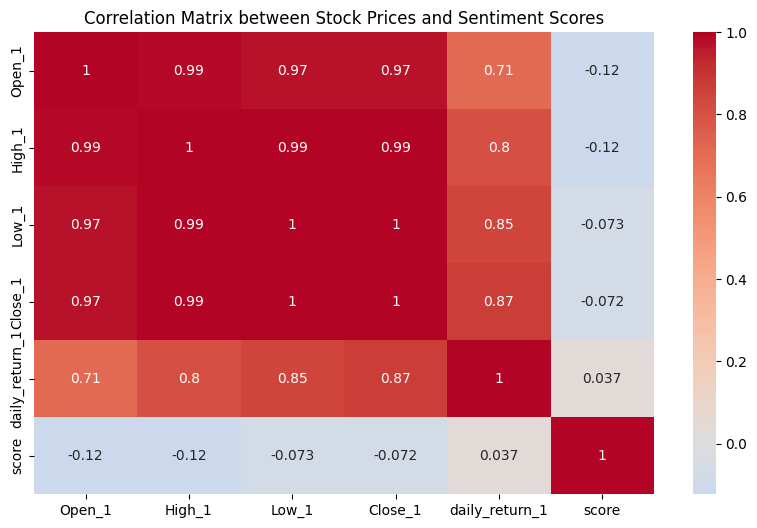

                  Open_2    High_2     Low_2   Close_2  daily_return_2  \
Open_2          1.000000  0.014086  0.753452 -0.122141       -0.473771   
High_2          0.014086  1.000000  0.381834  0.963914        0.850125   
Low_2           0.753452  0.381834  1.000000  0.375087        0.057432   
Close_2        -0.122141  0.963914  0.375087  1.000000        0.931918   
daily_return_2 -0.473771  0.850125  0.057432  0.931918        1.000000   
score          -0.384652 -0.189066 -0.228801 -0.091078        0.060234   

                   score  
Open_2         -0.384652  
High_2         -0.189066  
Low_2          -0.228801  
Close_2        -0.091078  
daily_return_2  0.060234  
score           1.000000  


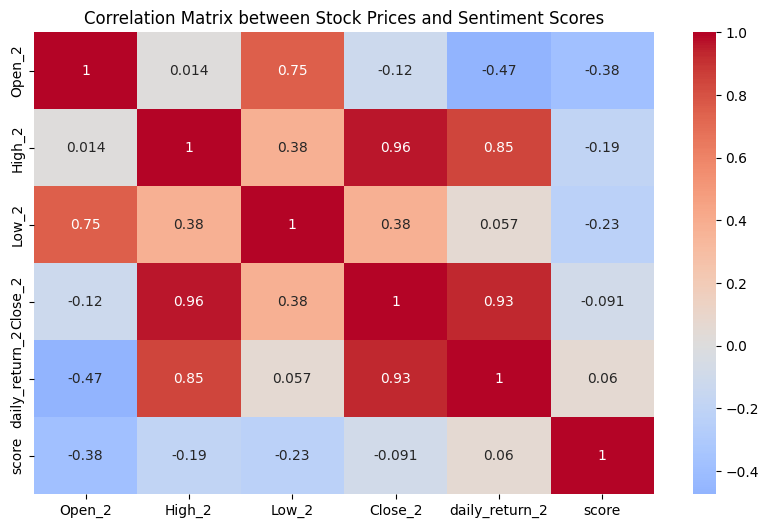

                  Open_3    High_3     Low_3   Close_3  daily_return_3  \
Open_3          1.000000  0.858460  0.972987  0.798651       -0.015064   
High_3          0.858460  1.000000  0.934268  0.972731        0.464673   
Low_3           0.972987  0.934268  1.000000  0.911841        0.208897   
Close_3         0.798651  0.972731  0.911841  1.000000        0.589669   
daily_return_3 -0.015064  0.464673  0.208897  0.589669        1.000000   
score           0.054106 -0.018305  0.049187  0.036336       -0.012227   

                   score  
Open_3          0.054106  
High_3         -0.018305  
Low_3           0.049187  
Close_3         0.036336  
daily_return_3 -0.012227  
score           1.000000  


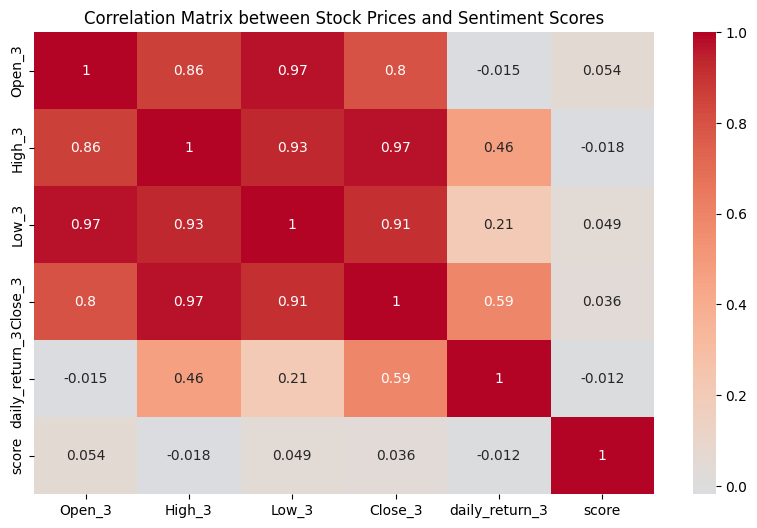

                  Open_4    High_4     Low_4   Close_4  daily_return_4  \
Open_4          1.000000 -0.836171  0.949313 -0.126589       -0.952819   
High_4         -0.836171  1.000000 -0.835151  0.392773        0.886411   
Low_4           0.949313 -0.835151  1.000000 -0.103108       -0.900204   
Close_4        -0.126589  0.392773 -0.103108  1.000000        0.421610   
daily_return_4 -0.952819  0.886411 -0.900204  0.421610        1.000000   
score           0.150974  0.026762  0.015783  0.129314       -0.096631   

                   score  
Open_4          0.150974  
High_4          0.026762  
Low_4           0.015783  
Close_4         0.129314  
daily_return_4 -0.096631  
score           1.000000  


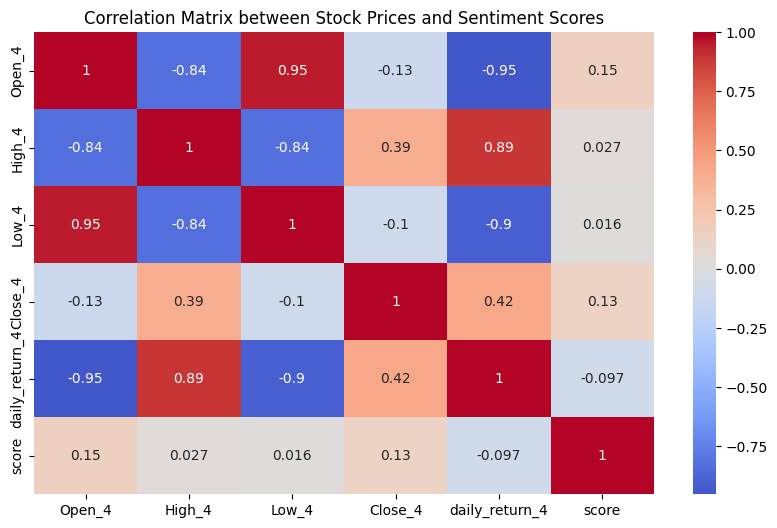

                  Open_5    High_5     Low_5   Close_5  daily_return_5  \
Open_5          1.000000  0.063223  0.845190 -0.176091       -0.837599   
High_5          0.063223  1.000000  0.065237  0.727036        0.361895   
Low_5           0.845190  0.065237  1.000000 -0.071186       -0.672407   
Close_5        -0.176091  0.727036 -0.071186  1.000000        0.685006   
daily_return_5 -0.837599  0.361895 -0.672407  0.685006        1.000000   
score           0.046963 -0.353979 -0.013764 -0.056171       -0.067681   

                   score  
Open_5          0.046963  
High_5         -0.353979  
Low_5          -0.013764  
Close_5        -0.056171  
daily_return_5 -0.067681  
score           1.000000  


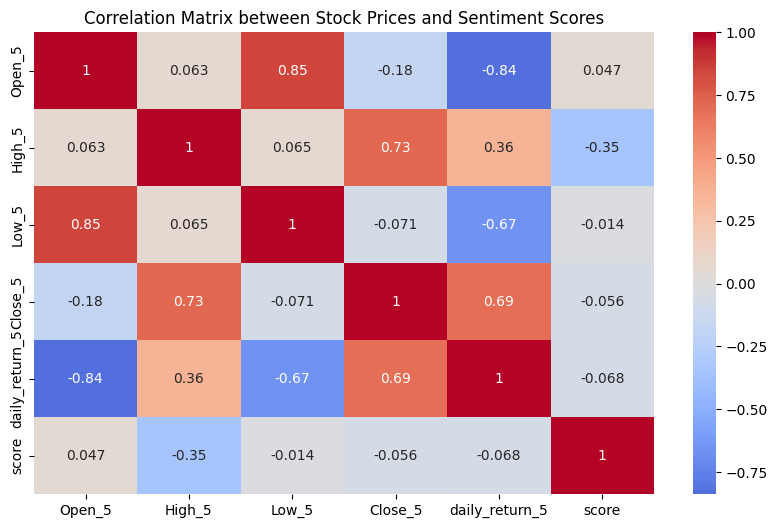

                  Open_6    High_6     Low_6   Close_6  daily_return_6  \
Open_6          1.000000  0.983182  0.948621  0.853855       -0.781501   
High_6          0.983182  1.000000  0.967833  0.905712       -0.688722   
Low_6           0.948621  0.967833  1.000000  0.972908       -0.546114   
Close_6         0.853855  0.905712  0.972908  1.000000       -0.342564   
daily_return_6 -0.781501 -0.688722 -0.546114 -0.342564        1.000000   
score          -0.119514 -0.083259 -0.004331  0.090587        0.323642   

                   score  
Open_6         -0.119514  
High_6         -0.083259  
Low_6          -0.004331  
Close_6         0.090587  
daily_return_6  0.323642  
score           1.000000  


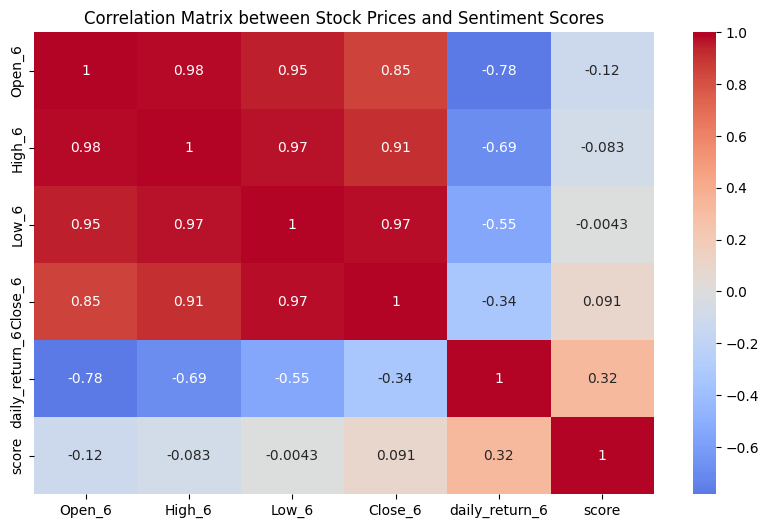

                  Open_8    High_8     Low_8   Close_8  daily_return_8  \
Open_8          1.000000  0.715880  0.775926  0.518354       -0.269910   
High_8          0.715880  1.000000  0.733323  0.699051        0.177999   
Low_8           0.775926  0.733323  1.000000  0.847613        0.290384   
Close_8         0.518354  0.699051  0.847613  1.000000        0.683504   
daily_return_8 -0.269910  0.177999  0.290384  0.683504        1.000000   
score          -0.044670 -0.139400 -0.355926 -0.422936       -0.436805   

                   score  
Open_8         -0.044670  
High_8         -0.139400  
Low_8          -0.355926  
Close_8        -0.422936  
daily_return_8 -0.436805  
score           1.000000  


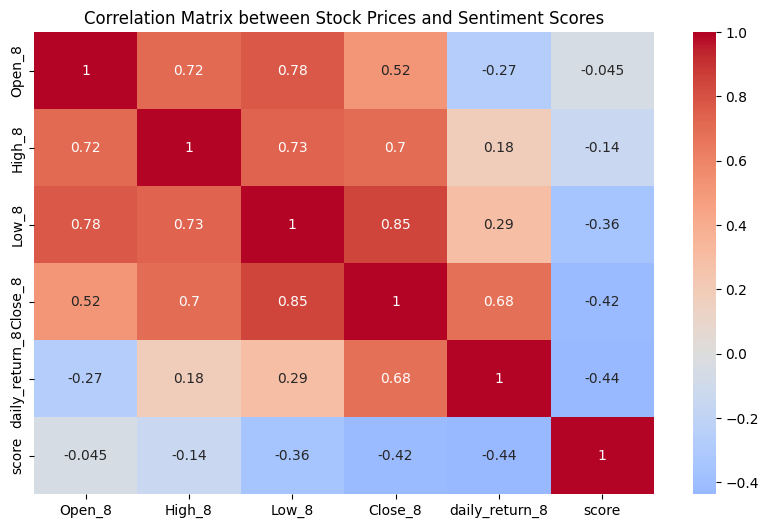

                  Open_9    High_9     Low_9   Close_9  daily_return_9  \
Open_9          1.000000  0.981404  0.875544  0.091071       -0.876666   
High_9          0.981404  1.000000  0.819366  0.084053       -0.862311   
Low_9           0.875544  0.819366  1.000000  0.359601       -0.634254   
Close_9         0.091071  0.084053  0.359601  1.000000        0.399233   
daily_return_9 -0.876666 -0.862311 -0.634254  0.399233        1.000000   
score           0.133786  0.208544  0.116581  0.207879       -0.022228   

                   score  
Open_9          0.133786  
High_9          0.208544  
Low_9           0.116581  
Close_9         0.207879  
daily_return_9 -0.022228  
score           1.000000  


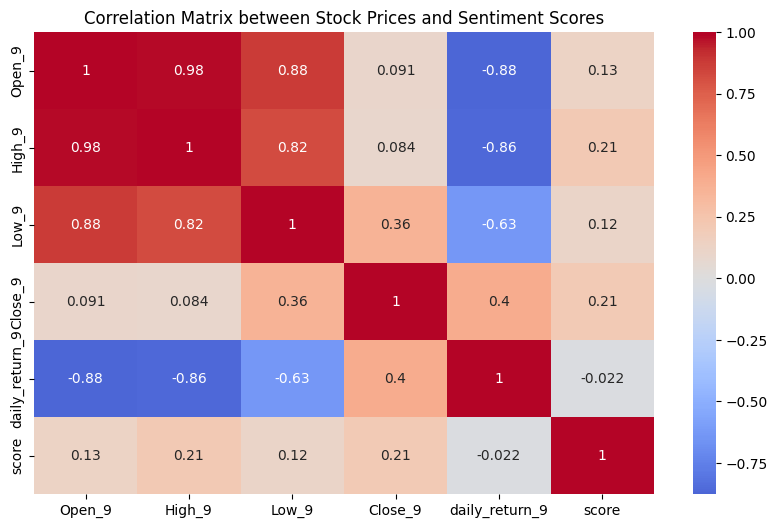

                  Open_10   High_10    Low_10  Close_10  daily_return_10  \
Open_10          1.000000  0.423834  0.238866 -0.019284        -0.618314   
High_10          0.423834  1.000000  0.675049  0.768895         0.347474   
Low_10           0.238866  0.675049  1.000000  0.883657         0.551656   
Close_10        -0.019284  0.768895  0.883657  1.000000         0.797698   
daily_return_10 -0.618314  0.347474  0.551656  0.797698         1.000000   
score           -0.289034 -0.304714 -0.012913 -0.026411         0.153994   

                    score  
Open_10         -0.289034  
High_10         -0.304714  
Low_10          -0.012913  
Close_10        -0.026411  
daily_return_10  0.153994  
score            1.000000  


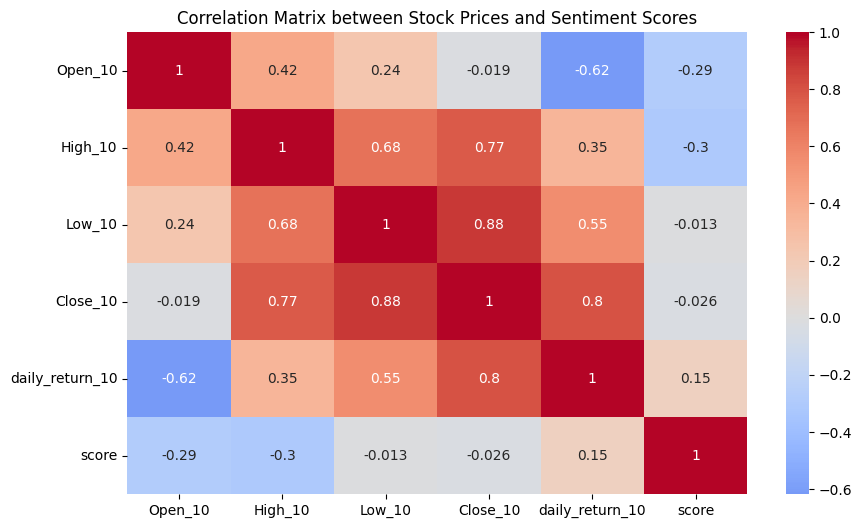

                  Open_11   High_11    Low_11  Close_11  daily_return_11  \
Open_11          1.000000  0.835135  0.829343  0.673164        -0.041598   
High_11          0.835135  1.000000  0.978214  0.949006         0.488219   
Low_11           0.829343  0.978214  1.000000  0.968185         0.518756   
Close_11         0.673164  0.949006  0.968185  1.000000         0.710795   
daily_return_11 -0.041598  0.488219  0.518756  0.710795         1.000000   
score           -0.462254 -0.308513 -0.279219 -0.172577         0.208107   

                    score  
Open_11         -0.462254  
High_11         -0.308513  
Low_11          -0.279219  
Close_11        -0.172577  
daily_return_11  0.208107  
score            1.000000  


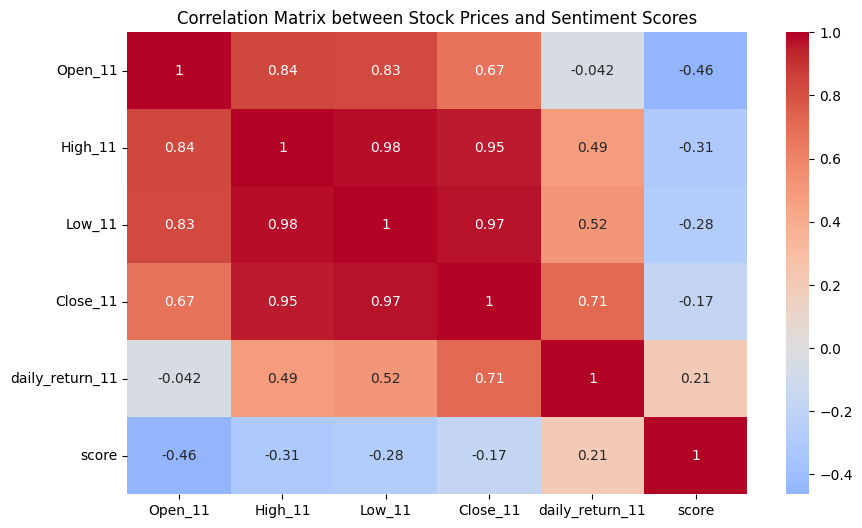

                  Open_12   High_12    Low_12  Close_12  daily_return_12  \
Open_12          1.000000  0.741351  0.853778  0.359753        -0.694050   
High_12          0.741351  1.000000  0.712668  0.768448        -0.127131   
Low_12           0.853778  0.712668  1.000000  0.557676        -0.399112   
Close_12         0.359753  0.768448  0.557676  1.000000         0.422035   
daily_return_12 -0.694050 -0.127131 -0.399112  0.422035         1.000000   
score           -0.023453  0.282092  0.048243  0.402461         0.334014   

                    score  
Open_12         -0.023453  
High_12          0.282092  
Low_12           0.048243  
Close_12         0.402461  
daily_return_12  0.334014  
score            1.000000  


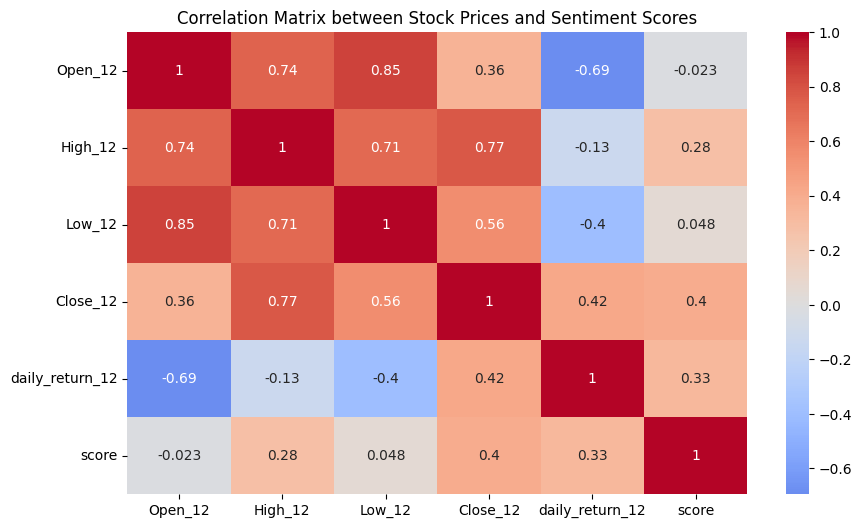

                  Open_13   High_13    Low_13  Close_13  daily_return_13  \
Open_13          1.000000  0.984350  0.950589  0.940327         0.504151   
High_13          0.984350  1.000000  0.986055  0.980298         0.634668   
Low_13           0.950589  0.986055  1.000000  0.991689         0.727371   
Close_13         0.940327  0.980298  0.991689  1.000000         0.767924   
daily_return_13  0.504151  0.634668  0.727371  0.767924         1.000000   
score           -0.245591 -0.205006 -0.206236 -0.180106         0.004662   

                    score  
Open_13         -0.245591  
High_13         -0.205006  
Low_13          -0.206236  
Close_13        -0.180106  
daily_return_13  0.004662  
score            1.000000  


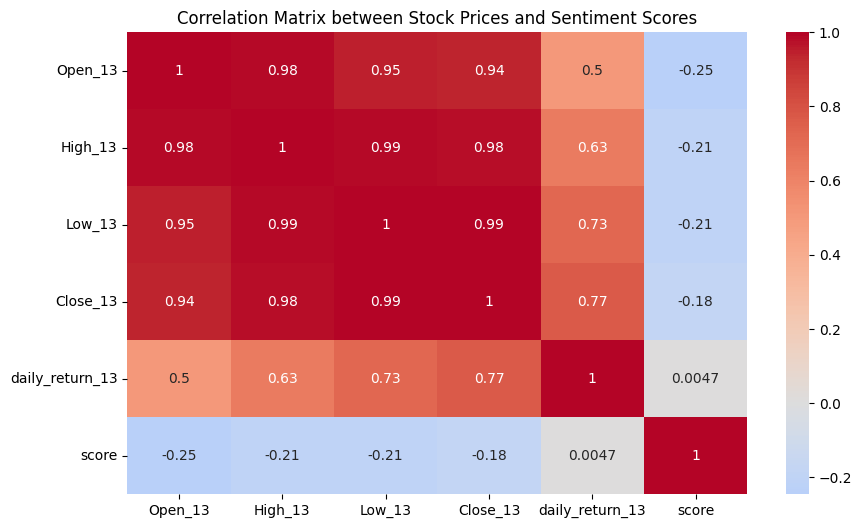

In [ ]:
df_msft = pd.DataFrame(sentiment_scores_msft)
df_msft.insert(0, 'Date', posts_date_msft)

df_msft['score'] = df_msft.apply(lambda row: row['score'] * -1 if row['label'] == 'NEGATIVE' else row['score'], axis=1)

df_msft['Date'] = pd.to_datetime(df_msft['Date'])  # Convert 'Date' column to datetime

# Display DataFrame
print(df_msft)

# Assuming stock_data_1 to stock_data_13 are your stock data DataFrames
# Combine all stock data into a single DataFrame
#stock_data_all = pd.concat([stock_data_1, stock_data_2, stock_data_3, stock_data_4,
                           #stock_data_5, stock_data_6, stock_data_8, stock_data_9,
                           #stock_data_10, stock_data_11, stock_data_12, stock_data_13])

# Merge the sentiment data with the combined stock data
combined_data_msft = pd.merge(df_msft, stock_data_1, on=['Date'], how='inner')
combined_data_msft = pd.merge(combined_data_msft, stock_data_2, on=['Date'], how='inner')
combined_data_msft = pd.merge(combined_data_msft, stock_data_3, on=['Date'], how='inner')
combined_data_msft = pd.merge(combined_data_msft, stock_data_4, on=['Date'], how='inner')
combined_data_msft = pd.merge(combined_data_msft, stock_data_5, on=['Date'], how='inner')
combined_data_msft = pd.merge(combined_data_msft, stock_data_6, on=['Date'], how='inner')
combined_data_msft = pd.merge(combined_data_msft, stock_data_8, on=['Date'], how='inner')
combined_data_msft = pd.merge(combined_data_msft, stock_data_9, on=['Date'], how='inner')
combined_data_msft = pd.merge(combined_data_msft, stock_data_10, on=['Date'], how='inner')
combined_data_msft = pd.merge(combined_data_msft, stock_data_11, on=['Date'], how='inner')
combined_data_msft = pd.merge(combined_data_msft, stock_data_12, on=['Date'], how='inner')
combined_data_msft = pd.merge(combined_data_msft, stock_data_13, on=['Date'], how='inner')



print(combined_data_msft)

# Calculate the correlation matrix
correlation_matrix_1 = combined_data_msft[['Open_1', 'High_1', 'Low_1', 'Close_1', 'daily_return_1', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_1)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_2 = combined_data_msft[['Open_2', 'High_2', 'Low_2', 'Close_2', 'daily_return_2', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_2)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_3 = combined_data_msft[['Open_3', 'High_3', 'Low_3', 'Close_3', 'daily_return_3', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_3)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_3, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_4 = combined_data_msft[['Open_4', 'High_4', 'Low_4', 'Close_4', 'daily_return_4', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_4)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_4, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_5 = combined_data_msft[['Open_5', 'High_5', 'Low_5', 'Close_5', 'daily_return_5', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_5)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_5, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_6 = combined_data_msft[['Open_6', 'High_6', 'Low_6', 'Close_6', 'daily_return_6', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_6)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_6, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_8 = combined_data_msft[['Open_8', 'High_8', 'Low_8', 'Close_8', 'daily_return_8', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_8)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_8, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_9 = combined_data_msft[['Open_9', 'High_9', 'Low_9', 'Close_9', 'daily_return_9', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_9)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_9, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_10 = combined_data_msft[['Open_10', 'High_10', 'Low_10', 'Close_10', 'daily_return_10', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_10)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_10, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_11 = combined_data_msft[['Open_11', 'High_11', 'Low_11', 'Close_11', 'daily_return_11', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_11)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_11, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_12 = combined_data_msft[['Open_12', 'High_12', 'Low_12', 'Close_12', 'daily_return_12', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_12)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_12, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_13 = combined_data_msft[['Open_13', 'High_13', 'Low_13', 'Close_13', 'daily_return_13', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_13)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_13, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

         Date     label     score
0  2024-07-19  POSITIVE  0.996064
1  2024-07-19  NEGATIVE -0.699541
2  2024-07-25  NEGATIVE -0.998803
3  2024-07-27  NEGATIVE -0.984205
4  2024-07-24  NEGATIVE -0.972223
5  2024-07-27  NEGATIVE -0.830547
6  2024-07-28  POSITIVE  0.943508
7  2024-07-19  NEGATIVE -0.993462
8  2024-07-19  NEGATIVE -0.999284
9  2024-07-19  NEGATIVE -0.956718
10 2024-07-26  POSITIVE  0.973470
11 2024-07-25  NEGATIVE -0.998803
12 2024-07-27  POSITIVE  0.999399
13 2024-07-27  NEGATIVE -0.984205
14 2024-07-19  NEGATIVE -0.993795
        Date     label     score      Open_1      High_1       Low_1  \
0 2024-07-19  POSITIVE  0.996064  294.510010  316.750000  290.100006   
1 2024-07-19  NEGATIVE -0.699541  294.510010  316.750000  290.100006   
2 2024-07-19  NEGATIVE -0.993462  294.510010  316.750000  290.100006   
3 2024-07-19  NEGATIVE -0.999284  294.510010  316.750000  290.100006   
4 2024-07-19  NEGATIVE -0.956718  294.510010  316.750000  290.100006   
5 2024-07-19  NEGATIVE -

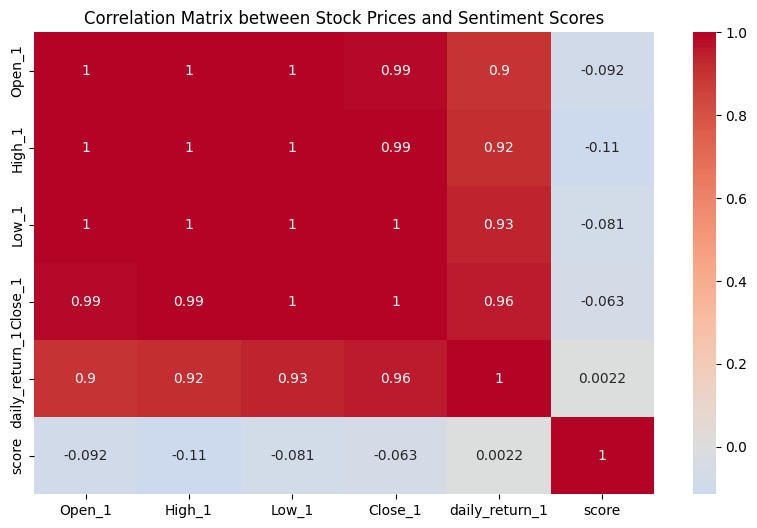

                  Open_2    High_2     Low_2   Close_2  daily_return_2  \
Open_2          1.000000 -0.166580 -0.097643 -0.288200       -0.469908   
High_2         -0.166580  1.000000  0.852805  0.983626        0.940586   
Low_2          -0.097643  0.852805  1.000000  0.900148        0.850234   
Close_2        -0.288200  0.983626  0.900148  1.000000        0.980688   
daily_return_2 -0.469908  0.940586  0.850234  0.980688        1.000000   
score          -0.491078 -0.170058  0.048508 -0.047078        0.057470   

                   score  
Open_2         -0.491078  
High_2         -0.170058  
Low_2           0.048508  
Close_2        -0.047078  
daily_return_2  0.057470  
score           1.000000  


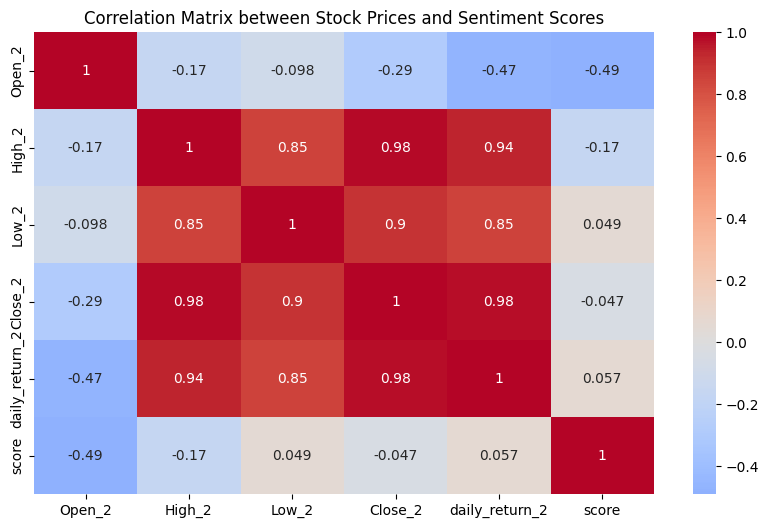

                  Open_3    High_3     Low_3   Close_3  daily_return_3  \
Open_3          1.000000  0.933448  0.992551  0.923409        0.227520   
High_3          0.933448  1.000000  0.963643  0.984141        0.521673   
Low_3           0.992551  0.963643  1.000000  0.963157        0.344159   
Close_3         0.923409  0.984141  0.963157  1.000000        0.583842   
daily_return_3  0.227520  0.521673  0.344159  0.583842        1.000000   
score           0.169377 -0.001991  0.154169  0.093336       -0.118712   

                   score  
Open_3          0.169377  
High_3         -0.001991  
Low_3           0.154169  
Close_3         0.093336  
daily_return_3 -0.118712  
score           1.000000  


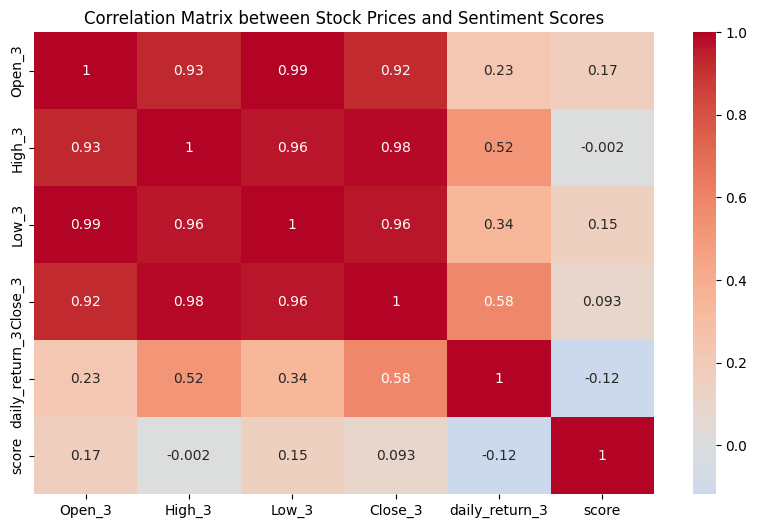

                  Open_4    High_4     Low_4   Close_4  daily_return_4  \
Open_4          1.000000 -0.790665  0.941346 -0.006365       -0.917802   
High_4         -0.790665  1.000000 -0.789648  0.539788        0.938904   
Low_4           0.941346 -0.789648  1.000000  0.089597       -0.827010   
Close_4        -0.006365  0.539788  0.089597  1.000000        0.402860   
daily_return_4 -0.917802  0.938904 -0.827010  0.402860        1.000000   
score           0.359490 -0.003707  0.180576  0.214685       -0.242103   

                   score  
Open_4          0.359490  
High_4         -0.003707  
Low_4           0.180576  
Close_4         0.214685  
daily_return_4 -0.242103  
score           1.000000  


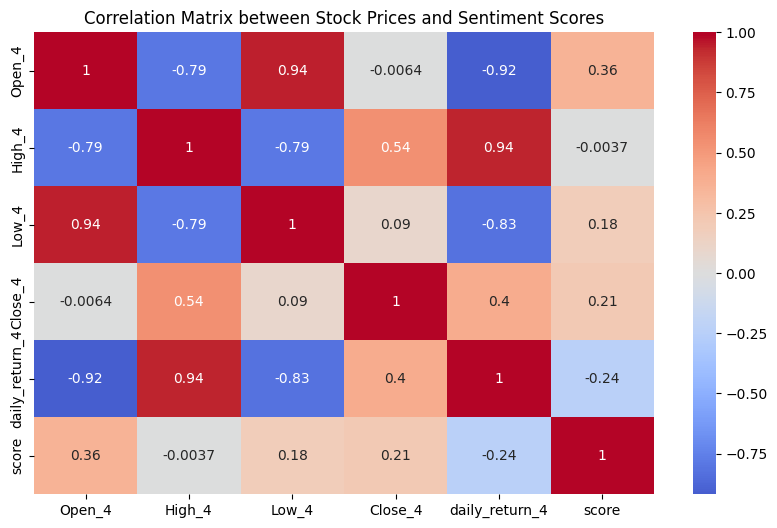

                  Open_5    High_5     Low_5   Close_5  daily_return_5  \
Open_5          1.000000 -0.169823  0.729229 -0.664296       -0.928273   
High_5         -0.169823  1.000000 -0.797916  0.419251        0.321976   
Low_5           0.729229 -0.797916  1.000000 -0.709888       -0.797230   
Close_5        -0.664296  0.419251 -0.709888  1.000000        0.894453   
daily_return_5 -0.928273  0.321976 -0.797230  0.894453        1.000000   
score           0.213045 -0.299525  0.326813  0.185460       -0.041775   

                   score  
Open_5          0.213045  
High_5         -0.299525  
Low_5           0.326813  
Close_5         0.185460  
daily_return_5 -0.041775  
score           1.000000  


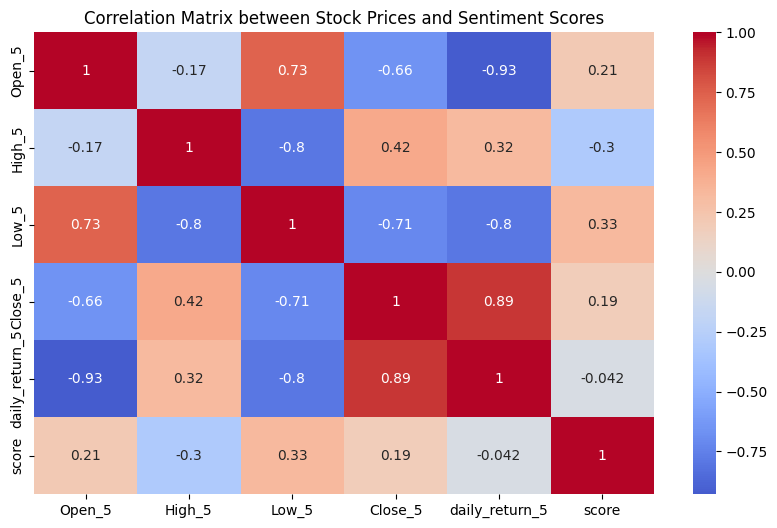

                  Open_6    High_6     Low_6   Close_6  daily_return_6  \
Open_6          1.000000  0.985202  0.935254  0.829272       -0.671855   
High_6          0.985202  1.000000  0.981187  0.910366       -0.538042   
Low_6           0.935254  0.981187  1.000000  0.973121       -0.366477   
Close_6         0.829272  0.910366  0.973121  1.000000       -0.143227   
daily_return_6 -0.671855 -0.538042 -0.366477 -0.143227        1.000000   
score          -0.007625  0.034774  0.118223  0.208936        0.288517   

                   score  
Open_6         -0.007625  
High_6          0.034774  
Low_6           0.118223  
Close_6         0.208936  
daily_return_6  0.288517  
score           1.000000  


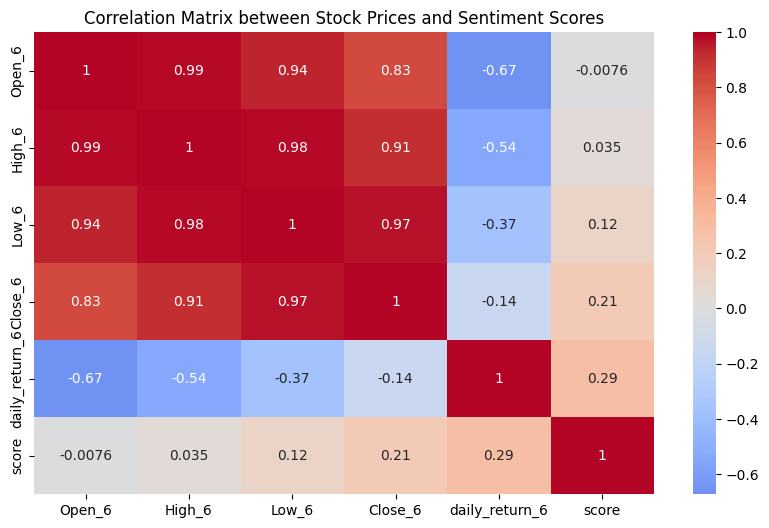

                  Open_8    High_8     Low_8   Close_8  daily_return_8  \
Open_8          1.000000 -0.163190  0.685731  0.824837        0.712774   
High_8         -0.163190  1.000000  0.268817  0.034869        0.091857   
Low_8           0.685731  0.268817  1.000000  0.964321        0.983001   
Close_8         0.824837  0.034869  0.964321  1.000000        0.984468   
daily_return_8  0.712774  0.091857  0.983001  0.984468        1.000000   
score          -0.280334 -0.098233 -0.629428 -0.588731       -0.643433   

                   score  
Open_8         -0.280334  
High_8         -0.098233  
Low_8          -0.629428  
Close_8        -0.588731  
daily_return_8 -0.643433  
score           1.000000  


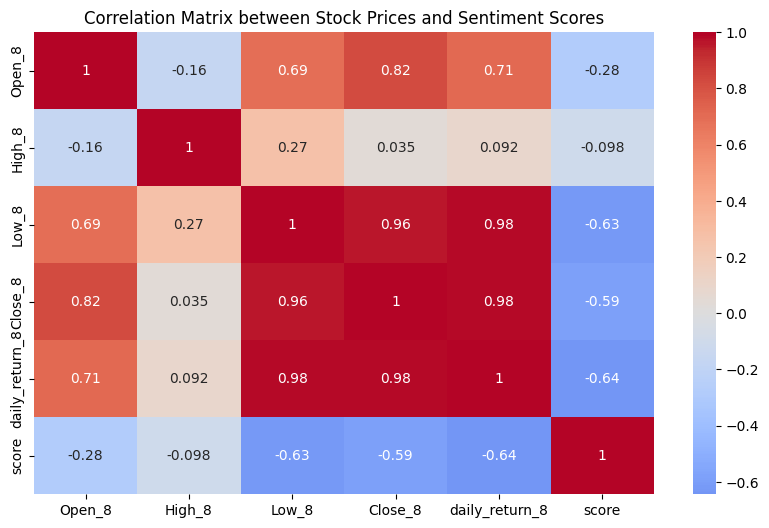

                  Open_9    High_9     Low_9   Close_9  daily_return_9  \
Open_9          1.000000  0.985020  0.979085  0.199099       -0.788742   
High_9          0.985020  1.000000  0.994909  0.365095       -0.670928   
Low_9           0.979085  0.994909  1.000000  0.367305       -0.663956   
Close_9         0.199099  0.365095  0.367305  1.000000        0.445377   
daily_return_9 -0.788742 -0.670928 -0.663956  0.445377        1.000000   
score           0.337932  0.409672  0.368345  0.507412        0.008888   

                   score  
Open_9          0.337932  
High_9          0.409672  
Low_9           0.368345  
Close_9         0.507412  
daily_return_9  0.008888  
score           1.000000  


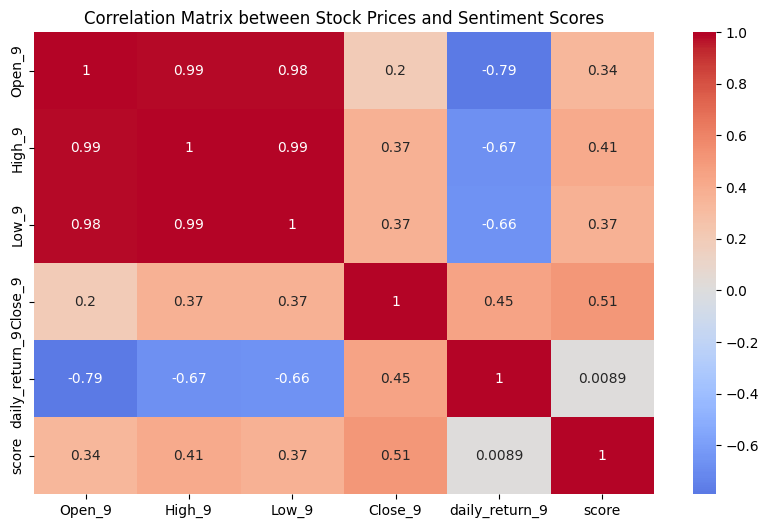

                  Open_10   High_10    Low_10  Close_10  daily_return_10  \
Open_10          1.000000  0.052123 -0.650730 -0.894999        -0.962961   
High_10          0.052123  1.000000  0.530808  0.398637         0.218997   
Low_10          -0.650730  0.530808  1.000000  0.828215         0.775643   
Close_10        -0.894999  0.398637  0.828215  1.000000         0.982127   
daily_return_10 -0.962961  0.218997  0.775643  0.982127         1.000000   
score           -0.485307 -0.387967  0.281051  0.268205         0.367168   

                    score  
Open_10         -0.485307  
High_10         -0.387967  
Low_10           0.281051  
Close_10         0.268205  
daily_return_10  0.367168  
score            1.000000  


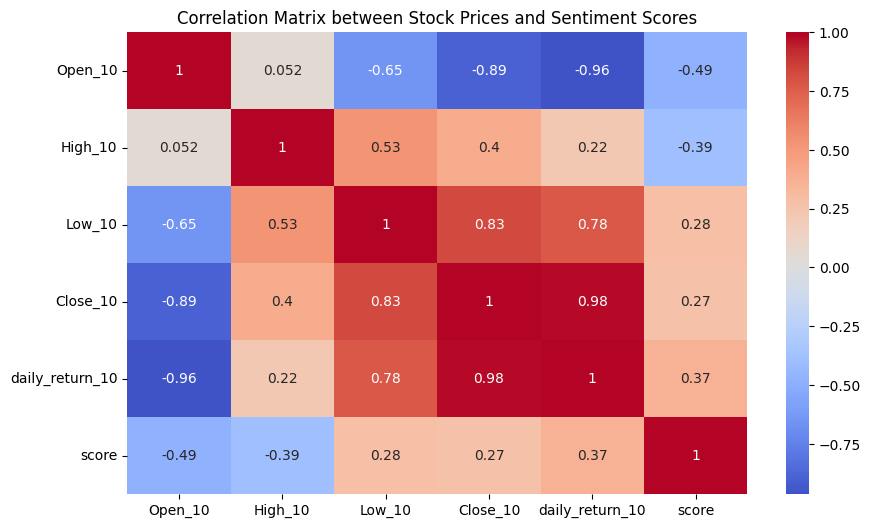

                  Open_11   High_11    Low_11  Close_11  daily_return_11  \
Open_11          1.000000  0.788282  0.670155  0.452445        -0.274203   
High_11          0.788282  1.000000  0.975809  0.902729         0.373538   
Low_11           0.670155  0.975809  1.000000  0.961664         0.525092   
Close_11         0.452445  0.902729  0.961664  1.000000         0.733449   
daily_return_11 -0.274203  0.373538  0.525092  0.733449         1.000000   
score           -0.531179 -0.217311 -0.162638  0.023647         0.435195   

                    score  
Open_11         -0.531179  
High_11         -0.217311  
Low_11          -0.162638  
Close_11         0.023647  
daily_return_11  0.435195  
score            1.000000  


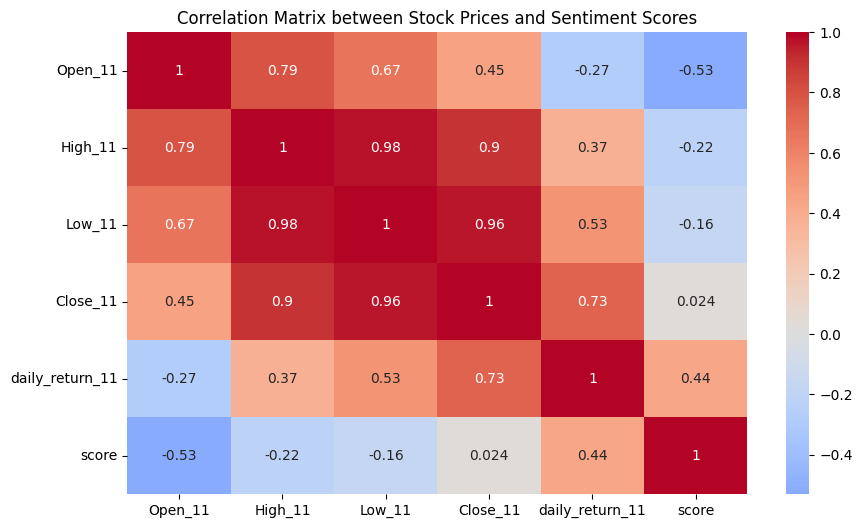

                  Open_12   High_12    Low_12  Close_12  daily_return_12  \
Open_12          1.000000  0.651313  0.925088  0.181911        -0.681538   
High_12          0.651313  1.000000  0.747558  0.738675         0.017332   
Low_12           0.925088  0.747558  1.000000  0.503903        -0.380588   
Close_12         0.181911  0.738675  0.503903  1.000000         0.595594   
daily_return_12 -0.681538  0.017332 -0.380588  0.595594         1.000000   
score           -0.014659  0.449527  0.213136  0.676843         0.515640   

                    score  
Open_12         -0.014659  
High_12          0.449527  
Low_12           0.213136  
Close_12         0.676843  
daily_return_12  0.515640  
score            1.000000  


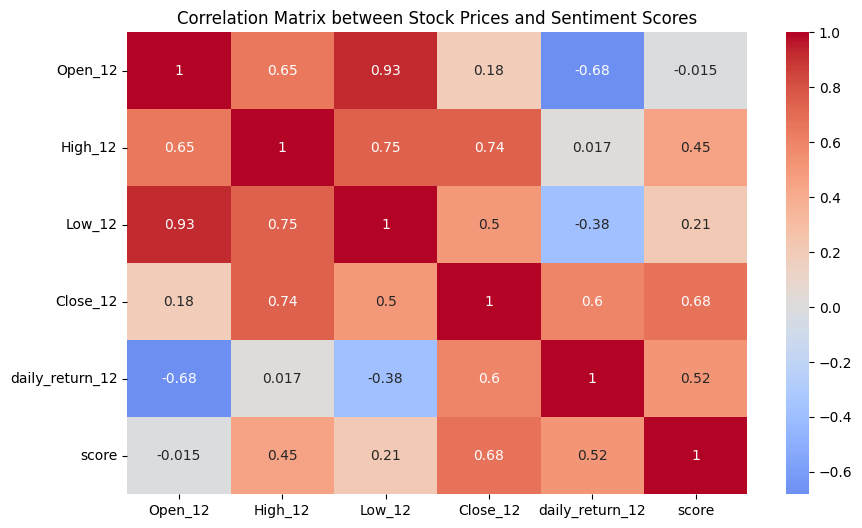

                  Open_13   High_13    Low_13  Close_13  daily_return_13  \
Open_13          1.000000  0.994108  0.992488  0.970395         0.491905   
High_13          0.994108  1.000000  0.999695  0.990844         0.583327   
Low_13           0.992488  0.999695  1.000000  0.992345         0.593638   
Close_13         0.970395  0.990844  0.992345  1.000000         0.687625   
daily_return_13  0.491905  0.583327  0.593638  0.687625         1.000000   
score           -0.278346 -0.211044 -0.207391 -0.125337         0.384669   

                    score  
Open_13         -0.278346  
High_13         -0.211044  
Low_13          -0.207391  
Close_13        -0.125337  
daily_return_13  0.384669  
score            1.000000  


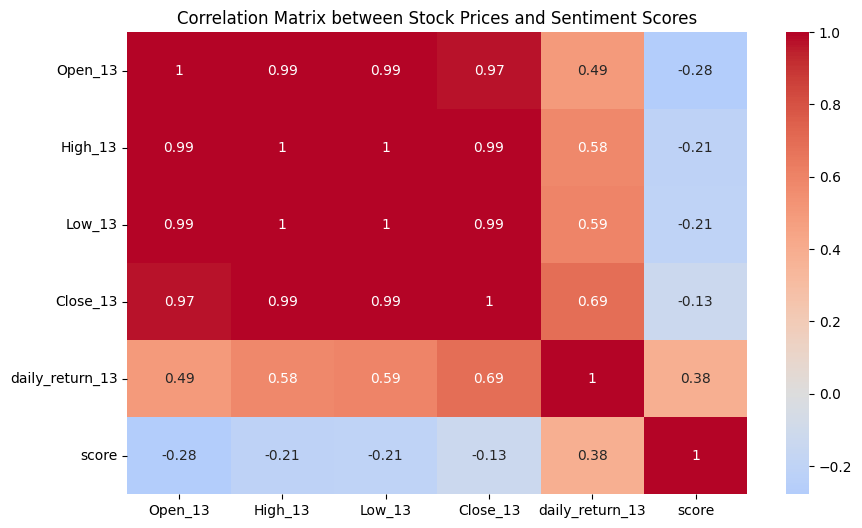

In [ ]:
df_jpm = pd.DataFrame(sentiment_scores_jpm)
df_jpm.insert(0, 'Date', posts_date_jpm)

df_jpm['score'] = df_jpm.apply(lambda row: row['score'] * -1 if row['label'] == 'NEGATIVE' else row['score'], axis=1)

df_jpm['Date'] = pd.to_datetime(df_jpm['Date'])  # Convert 'Date' column to datetime

# Display DataFrame
print(df_jpm)

# Assuming stock_data_1 to stock_data_13 are your stock data DataFrames
# Combine all stock data into a single DataFrame
#stock_data_all = pd.concat([stock_data_1, stock_data_2, stock_data_3, stock_data_4,
                           #stock_data_5, stock_data_6, stock_data_8, stock_data_9,
                           #stock_data_10, stock_data_11, stock_data_12, stock_data_13])

# Merge the sentiment data with the combined stock data
combined_data_jpm = pd.merge(df_jpm, stock_data_1, on=['Date'], how='inner')
combined_data_jpm = pd.merge(combined_data_jpm, stock_data_2, on=['Date'], how='inner')
combined_data_jpm = pd.merge(combined_data_jpm, stock_data_3, on=['Date'], how='inner')
combined_data_jpm = pd.merge(combined_data_jpm, stock_data_4, on=['Date'], how='inner')
combined_data_jpm = pd.merge(combined_data_jpm, stock_data_5, on=['Date'], how='inner')
combined_data_jpm = pd.merge(combined_data_jpm, stock_data_6, on=['Date'], how='inner')
combined_data_jpm = pd.merge(combined_data_jpm, stock_data_8, on=['Date'], how='inner')
combined_data_jpm = pd.merge(combined_data_jpm, stock_data_9, on=['Date'], how='inner')
combined_data_jpm = pd.merge(combined_data_jpm, stock_data_10, on=['Date'], how='inner')
combined_data_jpm = pd.merge(combined_data_jpm, stock_data_11, on=['Date'], how='inner')
combined_data_jpm = pd.merge(combined_data_jpm, stock_data_12, on=['Date'], how='inner')
combined_data_jpm = pd.merge(combined_data_jpm, stock_data_13, on=['Date'], how='inner')



print(combined_data_jpm)

# Calculate the correlation matrix
correlation_matrix_1 = combined_data_jpm[['Open_1', 'High_1', 'Low_1', 'Close_1', 'daily_return_1', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_1)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_2 = combined_data_jpm[['Open_2', 'High_2', 'Low_2', 'Close_2', 'daily_return_2', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_2)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_3 = combined_data_jpm[['Open_3', 'High_3', 'Low_3', 'Close_3', 'daily_return_3', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_3)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_3, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_4 = combined_data_jpm[['Open_4', 'High_4', 'Low_4', 'Close_4', 'daily_return_4', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_4)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_4, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_5 = combined_data_jpm[['Open_5', 'High_5', 'Low_5', 'Close_5', 'daily_return_5', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_5)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_5, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_6 = combined_data_jpm[['Open_6', 'High_6', 'Low_6', 'Close_6', 'daily_return_6', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_6)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_6, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_8 = combined_data_jpm[['Open_8', 'High_8', 'Low_8', 'Close_8', 'daily_return_8', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_8)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_8, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_9 = combined_data_jpm[['Open_9', 'High_9', 'Low_9', 'Close_9', 'daily_return_9', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_9)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_9, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_10 = combined_data_jpm[['Open_10', 'High_10', 'Low_10', 'Close_10', 'daily_return_10', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_10)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_10, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_11 = combined_data_jpm[['Open_11', 'High_11', 'Low_11', 'Close_11', 'daily_return_11', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_11)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_11, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_12 = combined_data_jpm[['Open_12', 'High_12', 'Low_12', 'Close_12', 'daily_return_12', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_12)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_12, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_13 = combined_data_jpm[['Open_13', 'High_13', 'Low_13', 'Close_13', 'daily_return_13', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_13)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_13, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

         Date     label     score
0  2024-07-19  NEGATIVE -0.996973
1  2024-07-22  NEGATIVE -0.994500
2  2024-07-25  NEGATIVE -0.995901
3  2024-07-25  NEGATIVE -0.986194
4  2024-07-22  NEGATIVE -0.998689
..        ...       ...       ...
72 2024-07-19  NEGATIVE -0.995364
73 2024-07-25  NEGATIVE -0.999174
74 2024-07-29  POSITIVE  0.931737
75 2024-07-19  NEGATIVE -0.995182
76 2024-07-22  NEGATIVE -0.971253

[77 rows x 3 columns]
         Date     label     score      Open_1      High_1       Low_1  \
0  2024-07-19  NEGATIVE -0.996973  294.510010  316.750000  290.100006   
1  2024-07-19  POSITIVE  0.999063  294.510010  316.750000  290.100006   
2  2024-07-19  NEGATIVE -0.999175  294.510010  316.750000  290.100006   
3  2024-07-19  NEGATIVE -0.999256  294.510010  316.750000  290.100006   
4  2024-07-19  NEGATIVE -0.997714  294.510010  316.750000  290.100006   
5  2024-07-19  NEGATIVE -0.998892  294.510010  316.750000  290.100006   
6  2024-07-19  POSITIVE  0.820597  294.510010  316.750000 

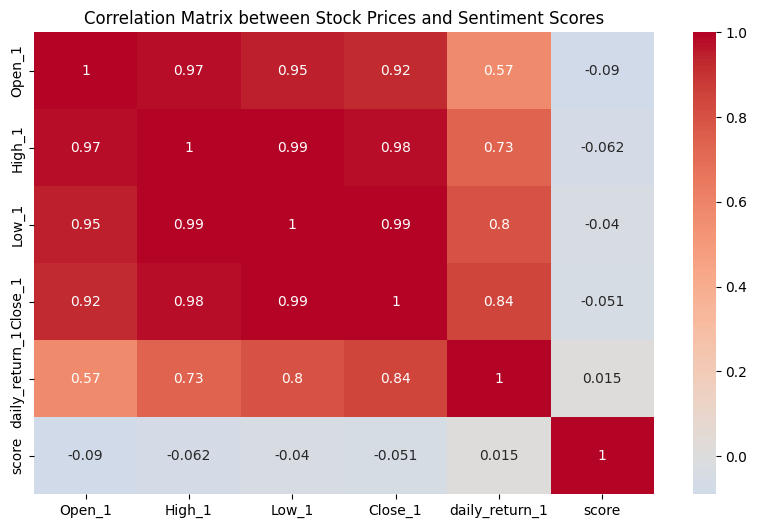

                  Open_2    High_2     Low_2   Close_2  daily_return_2  \
Open_2          1.000000 -0.035493  0.802531 -0.225491       -0.622987   
High_2         -0.035493  1.000000  0.288257  0.961469        0.787773   
Low_2           0.802531  0.288257  1.000000  0.202759       -0.192074   
Close_2        -0.225491  0.961469  0.202759  1.000000        0.902559   
daily_return_2 -0.622987  0.787773 -0.192074  0.902559        1.000000   
score          -0.131260 -0.111496 -0.185105 -0.073581       -0.000975   

                   score  
Open_2         -0.131260  
High_2         -0.111496  
Low_2          -0.185105  
Close_2        -0.073581  
daily_return_2 -0.000975  
score           1.000000  


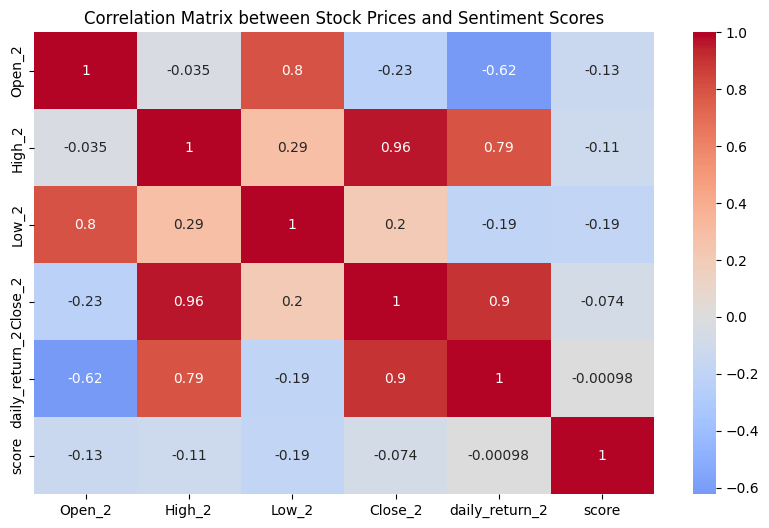

                  Open_3    High_3     Low_3   Close_3  daily_return_3  \
Open_3          1.000000  0.868796  0.963314  0.794660        0.149128   
High_3          0.868796  1.000000  0.945272  0.965127        0.577561   
Low_3           0.963314  0.945272  1.000000  0.923479        0.400392   
Close_3         0.794660  0.965127  0.923479  1.000000        0.718721   
daily_return_3  0.149128  0.577561  0.400392  0.718721        1.000000   
score          -0.070202 -0.069364 -0.073523 -0.070092       -0.035725   

                   score  
Open_3         -0.070202  
High_3         -0.069364  
Low_3          -0.073523  
Close_3        -0.070092  
daily_return_3 -0.035725  
score           1.000000  


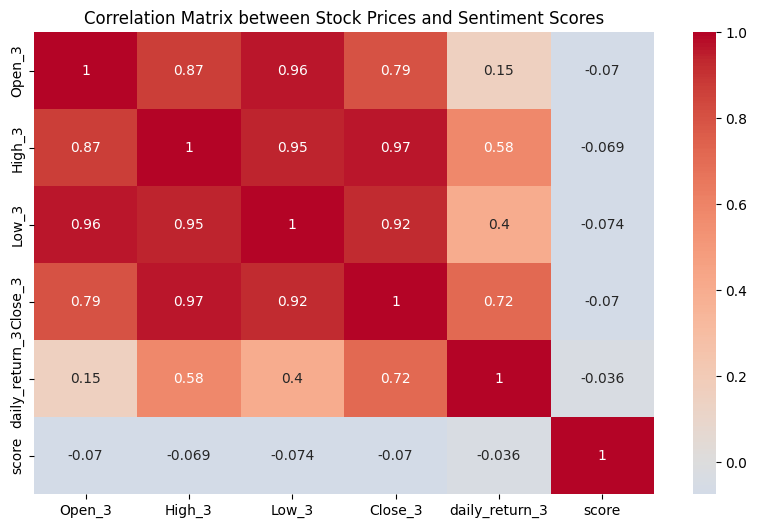

                  Open_4    High_4     Low_4   Close_4  daily_return_4  \
Open_4          1.000000 -0.638132  0.911031  0.027750       -0.849604   
High_4         -0.638132  1.000000 -0.557024  0.580355        0.860843   
Low_4           0.911031 -0.557024  1.000000  0.170345       -0.699091   
Close_4         0.027750  0.580355  0.170345  1.000000        0.503481   
daily_return_4 -0.849604  0.860843 -0.699091  0.503481        1.000000   
score          -0.007075 -0.087939 -0.064312 -0.169063       -0.082270   

                   score  
Open_4         -0.007075  
High_4         -0.087939  
Low_4          -0.064312  
Close_4        -0.169063  
daily_return_4 -0.082270  
score           1.000000  


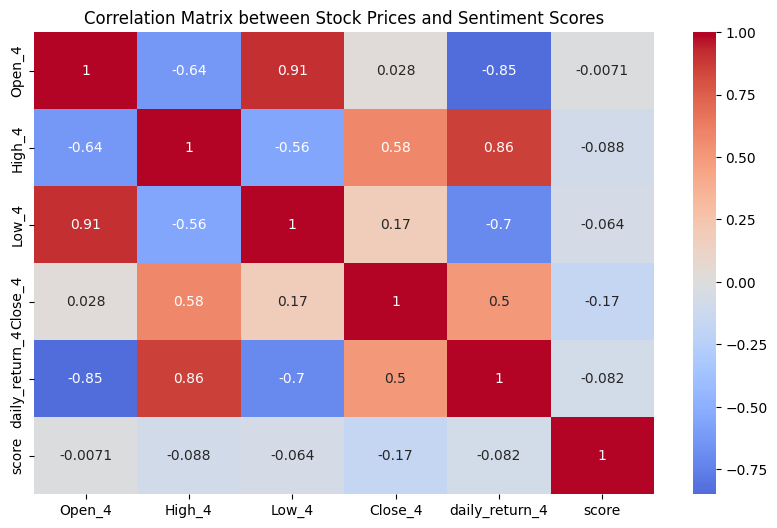

                  Open_5    High_5     Low_5   Close_5  daily_return_5  \
Open_5          1.000000  0.181065  0.766797 -0.413530       -0.889284   
High_5          0.181065  1.000000  0.225669  0.502383        0.135596   
Low_5           0.766797  0.225669  1.000000  0.002222       -0.528831   
Close_5        -0.413530  0.502383  0.002222  1.000000        0.783936   
daily_return_5 -0.889284  0.135596 -0.528831  0.783936        1.000000   
score           0.056608 -0.174299 -0.064830 -0.200138       -0.138308   

                   score  
Open_5          0.056608  
High_5         -0.174299  
Low_5          -0.064830  
Close_5        -0.200138  
daily_return_5 -0.138308  
score           1.000000  


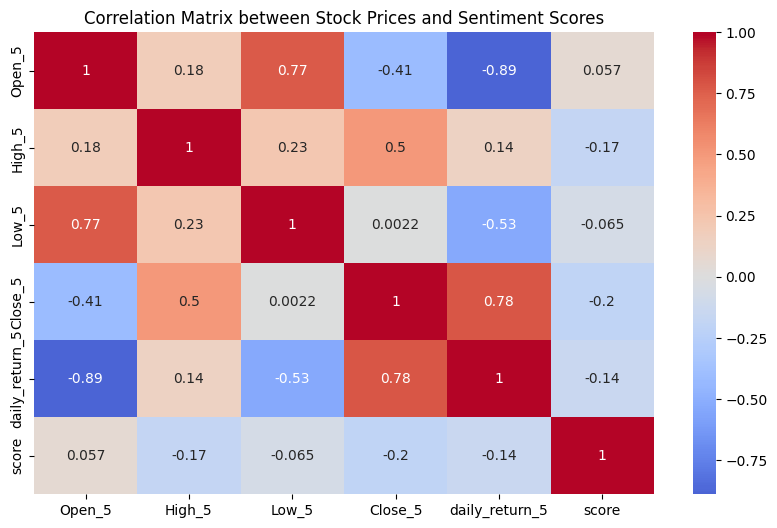

                  Open_6    High_6     Low_6   Close_6  daily_return_6  \
Open_6          1.000000  0.966290  0.898289  0.756456       -0.555923   
High_6          0.966290  1.000000  0.963542  0.878788       -0.349474   
Low_6           0.898289  0.963542  1.000000  0.965700       -0.135572   
Close_6         0.756456  0.878788  0.965700  1.000000        0.123111   
daily_return_6 -0.555923 -0.349474 -0.135572  0.123111        1.000000   
score          -0.094746 -0.119424 -0.111209 -0.112767       -0.000473   

                   score  
Open_6         -0.094746  
High_6         -0.119424  
Low_6          -0.111209  
Close_6        -0.112767  
daily_return_6 -0.000473  
score           1.000000  


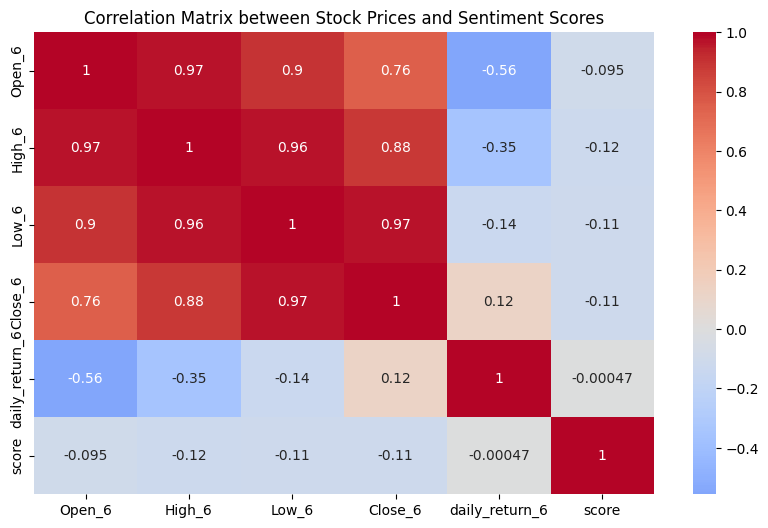

                  Open_8    High_8     Low_8   Close_8  daily_return_8  \
Open_8          1.000000  0.575208  0.707174  0.262306       -0.439681   
High_8          0.575208  1.000000  0.663714  0.559053        0.128448   
Low_8           0.707174  0.663714  1.000000  0.756494        0.218593   
Close_8         0.262306  0.559053  0.756494  1.000000        0.751357   
daily_return_8 -0.439681  0.128448  0.218593  0.751357        1.000000   
score           0.020490 -0.047472  0.005873 -0.131672       -0.137719   

                   score  
Open_8          0.020490  
High_8         -0.047472  
Low_8           0.005873  
Close_8        -0.131672  
daily_return_8 -0.137719  
score           1.000000  


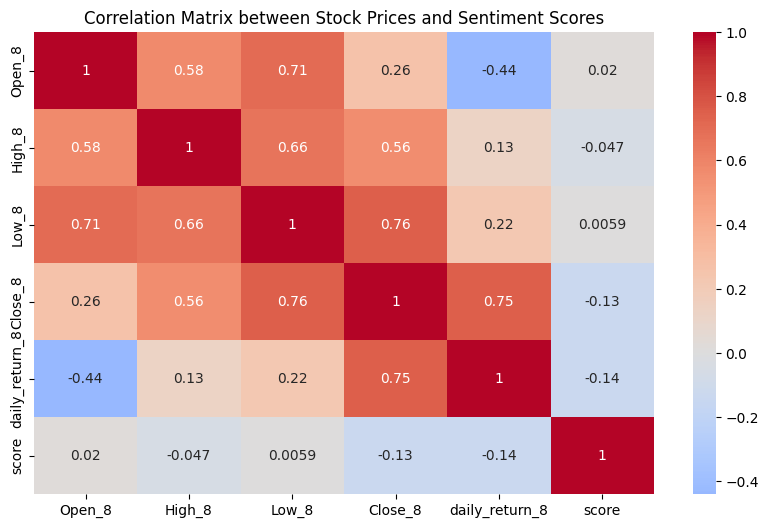

                  Open_9    High_9     Low_9   Close_9  daily_return_9  \
Open_9          1.000000  0.960597  0.887838  0.223606       -0.660264   
High_9          0.960597  1.000000  0.843080  0.250444       -0.606023   
Low_9           0.887838  0.843080  1.000000  0.500732       -0.354624   
Close_9         0.223606  0.250444  0.500732  1.000000        0.584362   
daily_return_9 -0.660264 -0.606023 -0.354624  0.584362        1.000000   
score           0.012871  0.045047 -0.092374 -0.184078       -0.152060   

                   score  
Open_9          0.012871  
High_9          0.045047  
Low_9          -0.092374  
Close_9        -0.184078  
daily_return_9 -0.152060  
score           1.000000  


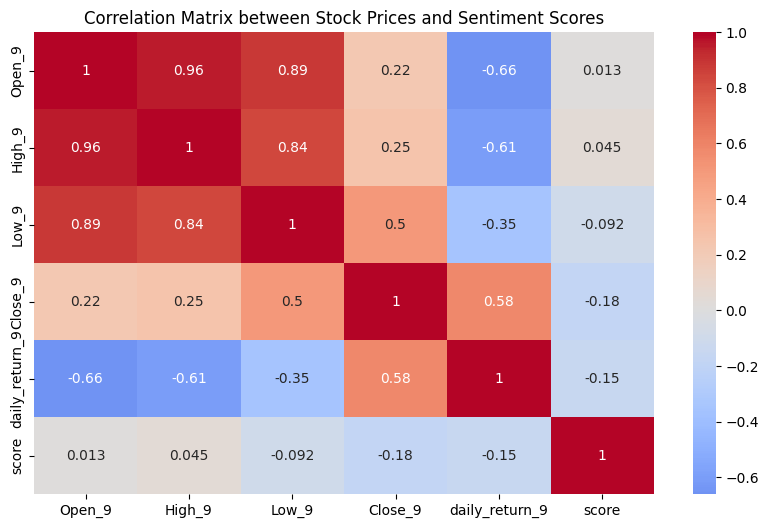

                  Open_10   High_10    Low_10  Close_10  daily_return_10  \
Open_10          1.000000  0.460294  0.422694 -0.026003        -0.684536   
High_10          0.460294  1.000000  0.673745  0.713281         0.211704   
Low_10           0.422694  0.673745  1.000000  0.764491         0.277533   
Close_10        -0.026003  0.713281  0.764491  1.000000         0.746515   
daily_return_10 -0.684536  0.211704  0.277533  0.746515         1.000000   
score           -0.060211 -0.095710 -0.062698 -0.105707        -0.037399   

                    score  
Open_10         -0.060211  
High_10         -0.095710  
Low_10          -0.062698  
Close_10        -0.105707  
daily_return_10 -0.037399  
score            1.000000  


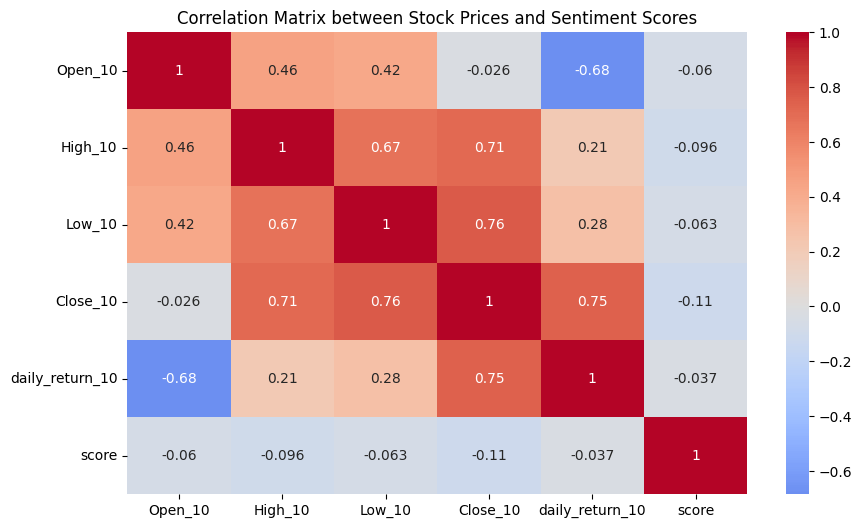

                  Open_11   High_11    Low_11  Close_11  daily_return_11  \
Open_11          1.000000  0.856986  0.796421  0.622090        -0.271532   
High_11          0.856986  1.000000  0.961984  0.905995         0.226804   
Low_11           0.796421  0.961984  1.000000  0.963543         0.358081   
Close_11         0.622090  0.905995  0.963543  1.000000         0.584516   
daily_return_11 -0.271532  0.226804  0.358081  0.584516         1.000000   
score           -0.086395 -0.128987 -0.155691 -0.159810        -0.105304   

                    score  
Open_11         -0.086395  
High_11         -0.128987  
Low_11          -0.155691  
Close_11        -0.159810  
daily_return_11 -0.105304  
score            1.000000  


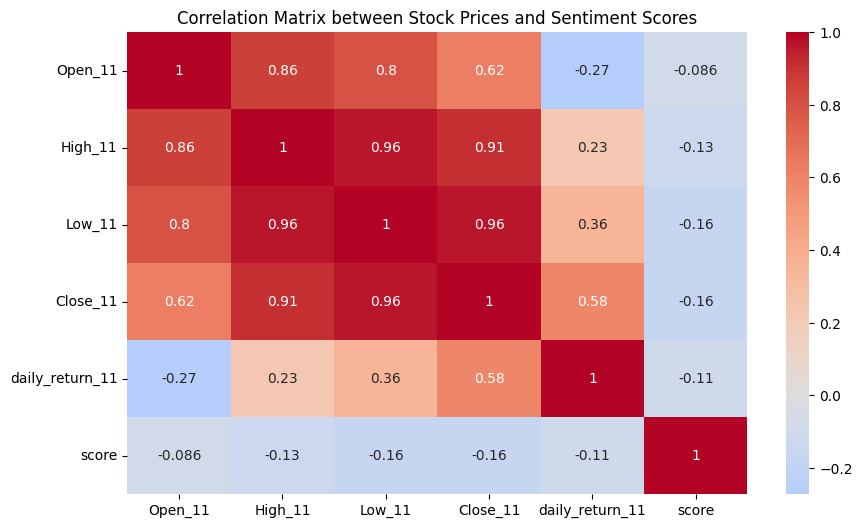

                  Open_12   High_12    Low_12  Close_12  daily_return_12  \
Open_12          1.000000  0.569808  0.745798  0.218507        -0.658354   
High_12          0.569808  1.000000  0.502190  0.657381         0.036161   
Low_12           0.745798  0.502190  1.000000  0.523273        -0.213663   
Close_12         0.218507  0.657381  0.523273  1.000000         0.590660   
daily_return_12 -0.658354  0.036161 -0.213663  0.590660         1.000000   
score           -0.006676  0.090773 -0.057893 -0.026784        -0.014642   

                    score  
Open_12         -0.006676  
High_12          0.090773  
Low_12          -0.057893  
Close_12        -0.026784  
daily_return_12 -0.014642  
score            1.000000  


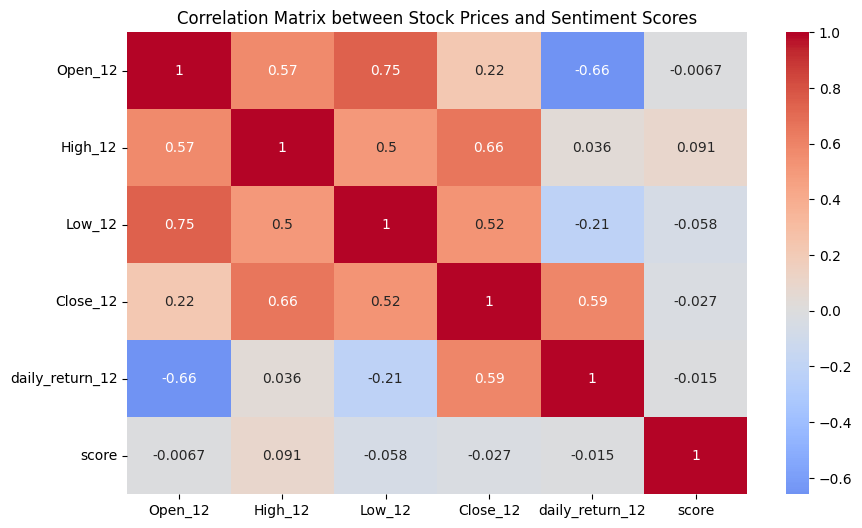

In [ ]:
df_baml = pd.DataFrame(sentiment_scores_crwd)
df_baml.insert(0, 'Date', posts_date_crwd)

df_baml['score'] = df_baml.apply(lambda row: row['score'] * -1 if row['label'] == 'NEGATIVE' else row['score'], axis=1)

df_baml['Date'] = pd.to_datetime(df_baml['Date'])  # Convert 'Date' column to datetime

# Display DataFrame
print(df_baml)

# Assuming stock_data_1 to stock_data_13 are your stock data DataFrames
# Combine all stock data into a single DataFrame
#stock_data_all = pd.concat([stock_data_1, stock_data_2, stock_data_3, stock_data_4,
                           #stock_data_5, stock_data_6, stock_data_8, stock_data_9,
                           #stock_data_10, stock_data_11, stock_data_12, stock_data_13])

# Merge the sentiment data with the combined stock data
combined_data_baml = pd.merge(df_baml, stock_data_1, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_2, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_3, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_4, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_5, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_6, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_8, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_9, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_10, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_11, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_12, on=['Date'], how='inner')



print(combined_data_baml)

# Calculate the correlation matrix
correlation_matrix_1 = combined_data_baml[['Open_1', 'High_1', 'Low_1', 'Close_1', 'daily_return_1', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_1)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_2 = combined_data_baml[['Open_2', 'High_2', 'Low_2', 'Close_2', 'daily_return_2', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_2)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_3 = combined_data_baml[['Open_3', 'High_3', 'Low_3', 'Close_3', 'daily_return_3', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_3)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_3, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_4 = combined_data_baml[['Open_4', 'High_4', 'Low_4', 'Close_4', 'daily_return_4', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_4)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_4, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_5 = combined_data_baml[['Open_5', 'High_5', 'Low_5', 'Close_5', 'daily_return_5', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_5)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_5, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_6 = combined_data_baml[['Open_6', 'High_6', 'Low_6', 'Close_6', 'daily_return_6', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_6)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_6, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_8 = combined_data_baml[['Open_8', 'High_8', 'Low_8', 'Close_8', 'daily_return_8', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_8)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_8, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_9 = combined_data_baml[['Open_9', 'High_9', 'Low_9', 'Close_9', 'daily_return_9', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_9)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_9, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_10 = combined_data_baml[['Open_10', 'High_10', 'Low_10', 'Close_10', 'daily_return_10', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_10)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_10, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_11 = combined_data_baml[['Open_11', 'High_11', 'Low_11', 'Close_11', 'daily_return_11', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_11)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_11, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_12 = combined_data_baml[['Open_12', 'High_12', 'Low_12', 'Close_12', 'daily_return_12', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_12)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_12, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

        Date     label     score
0 2024-07-20  NEGATIVE -0.999648
1 2024-07-25  NEGATIVE -0.998803
2 2024-07-25  NEGATIVE -0.998572
3 2024-07-25  NEGATIVE -0.964296
4 2024-07-22  NEGATIVE -0.924859
5 2024-07-20  NEGATIVE -0.999435
6 2024-07-20  NEGATIVE -0.989382
        Date     label     score      Open_1      High_1       Low_1  \
0 2024-07-25  NEGATIVE -0.998803  258.390015  262.790009  250.220001   
1 2024-07-25  NEGATIVE -0.998572  258.390015  262.790009  250.220001   
2 2024-07-25  NEGATIVE -0.964296  258.390015  262.790009  250.220001   
3 2024-07-22  NEGATIVE -0.924859  285.010010  285.010010  261.589996   

      Close_1  Adj_Close_1  Volume_1  daily_return_1  ...  Adj_Close_12  \
0  254.149994   254.149994  10511400       -0.016409  ...    208.669998   
1  254.149994   254.149994  10511400       -0.016409  ...    208.669998   
2  254.149994   254.149994  10511400       -0.016409  ...    208.669998   
3  263.910004   263.910004  49567500       -0.074033  ...    210.279999   


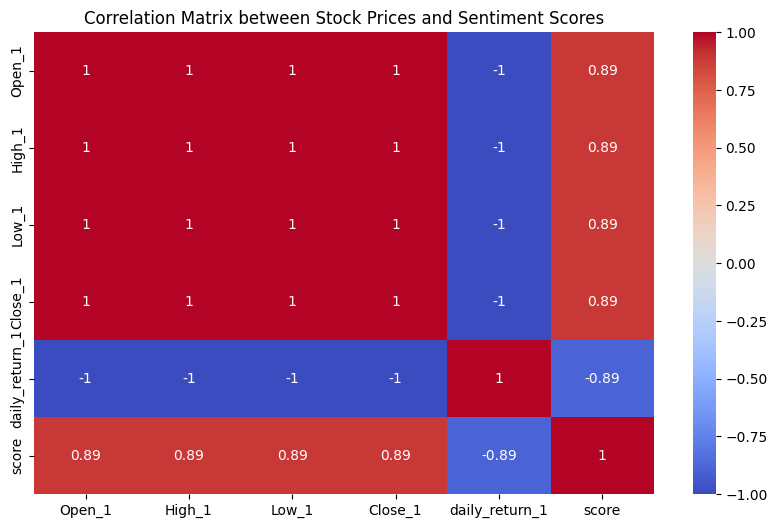

                 Open_2   High_2    Low_2  Close_2  daily_return_2    score
Open_2          1.00000  1.00000  1.00000  1.00000         1.00000  0.88724
High_2          1.00000  1.00000  1.00000  1.00000         1.00000  0.88724
Low_2           1.00000  1.00000  1.00000  1.00000         1.00000  0.88724
Close_2         1.00000  1.00000  1.00000  1.00000         1.00000  0.88724
daily_return_2  1.00000  1.00000  1.00000  1.00000         1.00000  0.88724
score           0.88724  0.88724  0.88724  0.88724         0.88724  1.00000


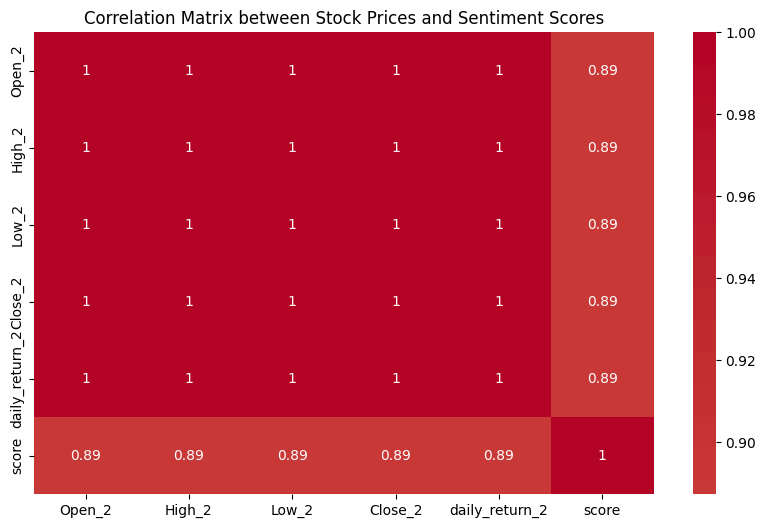

                 Open_3   High_3    Low_3  Close_3  daily_return_3    score
Open_3          1.00000  1.00000  1.00000  1.00000        -1.00000  0.88724
High_3          1.00000  1.00000  1.00000  1.00000        -1.00000  0.88724
Low_3           1.00000  1.00000  1.00000  1.00000        -1.00000  0.88724
Close_3         1.00000  1.00000  1.00000  1.00000        -1.00000  0.88724
daily_return_3 -1.00000 -1.00000 -1.00000 -1.00000         1.00000 -0.88724
score           0.88724  0.88724  0.88724  0.88724        -0.88724  1.00000


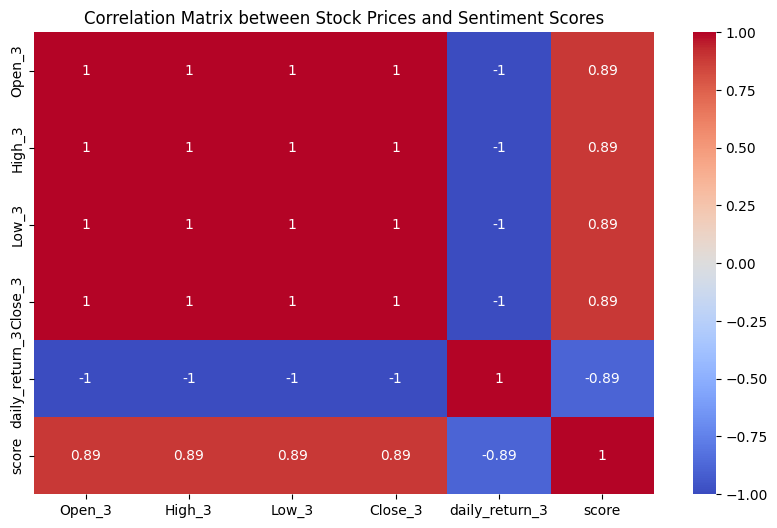

                 Open_4   High_4    Low_4  Close_4  daily_return_4    score
Open_4          1.00000 -1.00000  1.00000  1.00000        -1.00000  0.88724
High_4         -1.00000  1.00000 -1.00000 -1.00000         1.00000 -0.88724
Low_4           1.00000 -1.00000  1.00000  1.00000        -1.00000  0.88724
Close_4         1.00000 -1.00000  1.00000  1.00000        -1.00000  0.88724
daily_return_4 -1.00000  1.00000 -1.00000 -1.00000         1.00000 -0.88724
score           0.88724 -0.88724  0.88724  0.88724        -0.88724  1.00000


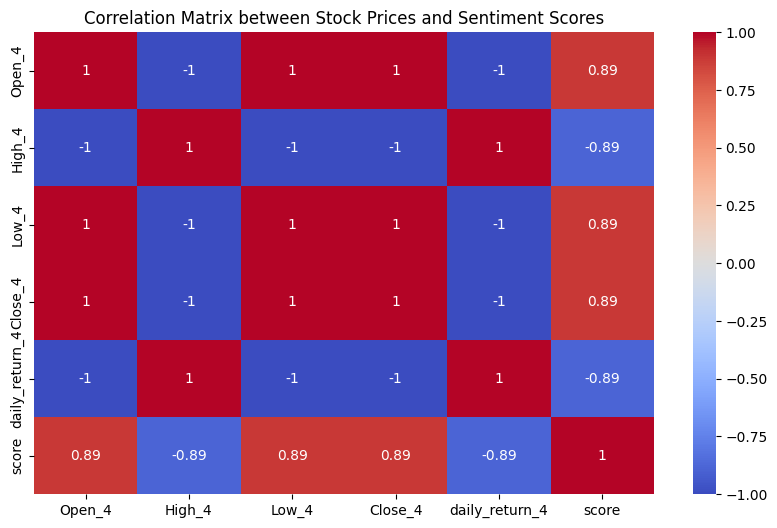

                 Open_5   High_5    Low_5  Close_5  daily_return_5    score
Open_5          1.00000  1.00000  1.00000  1.00000         1.00000  0.88724
High_5          1.00000  1.00000  1.00000  1.00000         1.00000  0.88724
Low_5           1.00000  1.00000  1.00000  1.00000         1.00000  0.88724
Close_5         1.00000  1.00000  1.00000  1.00000         1.00000  0.88724
daily_return_5  1.00000  1.00000  1.00000  1.00000         1.00000  0.88724
score           0.88724  0.88724  0.88724  0.88724         0.88724  1.00000


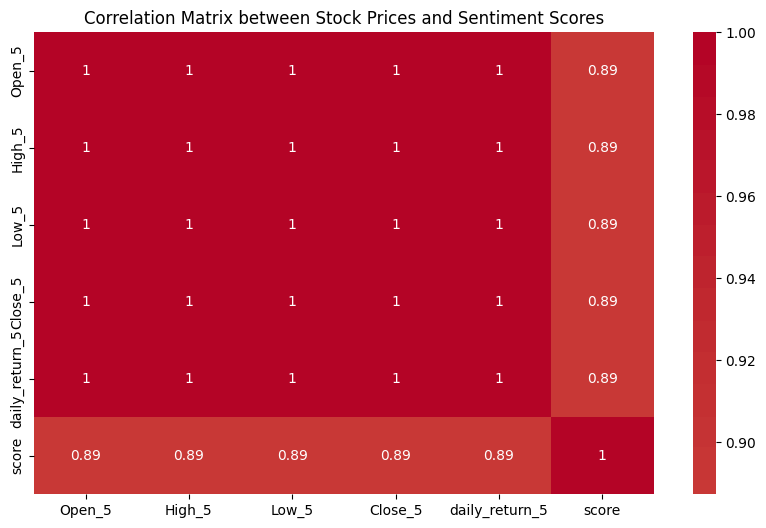

                 Open_6   High_6    Low_6  Close_6  daily_return_6    score
Open_6          1.00000  1.00000  1.00000  1.00000        -1.00000  0.88724
High_6          1.00000  1.00000  1.00000  1.00000        -1.00000  0.88724
Low_6           1.00000  1.00000  1.00000  1.00000        -1.00000  0.88724
Close_6         1.00000  1.00000  1.00000  1.00000        -1.00000  0.88724
daily_return_6 -1.00000 -1.00000 -1.00000 -1.00000         1.00000 -0.88724
score           0.88724  0.88724  0.88724  0.88724        -0.88724  1.00000


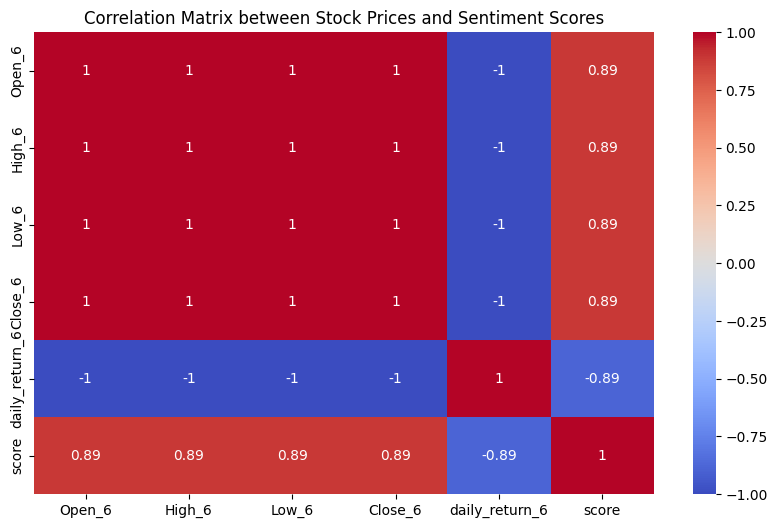

                 Open_8   High_8    Low_8  Close_8  daily_return_8    score
Open_8          1.00000  1.00000  1.00000 -1.00000        -1.00000 -0.88724
High_8          1.00000  1.00000  1.00000 -1.00000        -1.00000 -0.88724
Low_8           1.00000  1.00000  1.00000 -1.00000        -1.00000 -0.88724
Close_8        -1.00000 -1.00000 -1.00000  1.00000         1.00000  0.88724
daily_return_8 -1.00000 -1.00000 -1.00000  1.00000         1.00000  0.88724
score          -0.88724 -0.88724 -0.88724  0.88724         0.88724  1.00000


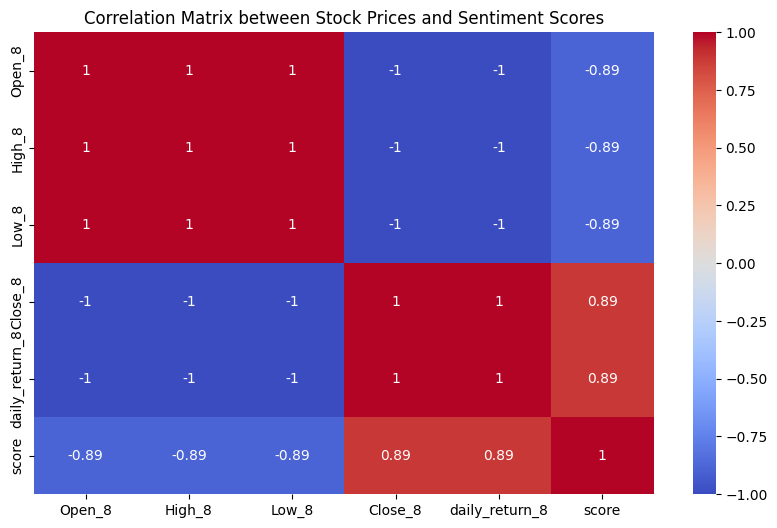

                 Open_9   High_9    Low_9  Close_9  daily_return_9    score
Open_9          1.00000  1.00000  1.00000  1.00000        -1.00000  0.88724
High_9          1.00000  1.00000  1.00000  1.00000        -1.00000  0.88724
Low_9           1.00000  1.00000  1.00000  1.00000        -1.00000  0.88724
Close_9         1.00000  1.00000  1.00000  1.00000        -1.00000  0.88724
daily_return_9 -1.00000 -1.00000 -1.00000 -1.00000         1.00000 -0.88724
score           0.88724  0.88724  0.88724  0.88724        -0.88724  1.00000


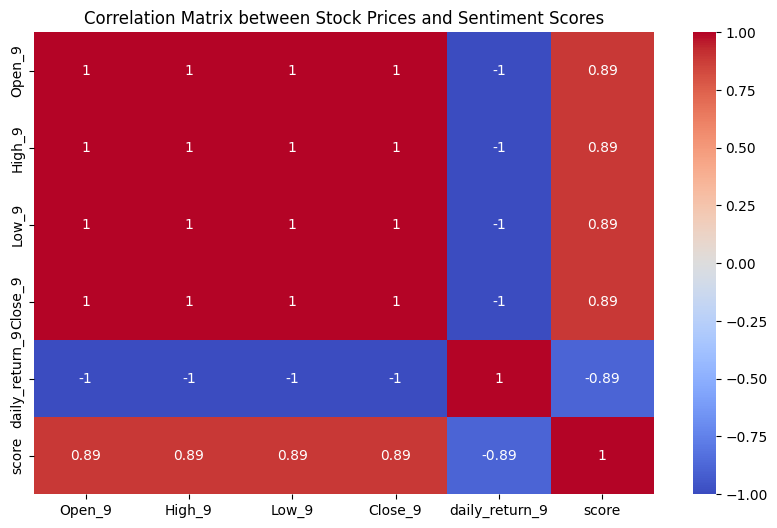

                 Open_10  High_10   Low_10  Close_10  daily_return_10    score
Open_10          1.00000  1.00000  1.00000   1.00000          1.00000  0.88724
High_10          1.00000  1.00000  1.00000   1.00000          1.00000  0.88724
Low_10           1.00000  1.00000  1.00000   1.00000          1.00000  0.88724
Close_10         1.00000  1.00000  1.00000   1.00000          1.00000  0.88724
daily_return_10  1.00000  1.00000  1.00000   1.00000          1.00000  0.88724
score            0.88724  0.88724  0.88724   0.88724          0.88724  1.00000


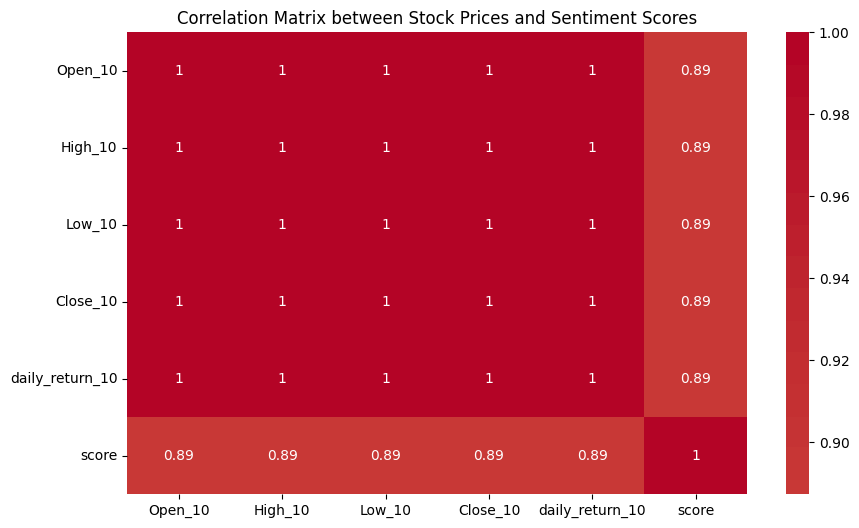

                 Open_11  High_11   Low_11  Close_11  daily_return_11    score
Open_11          1.00000  1.00000  1.00000   1.00000          1.00000  0.88724
High_11          1.00000  1.00000  1.00000   1.00000          1.00000  0.88724
Low_11           1.00000  1.00000  1.00000   1.00000          1.00000  0.88724
Close_11         1.00000  1.00000  1.00000   1.00000          1.00000  0.88724
daily_return_11  1.00000  1.00000  1.00000   1.00000          1.00000  0.88724
score            0.88724  0.88724  0.88724   0.88724          0.88724  1.00000


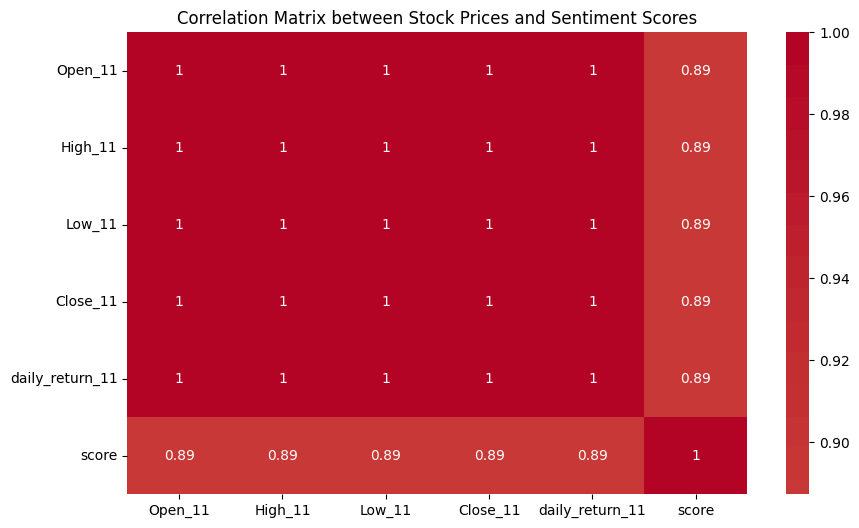

                 Open_12  High_12   Low_12  Close_12  daily_return_12    score
Open_12          1.00000  1.00000  1.00000   1.00000         -1.00000  0.88724
High_12          1.00000  1.00000  1.00000   1.00000         -1.00000  0.88724
Low_12           1.00000  1.00000  1.00000   1.00000         -1.00000  0.88724
Close_12         1.00000  1.00000  1.00000   1.00000         -1.00000  0.88724
daily_return_12 -1.00000 -1.00000 -1.00000  -1.00000          1.00000 -0.88724
score            0.88724  0.88724  0.88724   0.88724         -0.88724  1.00000


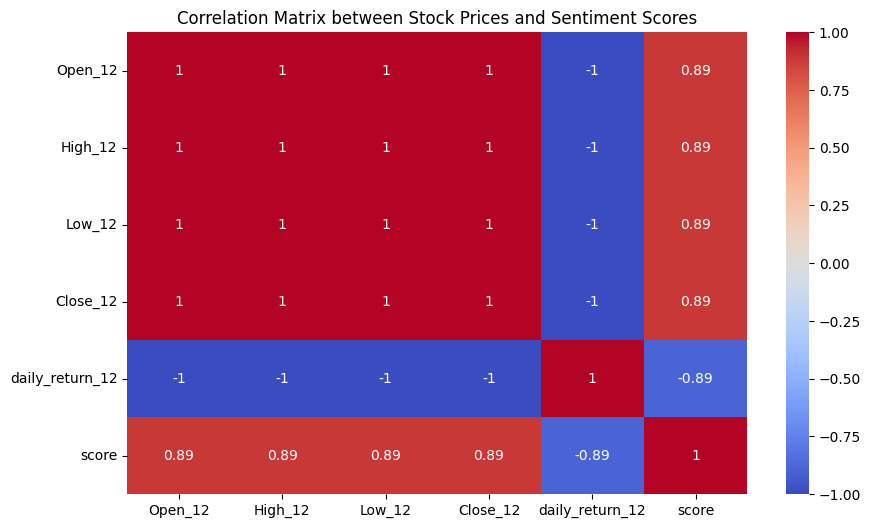

                 Open_13  High_13   Low_13  Close_13  daily_return_13    score
Open_13          1.00000  1.00000  1.00000   1.00000          1.00000  0.88724
High_13          1.00000  1.00000  1.00000   1.00000          1.00000  0.88724
Low_13           1.00000  1.00000  1.00000   1.00000          1.00000  0.88724
Close_13         1.00000  1.00000  1.00000   1.00000          1.00000  0.88724
daily_return_13  1.00000  1.00000  1.00000   1.00000          1.00000  0.88724
score            0.88724  0.88724  0.88724   0.88724          0.88724  1.00000


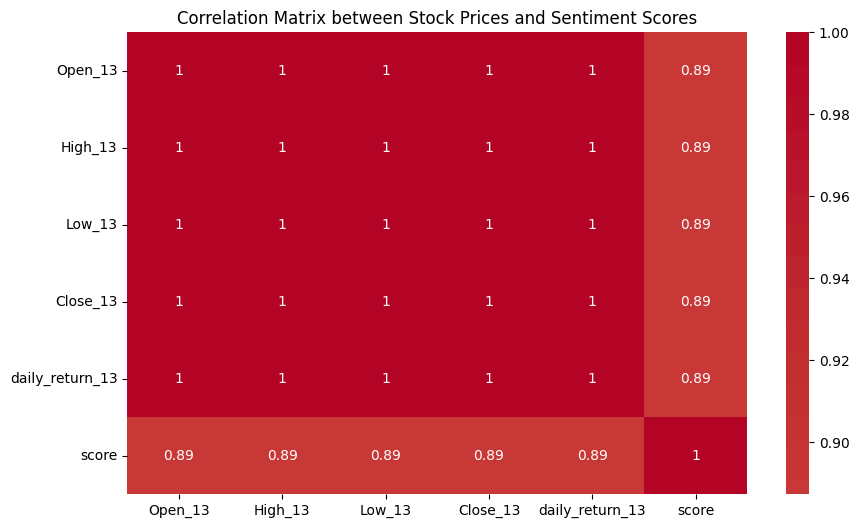

In [ ]:
df_baml = pd.DataFrame(sentiment_scores_baml)
df_baml.insert(0, 'Date', posts_date_baml)

df_baml['score'] = df_baml.apply(lambda row: row['score'] * -1 if row['label'] == 'NEGATIVE' else row['score'], axis=1)

df_baml['Date'] = pd.to_datetime(df_baml['Date'])  # Convert 'Date' column to datetime

# Display DataFrame
print(df_baml)

# Assuming stock_data_1 to stock_data_13 are your stock data DataFrames
# Combine all stock data into a single DataFrame
#stock_data_all = pd.concat([stock_data_1, stock_data_2, stock_data_3, stock_data_4,
                           #stock_data_5, stock_data_6, stock_data_8, stock_data_9,
                           #stock_data_10, stock_data_11, stock_data_12, stock_data_13])

# Merge the sentiment data with the combined stock data
combined_data_baml = pd.merge(df_baml, stock_data_1, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_2, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_3, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_4, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_5, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_6, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_8, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_9, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_10, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_11, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_12, on=['Date'], how='inner')
combined_data_baml = pd.merge(combined_data_baml, stock_data_13, on=['Date'], how='inner')


print(combined_data_baml)

# Calculate the correlation matrix
correlation_matrix_1 = combined_data_baml[['Open_1', 'High_1', 'Low_1', 'Close_1', 'daily_return_1', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_1)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_2 = combined_data_baml[['Open_2', 'High_2', 'Low_2', 'Close_2', 'daily_return_2', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_2)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_3 = combined_data_baml[['Open_3', 'High_3', 'Low_3', 'Close_3', 'daily_return_3', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_3)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_3, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_4 = combined_data_baml[['Open_4', 'High_4', 'Low_4', 'Close_4', 'daily_return_4', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_4)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_4, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_5 = combined_data_baml[['Open_5', 'High_5', 'Low_5', 'Close_5', 'daily_return_5', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_5)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_5, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_6 = combined_data_baml[['Open_6', 'High_6', 'Low_6', 'Close_6', 'daily_return_6', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_6)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_6, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_8 = combined_data_baml[['Open_8', 'High_8', 'Low_8', 'Close_8', 'daily_return_8', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_8)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_8, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_9 = combined_data_baml[['Open_9', 'High_9', 'Low_9', 'Close_9', 'daily_return_9', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_9)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_9, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_10 = combined_data_baml[['Open_10', 'High_10', 'Low_10', 'Close_10', 'daily_return_10', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_10)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_10, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_11 = combined_data_baml[['Open_11', 'High_11', 'Low_11', 'Close_11', 'daily_return_11', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_11)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_11, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

# Calculate the correlation matrix
correlation_matrix_12 = combined_data_baml[['Open_12', 'High_12', 'Low_12', 'Close_12', 'daily_return_12', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_12)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_12, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()

 #alculate the correlation matrix
correlation_matrix_13 = combined_data_baml[['Open_13', 'High_13', 'Low_13', 'Close_13', 'daily_return_13', 'score']].corr()

# Display the correlation matrix
print(correlation_matrix_13)

# If you want to visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_13, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Stock Prices and Sentiment Scores')
plt.show()